<a href="https://colab.research.google.com/github/dorianheld/Data-Science-Portfolio/blob/main/Capstone_Project_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

As populations increase in size, society becomes more complex. Alongside this, many countries have seen rapid industrialisation and growth in the past centuries. This makes for a rapidly changing and unpredictable market. India is one of the world's fastest growing economies$^{1}$, and has experienced a population boom of 216.5 percent in 63 years$^{2}$! As such, many markets in India have evolved and diversified, with one such market is the recent emergence of the pre-owned cars market. As a fledgling and growing market, it is important for companies willing to invest in it to understand the state of market, and then hopefully maximise their growth in it.

### **The objective:**

The pre-owned market in India is very unpredictable, due to it gaining traction recently, as well as the increased complexity of the market, especially in comparison to the new cars market. It is therefore key for companies to gather intelligence on the evolution of the market as soon as possible.

The main objective of this study is to analyse the pre-owned car market, provide insights on its current state, and formulate recommendations for predictive models companies may use to help show them where to invest in the market.

### **The key questions:**

1. What does the pre-owned car market look like at the moment?
  - How does this market compare to the new car market?
  - What are the main variables that affect pre-owned car prices
  - What are some variables and quirks of the market to keep in mind?
2. How do different models compare to each other?
  - Where are the various models stronger/weaker?
  - What information loss/gain do they have on each other?
  - What do the models have in common? What are important differences?
3. What are the final recommendations for models and key business insights?

### **The problem formulation**:

- The state of the current market (Exploratory Data Analysis)
  - Summary statistics
  - In depth univariate and bivariate analyses of market variables
- Data Preprocessing
  - Feature engineering
  - Missing Value Treatment
- Build models
  - Assign performance metrics
  - Check assumptions
- Compare models
- Conclusion, recommendations, and buiness insights

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Overview**

- Observations
- Sanity checks

In [3]:
# Load the data
data=pd.read_csv('/content/drive/MyDrive/ADSP MIT/Colab Notebooks/Capstone Project/used_cars.csv');
# Save data to a variable
df = data.copy()

In [4]:
#Check whether the data was loaded in properly
df.head(10)

S.No.                                 Name    Location  Year  \
0      0               Maruti Wagon R LXI CNG      Mumbai  2010   
1      1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                         Honda Jazz V     Chennai  2011   
3      3                    Maruti Ertiga VDI     Chennai  2012   
4      4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5      5      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6      6               Nissan Micra Diesel XV      Jaipur  2013   
7      7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8      8  Volkswagen Vento Diesel Comfortline        Pune  2013   
9      9       Tata Indica Vista Quadrajet LS     Chennai  2012   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   
5              75000       LPG       Manual      First    21.10   814.0   
6              86999    Diesel       Manual      First    23.08  1461.0   
7              36000    Diesel    Automatic      First    11.36  2755.0   
8              64430    Diesel       Manual      First    20.54  1598.0   
9              65932    Diesel       Manual     Second    22.30  1248.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74  
5   55.20    5.0        NaN   2.35  
6   63.10    5.0        NaN   3.50  
7  171.50    8.0      21.00  17.50  
8  103.60    5.0        NaN   5.20  
9   74.00    5.0        NaN   1.95

In [5]:
df.tail(10)

S.No.                                               Name    Location  \
7243   7243                     Renault Duster 85PS Diesel RxL     Chennai   
7244   7244                              Chevrolet Aveo 1.4 LS        Pune   
7245   7245                              Honda Amaze S i-Vtech       Kochi   
7246   7246                          Hyundai Grand i10 AT Asta  Coimbatore   
7247   7247                            Hyundai EON D Lite Plus  Coimbatore   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7243  2015              70000    Diesel       Manual      First    19.87   
7244  2009              45463    Petrol       Manual      First    14.49   
7245  2015              44776    Petrol       Manual      First    18.00   
7246  2016              18242    Petrol    Automatic      First    18.90   
7247  2015              21190    Petrol       Manual      First    21.10   
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7243  1461.0   83.8    5.0        NaN    NaN  
7244  1399.0   92.7    5.0        NaN    NaN  
7245  1198.0   86.7    5.0        NaN    NaN  
7246  1197.0   82.0    5.0        NaN    NaN  
7247   814.0   55.2    5.0        NaN    NaN  
7248  1598.0  103.6    5.0        NaN    NaN  
7249  1197.0  103.6    5.0        NaN    NaN  
7250  1461.0   63.1    5.0        NaN    NaN  
7251  1197.0  103.6    5.0        NaN    NaN  
7252  2148.0  170.0    5.0        NaN    NaN

**Observations**

- The data seems to have loaded in properly with each feature in the data dictionary present.
- It seems the Serial Number corresponds to the record index number - we will verify this later and proceed as needed
- From the data preview, it seems some of the car prices (both new and resold) are missing => To be explored in the EDA

In [6]:
# Check for duplicate records
df.duplicated().value_counts()

False    7253
Name: count, dtype: int64

**Observations**
- There are no duplicate records, so we can proceed

In [7]:
# Check data overview information
print(df.shape)
print('-'*50)
print(df.info())
print('-'*50)
df.isnull().sum()

(7253, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations:**
- 5 of the columns are object-type, the rest of numerical (3 integers, 6 float)
- We have 7253 total records
  - Mileage, Engine type, Power, No. seats, New_Price, and resale price are all missing some entries, these will have to be treated later

In [8]:
# Check with certainty whether the serial number column correponds to the index and drop the column if that's the case
if np.all(df.index==df['S.No.'].values):
  print('Dropped serial number column')
  df.drop('S.No.',axis=1,inplace=True)
else:
  print('Serial number column does not correpond with index number')

Dropped serial number column


**Observations**
- The Serial Number column didn't add any value to our data, so we removed it. In the exploratory data analysis, we will look at each column individually and get a general idea of what the data looks like overall

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

### Overall Summary statistics

In [9]:
# Look at summary statistics before looking at individual columns
df.describe(include='all').T

count unique                     top  freq          mean  \
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage            7251.0    NaN                     NaN   NaN      18.14158   
Engine             7207.0    NaN                     NaN   NaN    1616.57347   
Power              7078.0    NaN                     NaN   NaN    112.765214   
Seats              7200.0    NaN                     NaN   NaN      5.280417   
New_price          1006.0    NaN                     NaN   NaN     22.779692   
Price              6019.0    NaN                     NaN   NaN      9.479468   

                            std     min      25%      50%      75%        max  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254421  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84427.720583   171.0  34000.0  53416.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                4.562197     0.0    15.17    18.16     21.1      33.54  
Engine               595.285137    72.0   1198.0   1493.0   1968.0     5998.0  
Power                 53.493553    34.2     75.0     94.0    138.1      616.0  
Seats                  0.809277     2.0      5.0      5.0      5.0       10.0  
New_price             27.759344    3.91    7.885    11.57  26.0425      375.0  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

**Observations**

We included categorical and numerical variables. We can already make some interesting observations:
####Categorical Variables
- **Name:** There are 2041 unique car models across all brands in our data. It may be useful to add an extra column for car brands to see if there's any trend in price across brands
- **Location:** There are 11 unique cities/locations where cars are sold. We will need to check for possible typos. Mumbai has the most records, which on the surface makes sense as it is the second most populated city in India **reference**
- **Fuel Type:** We see 5 fuel types, as described in the data dictionary. We will make sure these correspond to what we expect. Diesel cars are the most frequent
- **Transmission:** Transmission data similarly seems to have been correctly collected as we only see two kinds of entries (presumably manual and automatic). We will check price trends between these two types
- **Owner Type:** We see 4 unique kinds of ownership. Later, we may be able to see how cars with different numbers of previous owners tend to be sold, and hopefully extract helpful insight into the used car market

####Numerical Variables
- **Year:** Cars manufacture year range from 1996 to 2019, with an average of 2013. The quartiles also show that cars sold seem to be skewed towards those more recently manufactured.
- **km driven:** We see a wide range of kilometrage for the cars, from 171km to 73000km. We observe a crude outlier in 6.5 million km. This record will have to be looked at in more detail, and the column's statistics looked at again afterwards
- **Mileage:** It is impossible for cars to have a mileage of 0kmpl. These values will have to be looked at in detail. We see an average of of 18kmpl, however, this may be skewed because of the existence of 0.0kmpl mileage entries. It will be interesting to see trends between mileage and car brands or price.
- **Engine:** Engine cubic centimetres have a wide range of 72cc-5998cc. These seem to be outliers, as the quartiles are all within the 1000cc-2000cc range.
- **Power:** Similarly to engine displacement volume, we see a large upper outlier at 616bhp. It will be interesting to see whether this corresponds to the same car as the 5998cc car.
- **Seats:** It seems most cars have 5 seats. Note that this variable is discrete numerical
- **Prices:** From the summary statistics, we can see that the reselling price is on average much lower than the brand new car prices (as expected).

### Individual categorical statistics overview

####Name

In [10]:
#First of all, check the name column
print(df['Name'])
print('-'*50)
print(df['Name'].value_counts().value_counts())

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object
--------------------------------------------------
count
1     862
2     408
3     214
4     127
5      93
6      58
7      53
8      42
10     28
12     18
13     18
9      17
15     17
11     13
14     12
20      8
18      7
19      6
17      6
22      5
23      5
32      4
16      3
25      3
21      2
35      2
42   

**Observations**
- We observe the same information as we did in the general summary statistics above. We can also see that a vast majority of car models only appear once in our dataset, with about half as many appearing twice. We will delve deeper into the frequency of certain models in our univariate analysis

####Brand
- It may be useful for our analysis to create a new column based on the 'Name' column denoting only the brands of each model.

##### Creating column in data

In [11]:
# Create a brands list by extracting brand names from the 'Name' column and
brands=[]
for i in df['Name'].str.split():
  brands.append(i[0])

# Add the brands column to the dataframe
df.insert(loc=1,column='Brand',value=brands)

In [12]:
# Run sanity checks on the list
brands=pd.Series(brands) # Convert to pandas series to look at the data more easily
brands.unique() # Look at the unique brand names in our series

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [13]:
# Check the brand column has been successfully introduced
df.head()

Name    Brand    Location  Year  \
0            Maruti Wagon R LXI CNG   Maruti      Mumbai  2010   
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai        Pune  2015   
2                      Honda Jazz V    Honda     Chennai  2011   
3                 Maruti Ertiga VDI   Maruti     Chennai  2012   
4   Audi A4 New 2.0 TDI Multitronic     Audi  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

**Observations**

The brand column has successfully been introduced

There are a few important observations here:
- 'Land' likely comes from 'Land Rover'. We will have to correct this in the data
- There seem to be two Isuzu kinds due to the capitalisation of one. We will change this so there is only one Isuzu brand in our data
- 'OpelCorsa' will be renamed as 'Opel' since Corsa is the car model and Opel is the brand

Before making the changes, let's have a specific look at the data so we know what we're doing

In [14]:
# Land Rover
df.loc[df.Brand=='Land']

Name Brand    Location  Year  \
13           Land Rover Range Rover 2.2L Pure  Land       Delhi  2014   
14             Land Rover Freelander 2 TD4 SE  Land        Pune  2012   
191       Land Rover Range Rover 2.2L Dynamic  Land  Coimbatore  2018   
311        Land Rover Range Rover HSE Dynamic  Land       Delhi  2017   
399       Land Rover Range Rover 2.2L Dynamic  Land   Hyderabad  2012   
...                                       ...   ...         ...   ...   
6434           Land Rover Discovery 4 SDV6 SE  Land       Kochi  2012   
6717         Land Rover Discovery Sport TD4 S  Land       Kochi  2018   
6857           Land Rover Freelander 2 TD4 SE  Land      Mumbai  2011   
7157         Land Rover Range Rover 2.2L Pure  Land   Hyderabad  2015   
7198  Land Rover Discovery 4 TDV6 Auto Diesel  Land   Hyderabad  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
13                72000    Diesel    Automatic      First    12.70  2179.0   
14                85000    Diesel    Automatic     Second     0.00  2179.0   
191               36091    Diesel    Automatic      First    12.70  2179.0   
311               44000    Diesel    Automatic      First    12.70  2179.0   
399               56000    Diesel    Automatic      First    12.70  2179.0   
...                 ...       ...          ...        ...      ...     ...   
6434              89190    Diesel    Automatic     Second    11.40  2993.0   
6717              23342    Diesel    Automatic      First    12.83  2179.0   
6857              87000    Diesel    Automatic      First     0.00  2179.0   
7157              49000    Diesel    Automatic     Second    12.70  2179.0   
7198             147202    Diesel    Automatic      First    11.80  2993.0   

       Power  Seats  New_price  Price  
13    187.70    5.0        NaN  27.00  
14    115.00    5.0        NaN  17.50  
191   187.70    5.0        NaN  55.76  
311   187.70    5.0        NaN  44.00  
399   187.70    5.0        NaN  30.00  
...      ...    ...        ...    ...  
6434  245.41    7.0        NaN    NaN  
6717  147.50    5.0        NaN    NaN  
6857  115.00    5.0        NaN    NaN  
7157  187.70    5.0        NaN    NaN  
7198  241.60    7.0        NaN    NaN  

[67 rows x 14 columns]

**Observations**
- 'Land' does indeed correspond to 'Land Rover'

In [15]:
# Isuzu
df.loc[df.Brand=='Isuzu']

Name  Brand Location  Year  Kilometers_Driven  \
2900          Isuzu MUX 4WD  Isuzu   Jaipur  2017              34429   
6470  Isuzu MU 7 4x2 HIPACK  Isuzu  Kolkata  2016              45000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
2900    Diesel    Automatic      First    13.80  2999.0  174.57    7.0   
6470    Diesel       Manual      First    12.08  2999.0  161.00    7.0   

      New_price  Price  
2900      33.68   20.0  
6470        NaN    NaN

In [16]:
# ISUZU
df.loc[df.Brand=='ISUZU']

Name  Brand    Location  Year  Kilometers_Driven  \
3624  ISUZU D-MAX V-Cross 4X4  ISUZU  Coimbatore  2018              20422   
5979  ISUZU D-MAX V-Cross 4X4  ISUZU      Jaipur  2017              25000   
6919  ISUZU D-MAX V-Cross 4X4  ISUZU      Jaipur  2017             290000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
3624    Diesel       Manual      First     12.4  2499.0  134.0    5.0   
5979    Diesel       Manual      First     12.4  2499.0  134.0    5.0   
6919    Diesel       Manual      First     12.4  2499.0  134.0    5.0   

      New_price  Price  
3624        NaN  16.09  
5979        NaN   8.00  
6919        NaN    NaN

**Observations**
- 'ISUZU' seems to be Isuzu rewritten as anticipated

In [17]:
# OpelCorsa
df.loc[df.Brand=='OpelCorsa']

Name      Brand   Location  Year  Kilometers_Driven  \
7067  OpelCorsa 1.4Gsi  OpelCorsa  Hyderabad  2005              50000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
7067    Petrol       Manual     Second     14.2  1389.0   88.0    5.0   

      New_price  Price  
7067        NaN    NaN

**Observations**
- As we said earlier, the brand should be Opel, instead of OpelCorsa

We can now apply the necessary changes to our data

In [18]:
# Changing all instances of 'Land' to 'Land Rover'
df.Brand.replace('Land','Land Rover',inplace=True)
# Changing ISUZU to Isuzu
df.Brand.replace('ISUZU','Isuzu',inplace=True)
# Changing OpelCorsa to Opel
df.Brand.replace('OpelCorsa','Opel',inplace=True)
# Creating variable for column
brands=df.Brand

##### EDA of the brands column

In [19]:
# Let's look at the new column in more detail now
print(df.Brand.unique(),'\n','-'*50,'\n',df.Brand.describe(),'\n','-'*50,'\n',df.Brand.value_counts(),sep='')

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'Opel']
--------------------------------------------------
count       7253
unique        32
top       Maruti
freq        1444
Name: Brand, dtype: object
--------------------------------------------------
Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Je

**Observations**
- We see 32 unique car brands, with Maruti Suzuki as the most frequent, followed closely by Hyundai. All discrepencies in the brand column have been addressed

#### Location

In [20]:
print(df.Location.unique(),'\n','-'*50,'\n',df.Location.value_counts(),sep='')

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64


**Observations**
- There are 11 unique locations
- Nothing seems out of the ordinary for the location data. It is interesting to see fewer cars sold in Delhi than Mumbai, perhaps because of more competition from other companies or a smaller market for used cars in the capital area
- Ahmedabad sees significantly fewers sales than the other locations

#### Fuel Type


In [21]:
print(df.Fuel_Type.unique(),'\n','-'*50,'\n',df.Fuel_Type.value_counts(),sep='')

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64


**Observations**
- We find the 5 fuel types we expect, so no need to edit the data.
- Diesel and Petrol are by far the most frequent fuel types

####Transmission

In [22]:
print(df['Transmission'].value_counts())

Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64


**Observations**
- We observe the vaues we expect
- There are considerably more manual (i.e. stick shift) cars than automatic

####Owner Type

In [23]:
print(df['Owner_Type'].value_counts())

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64


**Observations**
- No issues with the data for number of previous owners
- The vast majority of cars have had one previous owners, with those cars appearing 5 times more than all other kinds of ownership tallies combined

### Numerical features statistics overview
- We will look at features of interest, which are all except year

#### km driven
We observed some ridiculously high values in the summary statistics, so let's having a closer look

In [24]:
# First look at the overall kilometres driven in descending order
df.sort_values(by='Kilometers_Driven',ascending=False)

Name       Brand Location  \
2328                        BMW X5 xDrive 30d M Sport         BMW  Chennai   
340            Skoda Octavia Ambition Plus 2.0 TDI AT       Skoda  Kolkata   
1860                 Volkswagen Vento Diesel Highline  Volkswagen  Chennai   
358                             Hyundai i10 Magna 1.2     Hyundai  Chennai   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Volkswagen  Chennai   
...                                               ...         ...      ...   
5339           Hyundai i20 Active SX Dual Tone Petrol     Hyundai     Pune   
1598                             Tata Xenon XT EX 4X2        Tata   Jaipur   
1242                   Jaguar XE 2.0L Diesel Prestige      Jaguar    Delhi   
5606                       Maruti Wagon R ZXI AMT 1.2      Maruti   Mumbai   
1361                    Maruti Alto 800 2016-2019 VXI      Maruti   Mumbai   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
2328  2017            6500000    Diesel    Automatic      First    15.97   
340   2013             775000    Diesel    Automatic      First    19.30   
1860  2013             720000    Diesel       Manual      First    20.54   
358   2009             620000    Petrol       Manual      First    20.36   
2823  2015             480000    Diesel    Automatic      First    16.96   
...    ...                ...       ...          ...        ...      ...   
5339  2019               1000    Petrol       Manual      First    17.19   
1598  2017               1000    Diesel       Manual      First    13.49   
1242  2018               1000    Diesel    Automatic      First    13.60   
5606  2019                600    Petrol    Automatic      First    21.50   
1361  2019                171    Petrol       Manual      First    24.70   

      Engine   Power  Seats  New_price  Price  
2328  2993.0  258.00    5.0        NaN  65.00  
340   1968.0  141.00    5.0        NaN   7.50  
1860  1598.0  103.60    5.0        NaN   5.90  
358   1197.0   78.90    5.0        NaN   2.70  
2823  1968.0  138.03    5.0        NaN  13.00  
...      ...     ...    ...        ...    ...  
5339  1197.0   81.86    5.0      10.25   8.60  
1598  2179.0  138.03    5.0        NaN   7.50  
1242  1999.0  177.00    5.0      52.77  40.00  
5606  1197.0   81.80    5.0       6.80   6.25  
1361   796.0   47.30    5.0        NaN   3.60  

[7253 rows x 14 columns]

In [25]:
# Let's also have a look at kilometres driven for cars manufactures in recent years to see if there are any clear unrealistic values
df.loc[(df['Year']>2016)&(df['Kilometers_Driven']>50000)].sort_values(by='Kilometers_Driven',ascending=False).head(20)

Name          Brand    Location  \
2328                     BMW X5 xDrive 30d M Sport            BMW     Chennai   
6919                       ISUZU D-MAX V-Cross 4X4          Isuzu      Jaipur   
1409                   Maruti Swift Dzire Tour LDI         Maruti     Kolkata   
6952                     Honda Amaze VX CVT i-VTEC          Honda      Jaipur   
7087  Hyundai Xcent 1.1 CRDi S Celebration Edition        Hyundai      Jaipur   
489                  Mercedes-Benz GLS 350d 4MATIC  Mercedes-Benz        Pune   
2674                            Tata Indica V2 eLS           Tata     Chennai   
5546                         Honda Amaze VX i-DTEC          Honda   Hyderabad   
277                Tata Zest Quadrajet 1.3 75PS XE           Tata        Pune   
1744                        Maruti Ertiga SHVS VDI         Maruti        Pune   
6320                        Mahindra XUV500 W8 4WD       Mahindra   Hyderabad   
7011             Toyota Innova Crysta 2.4 VX MT 8S         Toyota  Coimbatore   
4180            Hyundai Creta 1.6 SX Option Diesel        Hyundai  Coimbatore   
5389                            Tata Indica V2 eLS           Tata     Chennai   
2667                    Tata Zest Revotron 1.2T XE           Tata      Mumbai   
2860                        Tata Bolt Quadrajet XM           Tata   Hyderabad   
327              Audi Q7 45 TDI Quattro Technology           Audi  Coimbatore   
1071             Ford Figo 2015-2019 1.5D Trend MT           Ford   Hyderabad   
952                 Toyota Innova Crysta 2.4 ZX MT         Toyota  Coimbatore   
3059                 BMW 3 Series 320d Luxury Line            BMW       Delhi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
2328  2017            6500000    Diesel    Automatic      First    15.97   
6919  2017             290000    Diesel       Manual      First    12.40   
1409  2017             148000    Diesel       Manual      First    23.40   
6952  2017             145000    Petrol    Automatic      First    18.10   
7087  2017             133000    Diesel       Manual      First    24.40   
489   2017             129000    Diesel    Automatic      First    11.00   
2674  2017             129000    Diesel       Manual      First    25.00   
5546  2017             128000    Diesel       Manual      First    25.80   
277   2017             121900    Diesel       Manual      First    22.95   
1744  2017             121000    Diesel       Manual      First    24.52   
6320  2017             119256    Diesel       Manual      First    16.00   
7011  2017             103189    Diesel       Manual      First    13.68   
4180  2017             101065    Diesel       Manual      First    20.50   
5389  2017             100400    Diesel       Manual      First    25.00   
2667  2017             100000    Petrol       Manual      First    17.57   
2860  2017              98500    Diesel       Manual      First    22.95   
327   2017              97430    Diesel    Automatic      First    14.75   
1071  2017              95802    Diesel       Manual     Second    25.83   
952   2018              92056    Diesel       Manual      First    13.68   
3059  2019              87000    Diesel    Automatic      First    22.69   

      Engine  Power  Seats  New_price  Price  
2328  2993.0  258.0    5.0        NaN  65.00  
6919  2499.0  134.0    5.0        NaN    NaN  
1409  1248.0   74.0    5.0        NaN   4.75  
6952  1199.0   88.7    5.0        NaN    NaN  
7087  1120.0   71.0    5.0        NaN    NaN  
489   2987.0  258.0    7.0     100.00  56.00  
2674  1396.0   69.0    5.0        NaN   3.00  
5546  1498.0   98.6    5.0        NaN   6.30  
277   1248.0   74.0    5.0       8.34   3.75  
1744  1248.0   88.5    7.0        NaN   8.00  
6320  2179.0  140.0    7.0        NaN    NaN  
7011  2393.0  147.8    8.0      24.01    NaN  
4180  1582.0  126.2    5.0      19.18  11.45  
5389  1396.0   69.0    5.0        NaN   2.85  
2667  1193.0   88.7    5.0       6.83   4.

**Observations**
- We see one clear impossible value of 6.5 million km in the span of 3 years. Some of the other entries are also suspicious such as 87000km in one year, but we cannot discredit these as they are not impossible

In [26]:
# Remove 6.5 million km record, which we know from above has index number 2328
df.drop(axis=0,labels=2328,inplace=True)
# Reset the indices of the dataframe
df.reset_index(drop=True,inplace=True)
# Check we successfully removed the column
print(df.shape)
df.loc[df['Kilometers_Driven']==6500000]

(7252, 14)


Empty DataFrame
Columns: [Name, Brand, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price]
Index: []

####Mileage

In [27]:
# Check the high end values of mileage
df.sort_values(by='Mileage').tail(10)

Name     Brand Location  Year  \
1269  Maruti Alto 800 2016-2019 CNG LXI    Maruti   Mumbai  2018   
3868  Maruti Alto 800 2016-2019 CNG LXI    Maruti    Delhi  2012   
4768  Maruti Alto 800 2016-2019 CNG LXI    Maruti    Kochi  2017   
1332             Maruti Wagon R CNG LXI    Maruti     Pune  2013   
4140             Maruti Wagon R CNG LXI    Maruti   Mumbai  2014   
3128             Maruti Wagon R CNG LXI    Maruti    Delhi  2014   
2059             Maruti Wagon R CNG LXI    Maruti   Mumbai  2013   
2370             Maruti Wagon R CNG LXI    Maruti     Pune  2014   
4445               Mahindra E Verito D4  Mahindra  Chennai  2016   
4903          Toyota Prius 2009-2016 Z4    Toyota   Mumbai  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
1269              10600       CNG       Manual      First    33.44   796.0   
3868              65537       CNG       Manual     Second    33.44   796.0   
4768              24310       CNG       Manual      First    33.44   796.0   
1332              79494       CNG       Manual      First    33.54   998.0   
4140              47200       CNG       Manual      First    33.54   998.0   
3128              74663       CNG       Manual      First    33.54   998.0   
2059              54000       CNG       Manual      First    33.54   998.0   
2370              29202       CNG       Manual      First    33.54   998.0   
4445              50000  Electric    Automatic      First      NaN    72.0   
4903              44000  Electric    Automatic      First      NaN  1798.0   

      Power  Seats  New_price  Price  
1269  40.30    4.0        NaN   3.50  
3868  40.30    4.0        NaN   2.10  
4768  40.30    4.0        NaN   3.70  
1332  67.04    5.0       5.54   2.96  
4140  67.04    5.0       5.58   2.85  
3128  67.04    5.0       5.35   3.25  
2059  67.04    5.0       5.58   3.05  
2370  67.04    5.0       5.54   3.90  
4445  41.00    5.0      13.58  13.00  
4903  73.00    5.0        NaN  12.75

In [28]:
# Look at records with mileage kmpl of 0.0
df.loc[df['Mileage']==0]

Name          Brand    Location  \
14              Land Rover Freelander 2 TD4 SE     Land Rover        Pune   
67    Mercedes-Benz C-Class Progressive C 220d  Mercedes-Benz  Coimbatore   
79                      Hyundai Santro Xing XL        Hyundai   Hyderabad   
194                         Honda City 1.5 GXI          Honda   Ahmedabad   
229                           Ford Figo Diesel           Ford   Bangalore   
...                                        ...            ...         ...   
6632                       Mahindra TUV 300 P4       Mahindra     Kolkata   
6696                    Hyundai Santro Xing XL        Hyundai      Jaipur   
6856            Land Rover Freelander 2 TD4 SE     Land Rover      Mumbai   
6956                    Honda Jazz 2020 Petrol          Honda       Kochi   
7225                    Hyundai Santro Xing GL        Hyundai   Ahmedabad   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
14    2012              85000    Diesel    Automatic     Second      0.0   
67    2019              15369    Diesel    Automatic      First      0.0   
79    2005              87591    Petrol       Manual      First      0.0   
194   2007              60006    Petrol       Manual      First      0.0   
229   2015              70436    Diesel       Manual      First      0.0   
...    ...                ...       ...          ...        ...      ...   
6632  2016              27000    Diesel       Manual      First      0.0   
6696  2007              85000    Petrol       Manual     Second      0.0   
6856  2011              87000    Diesel    Automatic      First      0.0   
6956  2019              11574    Petrol       Manual      First      0.0   
7225  2014              41000    Petrol       Manual      First      0.0   

      Engine  Power  Seats  New_price  Price  
14    2179.0  115.0    5.0        NaN  17.50  
67    1950.0  194.0    5.0      49.14  35.67  
79    1086.0    NaN    5.0        NaN   1.30  
194      NaN    NaN    NaN        NaN   2.95  
229   1498.0   99.0    NaN        NaN   3.60  
...      ...    ...    ...        ...    ...  
6632     NaN    NaN    NaN        NaN    NaN  
6696  1086.0    NaN    5.0        NaN    NaN  
6856  2179.0  115.0    5.0        NaN    NaN  
6956  1199.0   88.7    NaN        NaN    NaN  
7225  1086.0   62.0    5.0        NaN    NaN  

[81 rows x 14 columns]

In [29]:
# Check the mileage of electric cars
df.loc[df.Fuel_Type=='Electric']

Name     Brand Location  Year  Kilometers_Driven  \
4445       Mahindra E Verito D4  Mahindra  Chennai  2016              50000   
4903  Toyota Prius 2009-2016 Z4    Toyota   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
4445  Electric    Automatic      First      NaN    72.0   41.0    5.0   
4903  Electric    Automatic      First      NaN  1798.0   73.0    5.0   

      New_price  Price  
4445      13.58  13.00  
4903        NaN  12.75

**Observations**
- The high end vaues of Mileage aren't anomalous
- 81 records have mileage of 0kmpl. 0kmpl doesn't make sense, so these will be treated as missing values.
- Note that there are already two NaN values in Mileage. These correspond to the two electric cars since kmpl cannot be used for eletric cars

In [30]:
# Replace all instances of 0.0kmpl with missing values
df.Mileage.replace(0.0,np.nan,inplace=True)
# Check the new number of missing values in the Mileage column, expecting 81+2=83
df.Mileage.isna().sum()

83

#### Engine

In [31]:
# Check low values of Engine
df.sort_values(by='Engine').head()

Name     Brand    Location  Year  Kilometers_Driven  \
4445  Mahindra E Verito D4  Mahindra     Chennai  2016              50000   
124          Tata Nano XTA      Tata  Coimbatore  2017              32684   
2604          Tata Nano Cx      Tata      Jaipur  2010              57000   
4499         Tata Nano XTA      Tata   Bangalore  2016              29000   
4560     Tata Nano Cx BSIV      Tata  Coimbatore  2014              42083   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
4445  Electric    Automatic      First      NaN    72.0  41.00    5.0   
124     Petrol    Automatic      First     21.9   624.0  37.48    4.0   
2604    Petrol       Manual      First     26.0   624.0  35.00    4.0   
4499    Petrol    Automatic      First     21.9   624.0  37.48    4.0   
4560    Petrol       Manual      First     25.4   624.0  37.48    4.0   

      New_price  Price  
4445      13.58  13.00  
124         NaN   3.23  
2604        NaN   0.50  
4499        NaN   2.80  
4560        NaN   1.68

In [32]:
# Notice the lowest value if for an electric car => Check engine values of the electric cars
df.loc[df.Fuel_Type=='Electric']

Name     Brand Location  Year  Kilometers_Driven  \
4445       Mahindra E Verito D4  Mahindra  Chennai  2016              50000   
4903  Toyota Prius 2009-2016 Z4    Toyota   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
4445  Electric    Automatic      First      NaN    72.0   41.0    5.0   
4903  Electric    Automatic      First      NaN  1798.0   73.0    5.0   

      New_price  Price  
4445      13.58  13.00  
4903        NaN  12.75

In [33]:
# Check upper values of Engine CC
df.sort_values(by='Engine',ascending=False).head()

Name          Brand   Location  Year  \
5520        Bentley Continental Flying Spur        Bentley  Hyderabad  2006   
6353                Bentley Flying Spur W12        Bentley  Bangalore  2008   
4721          Mercedes-Benz SL-Class SL 500  Mercedes-Benz    Kolkata  2010   
4690         Mercedes-Benz SLK-Class 55 AMG  Mercedes-Benz  Bangalore  2014   
152   Mercedes-Benz S Class 2005 2013 S 500  Mercedes-Benz    Kolkata  2010   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
5520              48000    Petrol    Automatic      First     8.60  5998.0   
6353              31200    Petrol    Automatic     Second    10.20  5998.0   
4721              35000    Petrol    Automatic      First     8.10  5461.0   
4690               3000    Petrol    Automatic     Second    12.00  5461.0   
152               35277    Petrol    Automatic      First     7.81  5461.0   

      Power  Seats  New_price  Price  
5520  552.0    4.0        NaN   59.0  
6353  616.0    5.0      375.0    NaN  
4721  387.3    2.0        NaN   29.5  
4690  421.0    2.0        NaN   90.0  
152   362.9    5.0        NaN   30.0

**Observations**
- We notice  one low extreme value for engine displacement. It turns out this corresponds to an electric car. The other low values seem reasonable. Upon further inspection of the electric cars, we see both have entries for their engine displacement, which shouldn't be the case, as electric cars do not have an engine but a motor instead. We will keep these values in for the time being as hybrid cars do exist, but it is certainly a quirk of the data, especially that if these cars were hybrid, it most likely should have been specified
- The upper values for engine displacement all seem fine

####Power

In [34]:
# Check upper values of car horsepower
df.sort_values(by='Power',ascending=False).head()

Name        Brand    Location  Year  \
6353          Bentley Flying Spur W12      Bentley   Bangalore  2008   
5780       Lamborghini Gallardo Coupe  Lamborghini       Delhi  2011   
5520  Bentley Continental Flying Spur      Bentley   Hyderabad  2006   
2100          Porsche Cayenne Turbo S      Porsche      Mumbai  2010   
5087  Jaguar XJ 5.0 L V8 Supercharged       Jaguar  Coimbatore  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
6353              31200    Petrol    Automatic     Second     10.2  5998.0   
5780               6500    Petrol    Automatic      Third      6.4  5204.0   
5520              48000    Petrol    Automatic      First      8.6  5998.0   
2100              35000    Petrol    Automatic     Second     11.9  4806.0   
5087              43686    Petrol    Automatic      First     10.5  5000.0   

      Power  Seats  New_price   Price  
6353  616.0    5.0      375.0     NaN  
5780  560.0    2.0        NaN  120.00  
5520  552.0    4.0        NaN   59.00  
2100  550.0    5.0        NaN   32.00  
5087  503.0    4.0        NaN   50.66

In [35]:
# Check lower values
df.sort_values(by='Power').head()

Name   Brand    Location  Year  \
6407   Maruti Omni MPI CARGO BSIV  Maruti        Pune  2013   
6225      Maruti Omni E 8 Str STD  Maruti   Bangalore  2005   
1008  Maruti Omni E MPI STD BS IV  Maruti       Kochi  2019   
2196     Maruti Omni MPI STD BSIV  Maruti  Coimbatore  2017   
1912  Maruti Omni E MPI STD BS IV  Maruti      Mumbai  2013   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
6407             153000    Petrol       Manual           First     16.8   
6225              81245    Petrol       Manual  Fourth & Above     16.8   
1008              11571    Petrol       Manual           First     16.8   
2196              15473    Petrol       Manual           First     16.8   
1912              11734    Petrol       Manual           First     16.8   

      Engine  Power  Seats  New_price  Price  
6407   796.0   34.2    5.0        NaN    NaN  
6225   796.0   34.2    8.0        NaN    NaN  
1008   796.0   34.2    8.0        NaN   3.80  
2196   796.0   34.2    5.0        NaN   3.58  
1912   796.0   34.2    8.0        NaN   2.25

**Observations**
- Nothing strange here. The upper value of 616.0bhp isn't a significant outlier as feared, and does indeed correspond to a 5998cc car

####Seats (note this is a discrete categorical variable)

In [36]:
# Check how many of each count of seats we have
df.Seats.value_counts().sort_index()

Seats
2.0       18
4.0      119
5.0     6047
6.0       38
7.0      796
8.0      170
9.0        3
10.0       8
Name: count, dtype: int64

In [37]:
# Check cars that have a high number of seats
df.loc[df.Seats>=9]

Name      Brand   Location  Year  \
814                     Toyota Qualis FS B2     Toyota       Pune  2004   
917                            Tata Sumo DX       Tata     Mumbai  2013   
1347              Mahindra Scorpio LX BS IV   Mahindra  Bangalore  2007   
1907                    Toyota Qualis FS B3     Toyota  Bangalore  2002   
2267                    Toyota Qualis RS E2     Toyota       Pune  2004   
2312        Chevrolet Tavera LT 9 Str BS IV  Chevrolet    Kolkata  2012   
2358                  Mahindra Xylo D2 Maxx   Mahindra    Chennai  2016   
2574  Chevrolet Tavera LS B3 10 Seats BSIII  Chevrolet  Hyderabad  2015   
6241             Tata Sumo EX 10/7 Str BSII       Tata    Chennai  2015   
6287  Chevrolet Tavera LS B3 10 Seats BSIII  Chevrolet  Hyderabad  2005   
6874                    Toyota Qualis FS B3     Toyota       Pune  2002   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
814               77757    Diesel       Manual     Second    13.10  2446.0   
917               20000    Diesel       Manual      First    14.07  1978.0   
1347              74112    Diesel       Manual      First    12.05  2179.0   
1907              63000    Diesel       Manual      Third    13.10  2446.0   
2267             215750    Diesel       Manual     Second      NaN  2446.0   
2312              67132    Diesel       Manual      First    13.58  2499.0   
2358             150000    Diesel       Manual      First    14.95  2489.0   
2574             120000    Diesel       Manual      First    14.80  2499.0   
6241             196000    Diesel       Manual     Second    12.20  1948.0   
6287             150000    Diesel       Manual     Second    14.80  2499.0   
6874             119613    Diesel       Manual     Second    13.10  2446.0   

      Power  Seats  New_price  Price  
814    75.0   10.0        NaN   3.50  
917    83.1   10.0        NaN   5.25  
1347  120.0    9.0        NaN   4.10  
1907   75.0   10.0        NaN   3.65  
2267    NaN   10.0        NaN   3.50  
2312   78.0    9.0        NaN   4.75  
2358   93.7    9.0        NaN   4.50  
2574   80.0   10.0        NaN   5.50  
6241   68.0   10.0        NaN    NaN  
6287   80.0   10.0        NaN    NaN  
6874   75.0   10.0        NaN    NaN

**Observations**
- There doesn't seem to be any issues with the cars with many seats. The data is heavily skewed towards 5 seat cars, which makes sense

### Summary

In [38]:
df.describe(include='all').T

count unique                     top  freq          mean  \
Name                 7252   2041  Mahindra XUV500 W8 2WD    55           NaN   
Brand                7252     32                  Maruti  1444           NaN   
Location             7252     11                  Mumbai   949           NaN   
Year               7252.0    NaN                     NaN   NaN   2013.364865   
Kilometers_Driven  7252.0    NaN                     NaN   NaN  57810.852868   
Fuel_Type            7252      5                  Diesel  3851           NaN   
Transmission         7252      2                  Manual  5204           NaN   
Owner_Type           7252      4                   First  5951           NaN   
Mileage            7169.0    NaN                     NaN   NaN     18.346859   
Engine             7206.0    NaN                     NaN   NaN   1616.382459   
Power              7077.0    NaN                     NaN   NaN    112.744692   
Seats              7199.0    NaN                     NaN   NaN      5.280456   
New_price          1006.0    NaN                     NaN   NaN     22.779692   
Price              6018.0    NaN                     NaN   NaN      9.470243   

                            std     min      25%      50%      75%       max  
Name                        NaN     NaN      NaN      NaN      NaN       NaN  
Brand                       NaN     NaN      NaN      NaN      NaN       NaN  
Location                    NaN     NaN      NaN      NaN      NaN       NaN  
Year                   3.254365  1996.0   2011.0   2014.0   2016.0    2019.0  
Kilometers_Driven  37499.537277   171.0  34000.0  53404.0  73000.0  775000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN       NaN  
Transmission                NaN     NaN      NaN      NaN      NaN       NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN       NaN  
Mileage                4.158106     6.4     15.3     18.2     21.1     33.54  
Engine                595.10553    72.0   1198.0   1493.0   1968.0    5998.0  
Power                 53.469461    34.2     75.0     94.0    138.1     616.0  
Seats                  0.809327     2.0      5.0      5.0      5.0      10.0  
New_price             27.759344    3.91    7.885    11.57  26.0425     375.0  
Price                 11.165926    0.44      3.5     5.64     9.95     160.0

In [39]:
for i in df.columns:
  print(i,'|',df[i].isna().sum())

Name | 0
Brand | 0
Location | 0
Year | 0
Kilometers_Driven | 0
Fuel_Type | 0
Transmission | 0
Owner_Type | 0
Mileage | 83
Engine | 46
Power | 175
Seats | 53
New_price | 6246
Price | 1234


**Observations**
- Mileage now has 83 missing values
- The mean of km driven is slightly lower, and the standard deviation has been significantly reduced
- We still have an overwhelming amount of missing values in the New Price column. This begs the question of whether we can reliably use it

### **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

#### Categorical variables
Categorical variables are: Name, Brand, Location, Fuel Type, Tramsission, and Owner Type. We will include Seats here because is it discrete

In [40]:
# Create list that includes all categorical variables and the Seats variable, excluding Name, which we will look at separately
cat=df.select_dtypes(include='object').columns.to_list()
cat.append('Seats')
cat.remove('Name')

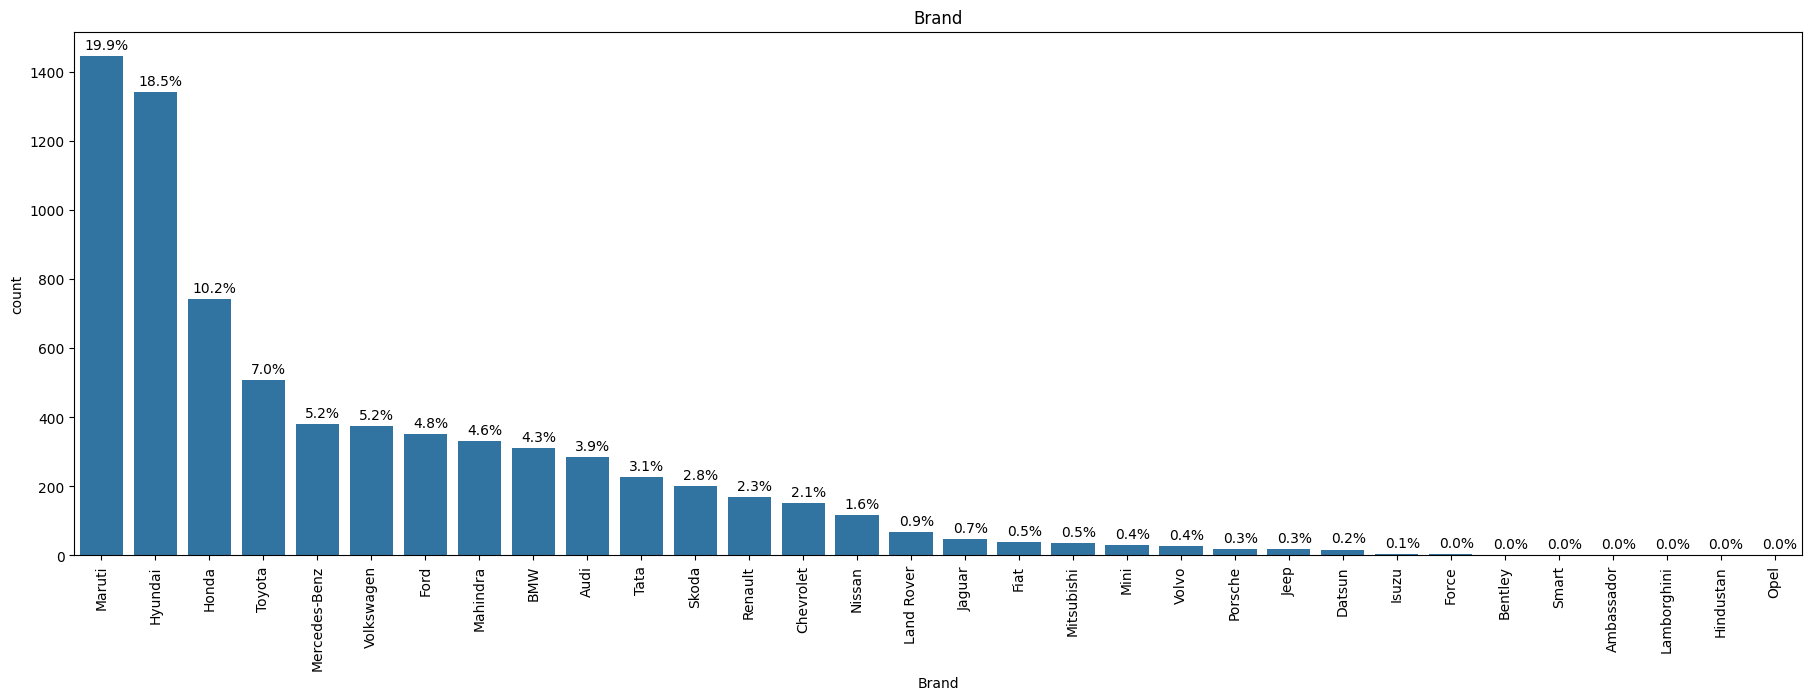

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







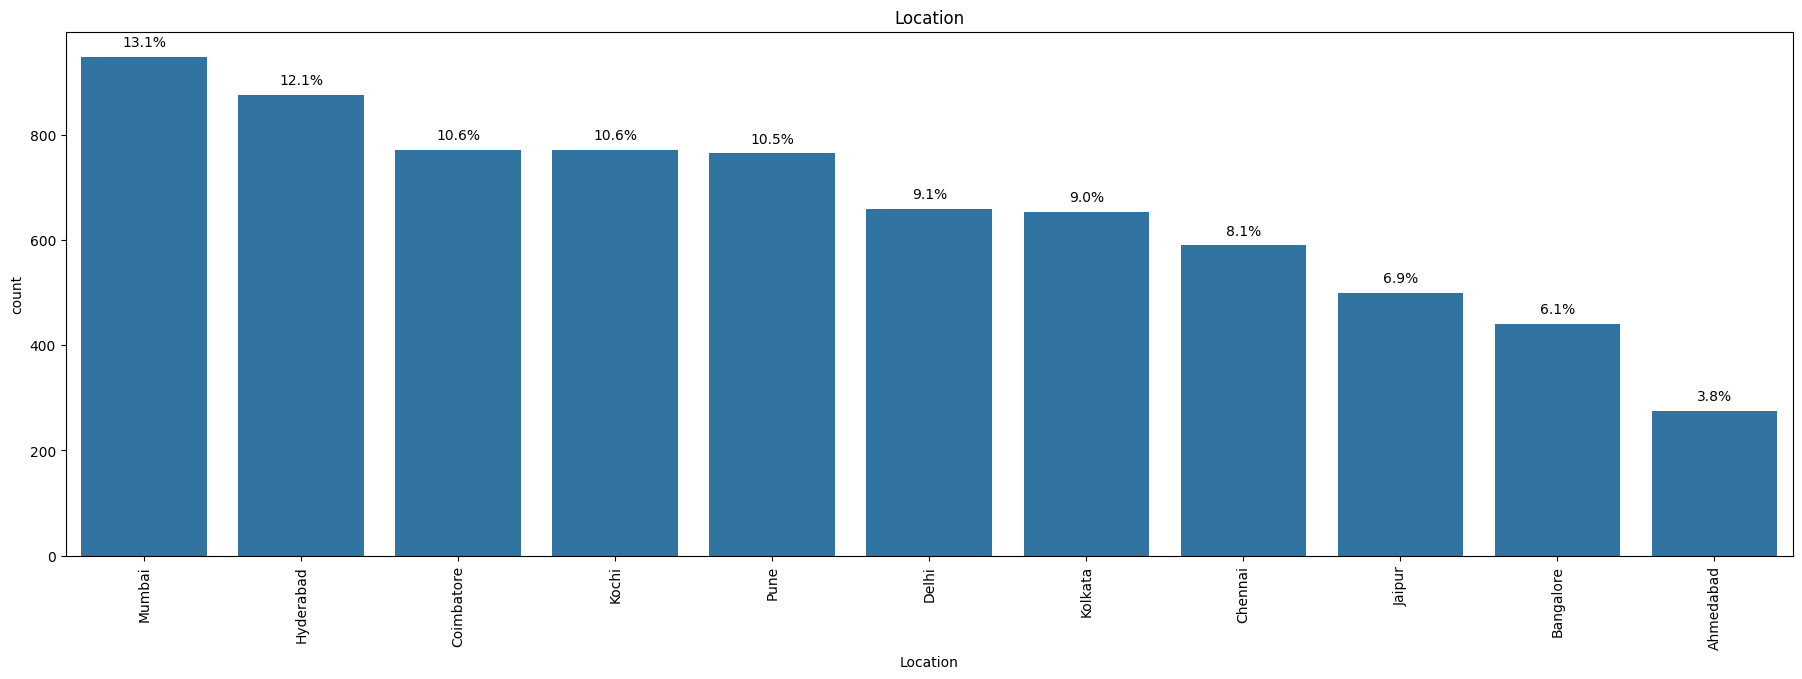

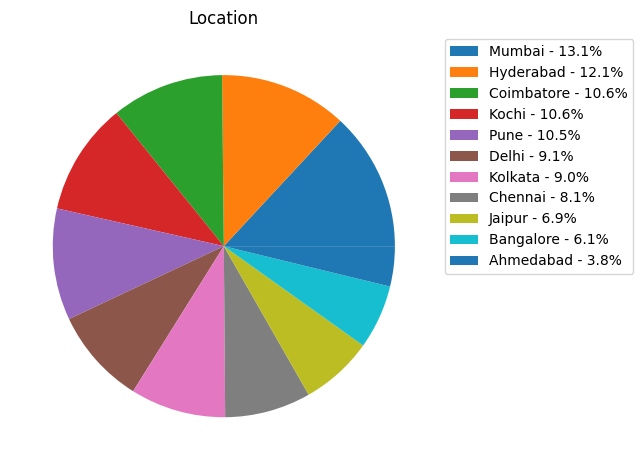

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







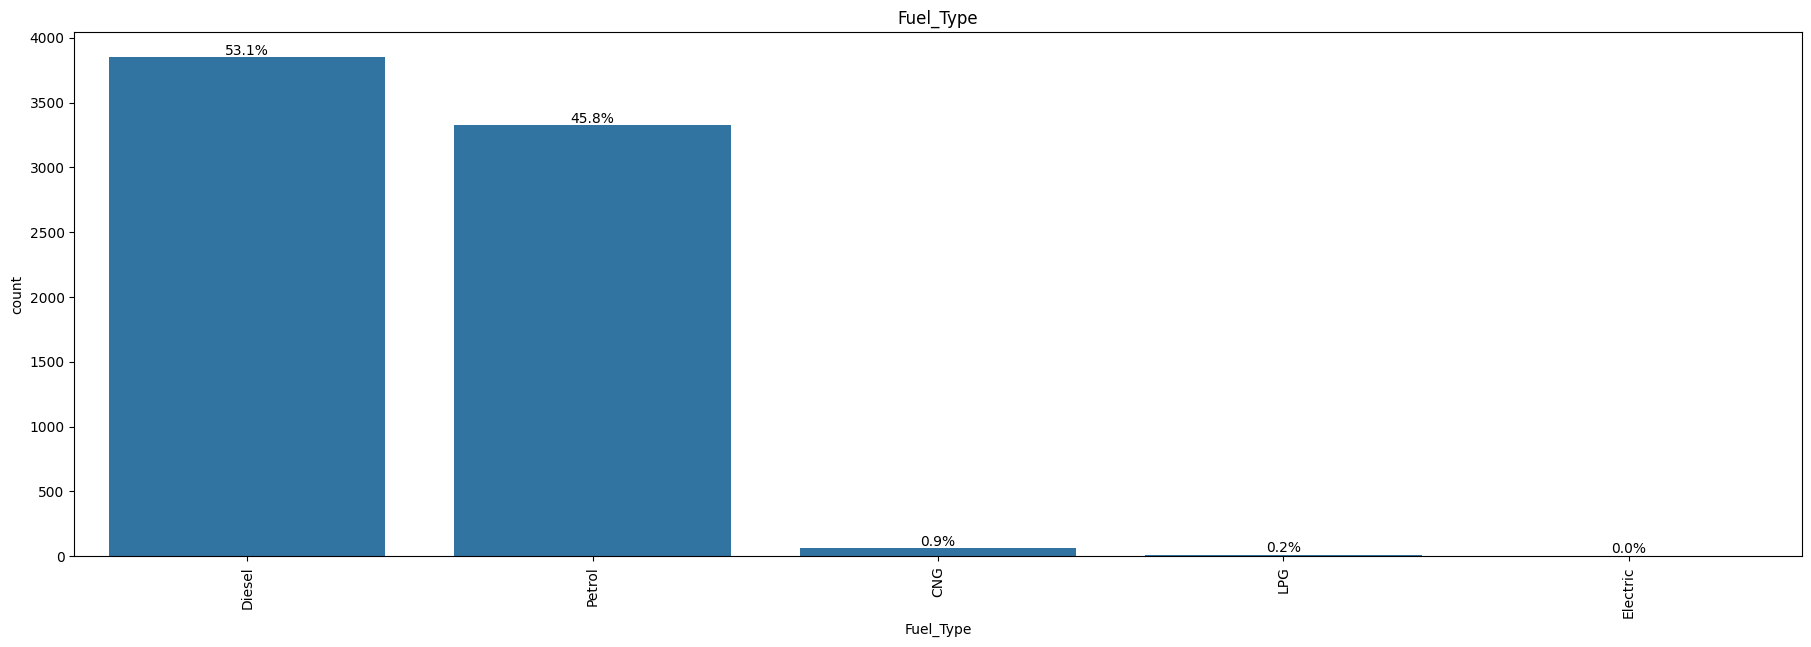

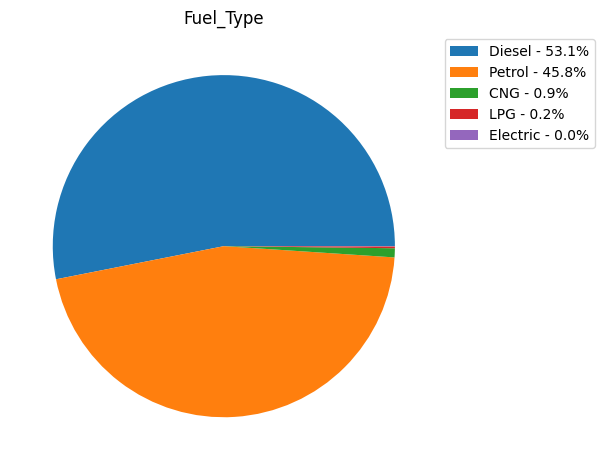

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







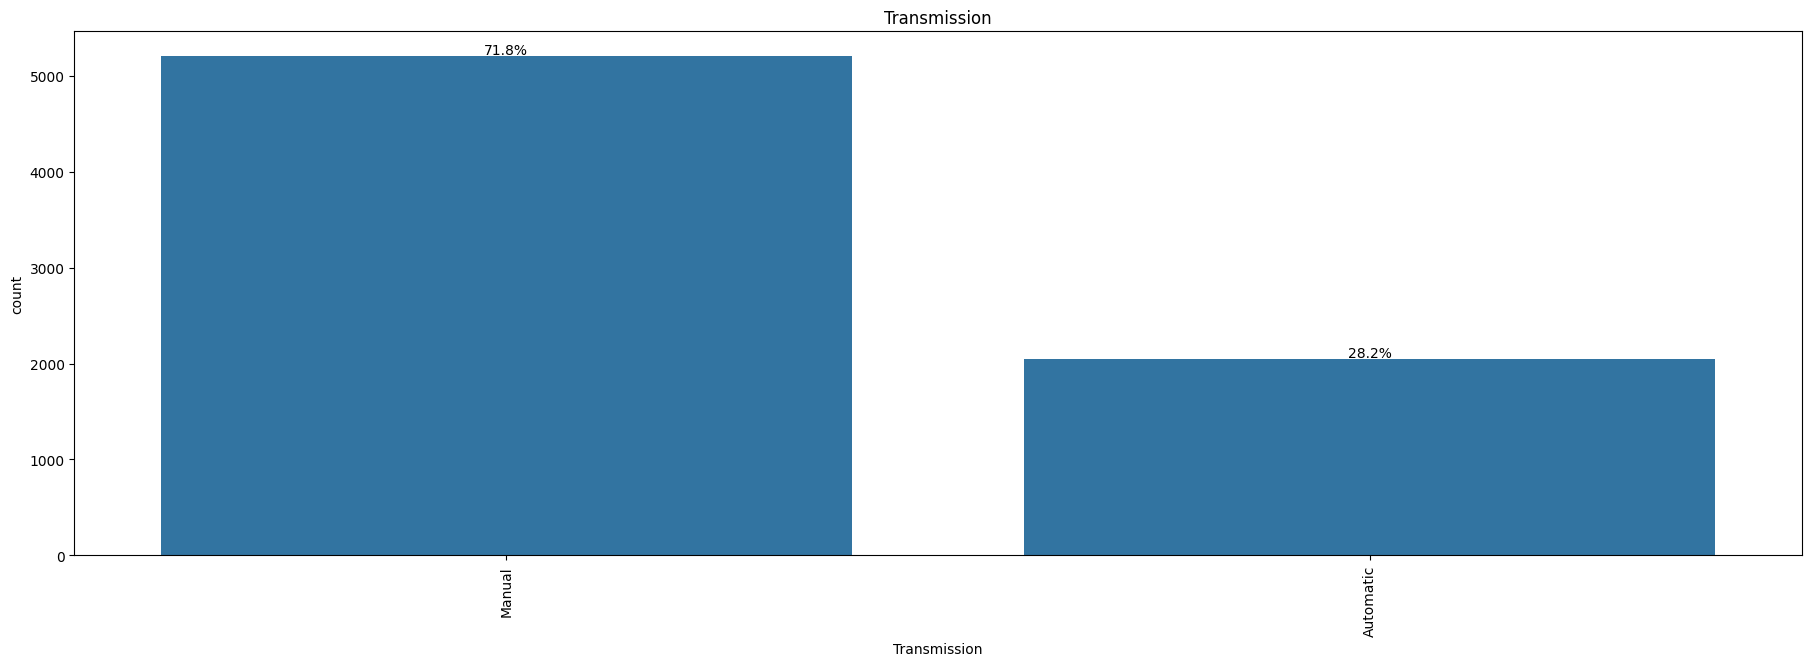

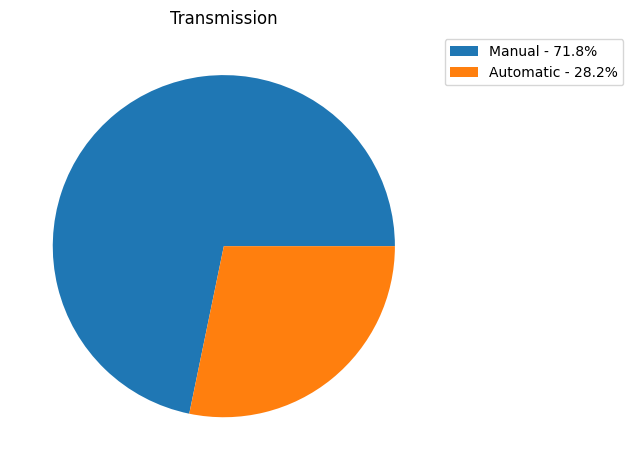

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







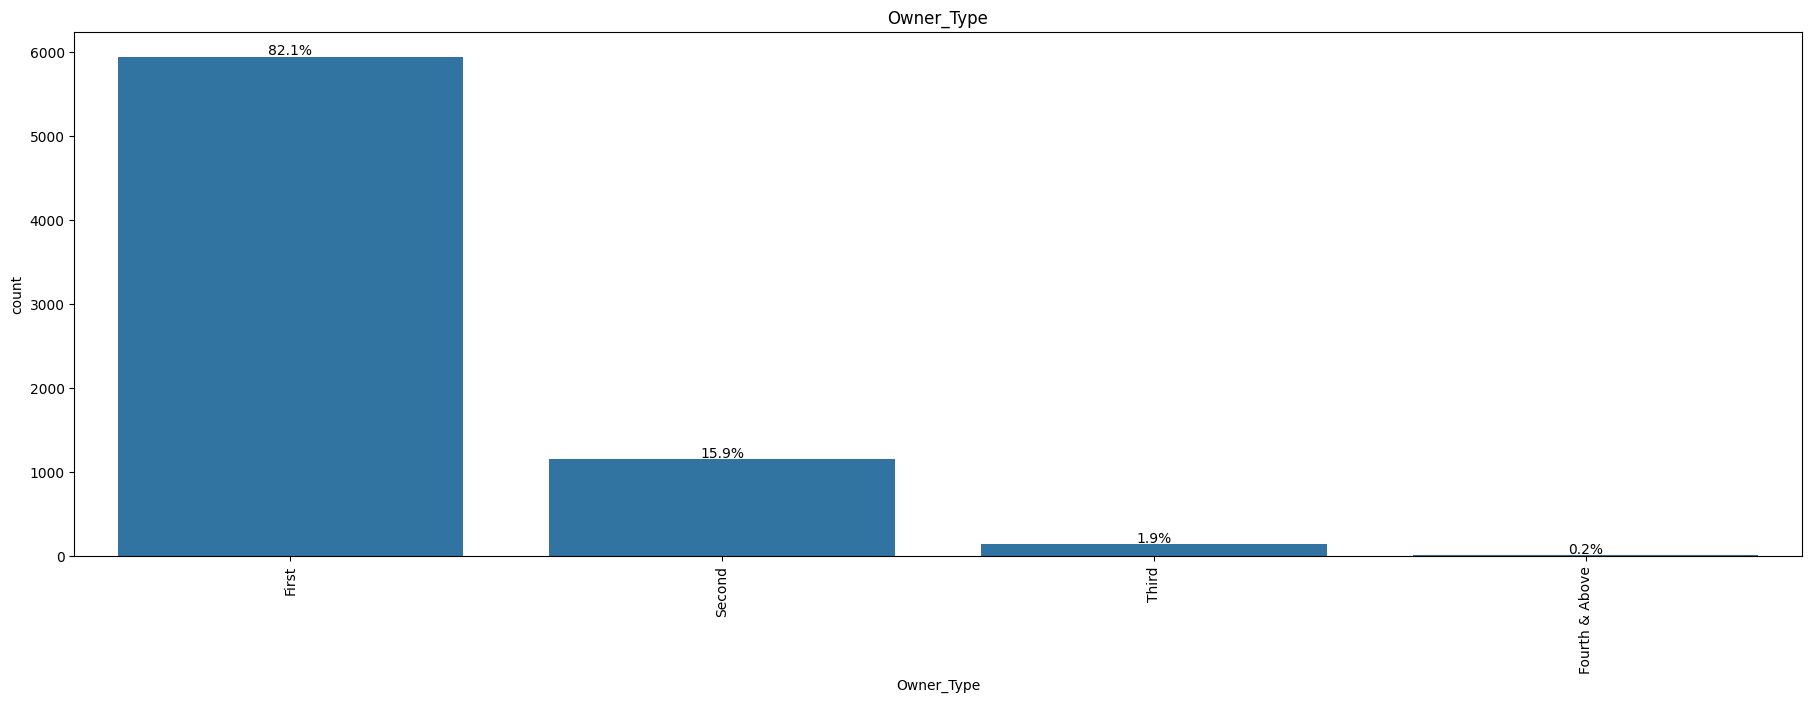

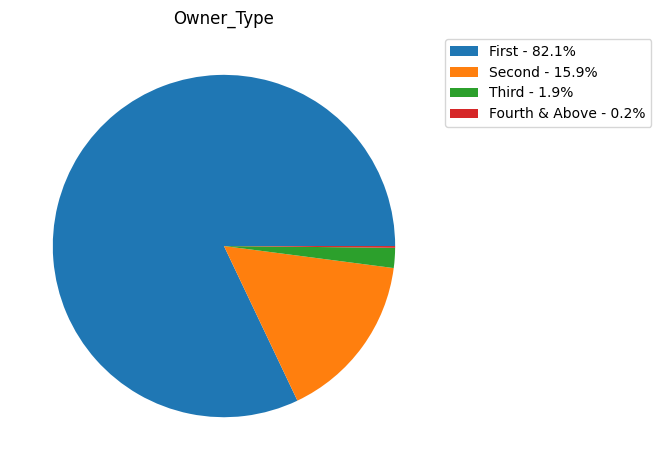

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







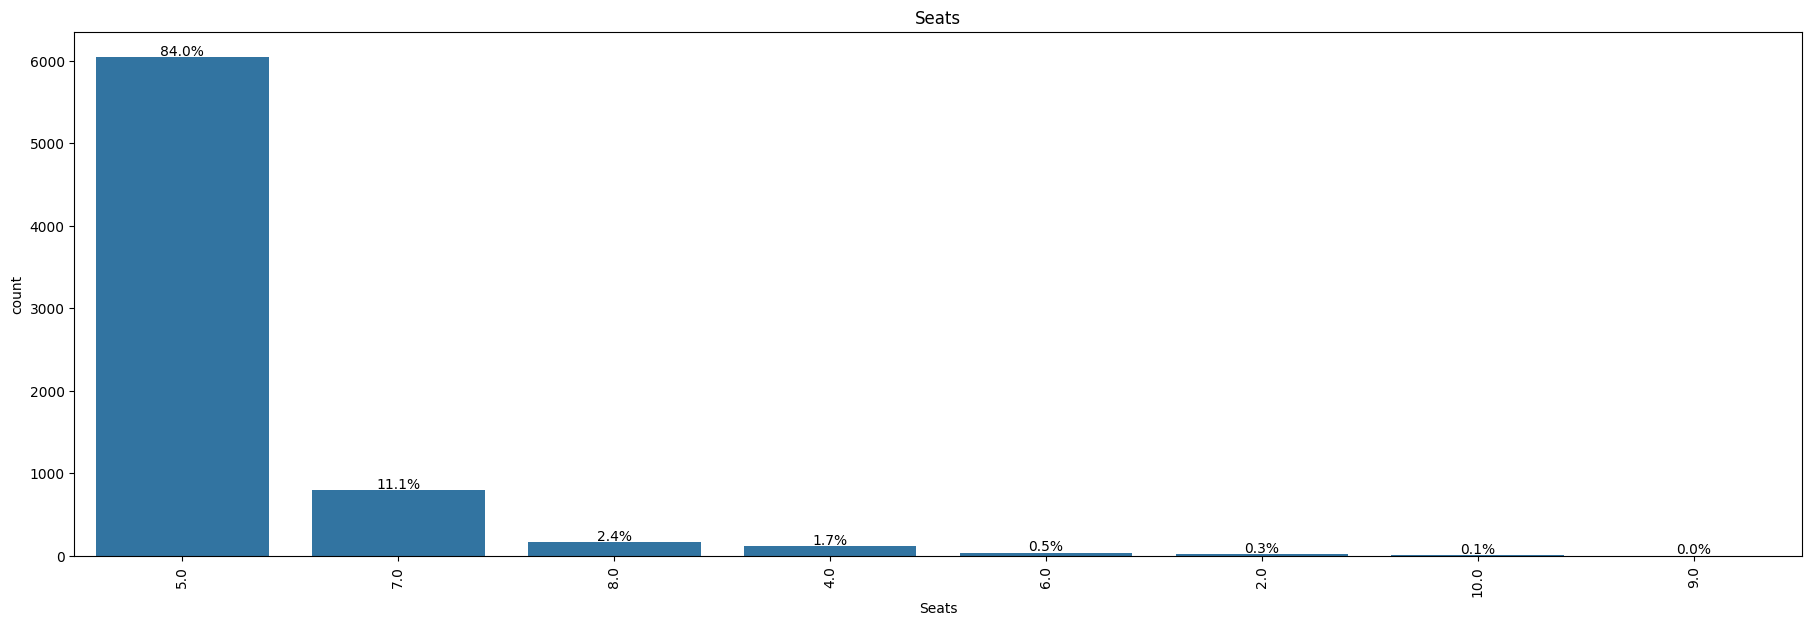

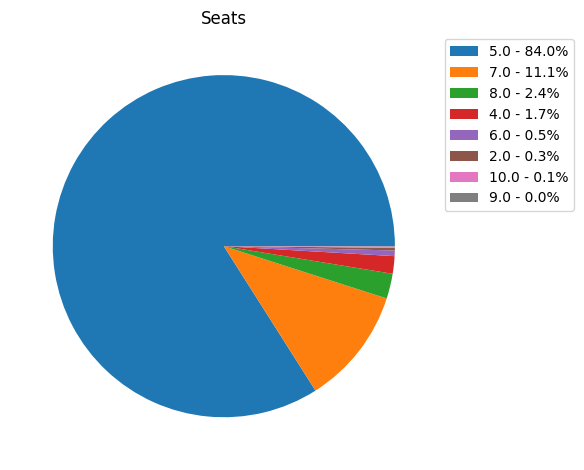

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 







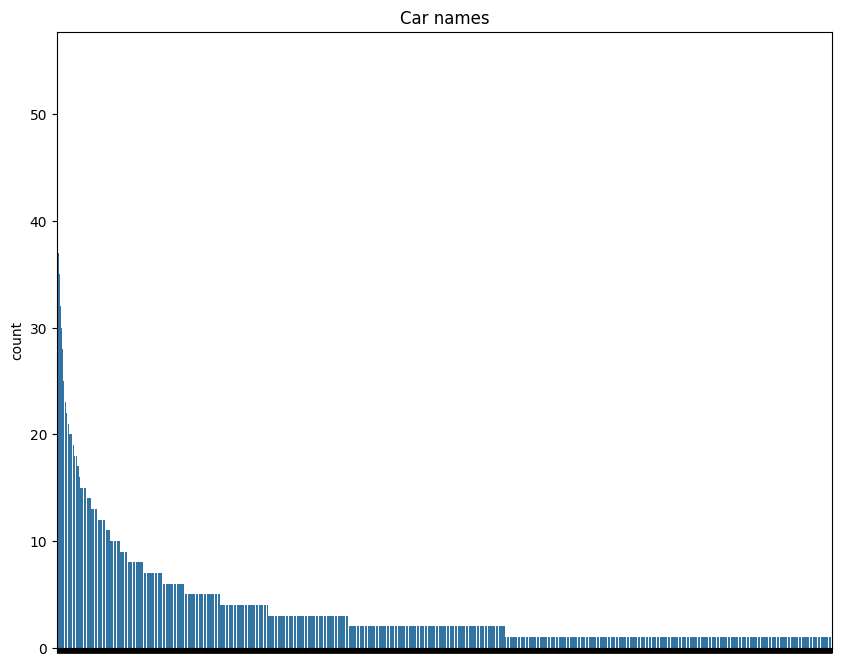

Top 5 most sold cars 
                         count
Name                         
Mahindra XUV500 W8 2WD     55
Maruti Swift VDI           49
Maruti Swift Dzire VDI     42
Honda City 1.5 S MT        39
Maruti Swift VDI BSIV      37 




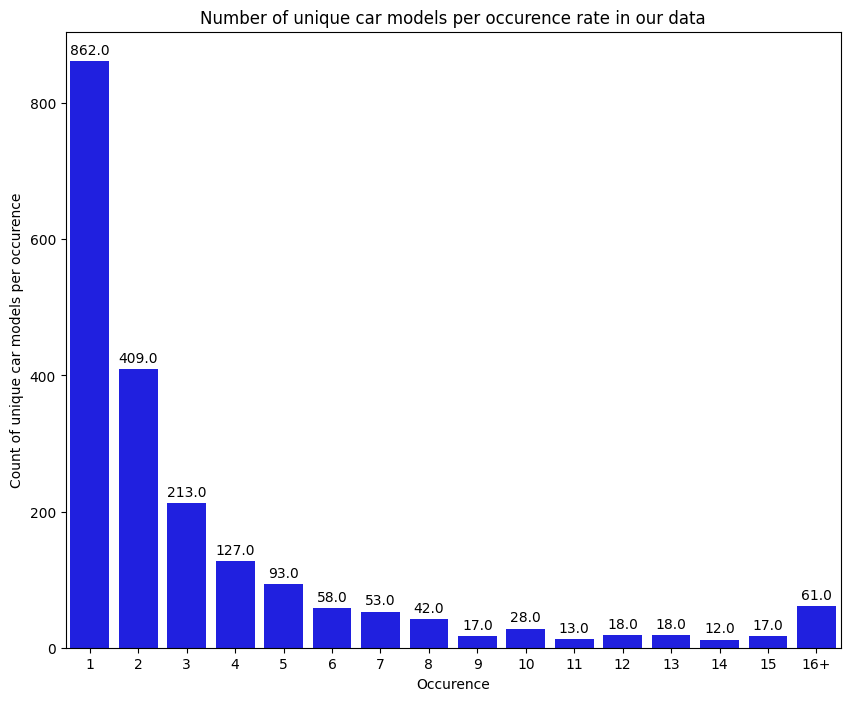

The number of car models that appear with statistical significance (30 or more times) in our data is: 13


In [41]:
# Create for loop for each categorical variable (excluding Name, and including Seats)
for i in cat:
# Set graph dimensions & titles
  plt.figure(figsize=(18,6))
  plt.title(i)
  plt.tight_layout()
# Make labels vertical to read easier
  plt.xticks(rotation=90)
# Plot the data
  plot=sns.countplot(data=df,x=i,order=df[i].value_counts().index)
# Create variables to be used later when displaying data as pie charts
  x=np.array(df[i].value_counts()) # NumPy array of count of unique values of feature i
  y=df[i].value_counts().index.to_list() # Corresponding unique values to x. We don't use df[i].unique() to make sure the x and y iterables are in the same order
  percs=[] # List we will use later to collect percentages
# Add percentages to the bins
  total=0
# Get total number of entries for the feature i
  for j in plot.patches:
    total=total+j.get_height()
# Find percentages, add to the percentages list, and annotate bar chart
  for k in plot.patches:
    perc=round(k.get_height()*100/total,1)
    percs.append(perc)
    if i=='Brand':
      plot.annotate(str(perc)+'%',(k.get_x()+0.5*k.get_width()+0.1,k.get_y()+k.get_height()+20),ha='center')
    else:
      plot.annotate(str(perc)+'%',(k.get_x()+0.5*k.get_width(),k.get_y()+k.get_height()+20),ha='center')
  plt.show()
# Create pie chart
  if i=='Brand':
    print('-'*200,'\n'*5)
    continue
  else:
    plt.title(i)
    plt.pie(x)
    plt.tight_layout()
    labels=[str(cat)+' - '+str(p)+'%' for cat,p in zip(y,percs)] # Use y and percs to write the custom legends for each pie chart
    plt.legend(labels,bbox_to_anchor=(1,1))
    plt.show()
  print('-'*200,'\n'*5)

# Name graph
plt.figure(figsize=(10,8))
plt.title('Car names')
plt.xticks(visible=False) # Too many names, so remove the labels and instead show the top 5 cars
sns.countplot(data=df,x='Name',order=df.Name.value_counts().index)
plt.show()
print('Top 5 most sold cars','\n',pd.DataFrame(df.Name.value_counts()).rename(columns = {'Name':'Count'}).head(),'\n'*2)

# Plot bar chart showing the count of unique car models that have a certain occurence in our data
# Create dataframe
namecalcs=pd.DataFrame({'Count':df.Name.value_counts().value_counts().iloc[:15].index,'Value':df.Name.value_counts().value_counts().iloc[:15].values}).sort_values(by='Count')
namecalcs.loc[len(namecalcs.index)] = ['16+', df.Name.value_counts().value_counts().iloc[15:].sum()]
# Plot bar chart
plt.figure(figsize=(10,8))
plot2=sns.barplot(data=namecalcs,x='Count',y='Value',color='Blue')
plt.title('Number of unique car models per occurence rate in our data')
plt.xlabel('Occurence')
plt.ylabel('Count of unique car models per occurence')
# Annotate
percs2=[]
for k in plot2.patches:
  plot2.annotate(k.get_height(),(k.get_x()+0.5*k.get_width(),k.get_y()+k.get_height()+10),ha='center')
plt.show()
print('The number of car models that appear with statistical significance (30 or more times) in our data is:',(df.Name.value_counts()>=30).sum())

**Observations**

Many of the categorical variables seem to be skewed heavily to one or a few values. This may indicate a relative uniform market for those features
- **Brand:** About half the car brands have less than a 1% share of the pre-owned car market. Since we have 32 car brands, an equal market share between all of them would be 3.125%. We see 21 brands have a lower share of the market than this. We also see that over 50% of the market is shared between only three car brands: Maruti Suzuki, Hyundai, and Honda
- **Location:** The distribution for location is more uniform than for brand, with only about one third of the locations having less than 1/11th of the market share. As seen earlier, Ahmedabad sees significantly fewer sales than other locations. It may be interesting to compare car brands and location
- **Fuel Type:** As seen earlier, this feature is dominated by Diesel and Petrol, with the remaining fuel types only adding up to just above 1%. It will be interesting to see how these affect prices. It may also be good to look at the manufacture year for cars with these fuel types.
- **Transmission:** There is about a 5:2 ratio between manual:automatic cars
- **Owner Type:** The vast majority of cars sold had only one previous owner. We can look at how this distribution differs between the other features
- **No. seats:** The number of seats is heavily skewed towards 5 at 84% market share, with the next highest being 7 seats at 11%
- **Car names & models:** We see an exponential decrease in car name counts. Out of the top 5 car models, 3 are Maruti Suzuki, and 1 Honda. Surprisingly, the most sold car is a Mahindra, which only has a 4.6% market share. We can also see that the vast majority of car models appear only once in our data (at 862 distinct models), and 409 appear twice. This means that over half of our 2041 disinct car models appear only once or twice in our data. This makes predictions based on specific car models/names quite difficult, and we may end up dropping the 'Name' column in favour of 'Brand' from our data because of it unless we aggregate the data from the 'Name' column some other way. This is reinforced by seeing that only 13 unique car models appear 30 or more times in our data - not nearly enough to make any useful conclusions about trends and predictions in prices based off the 'Name' column

#### Numerical variables

In [42]:
# Create list with all numerical variables (including Seats)
num=df.select_dtypes(include=['int64','float64']).columns.to_list()

In [43]:
# Create list for each numerical variable's units and correspond the variables to the list as their indices
un=['','km','kmpl','cc','bhp','seats','INR 100,000','INR 100,000']
uns=pd.Series(un,index=num)
# Create function that returns the unit when given a numerical variable
def units(unit):
  for j in uns.index:
    if unit==j:
      return uns[j]

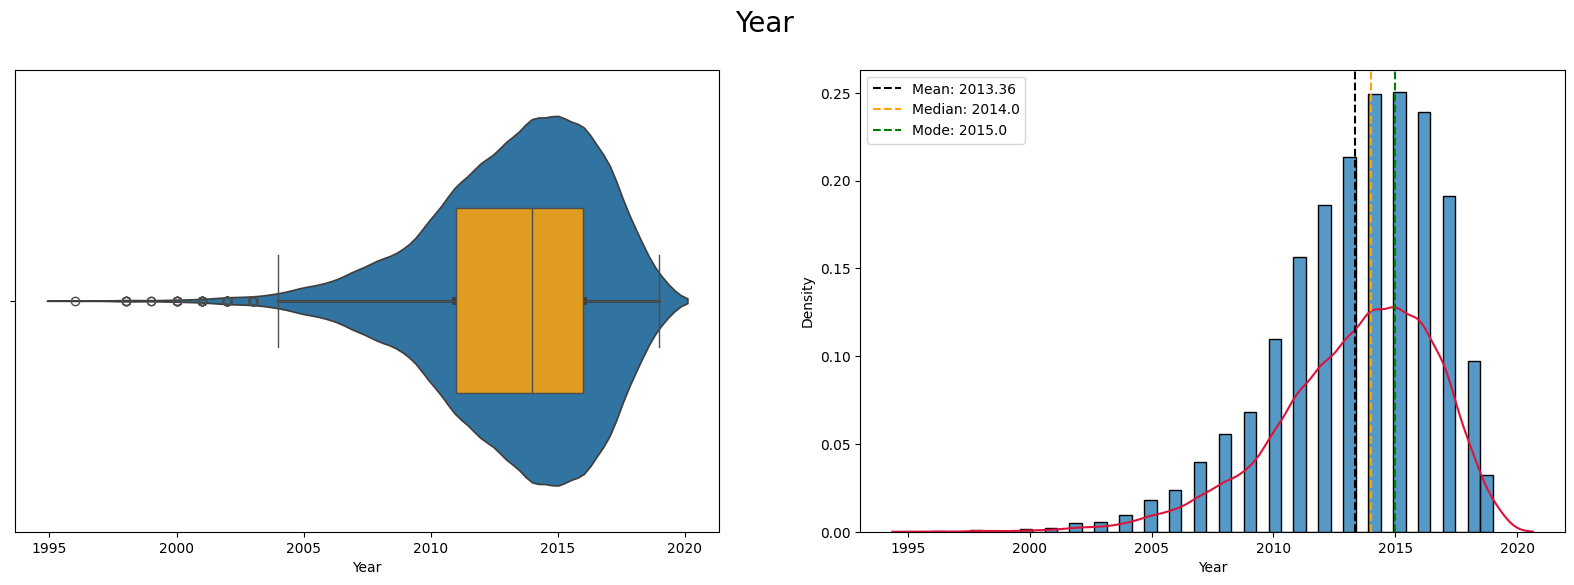

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


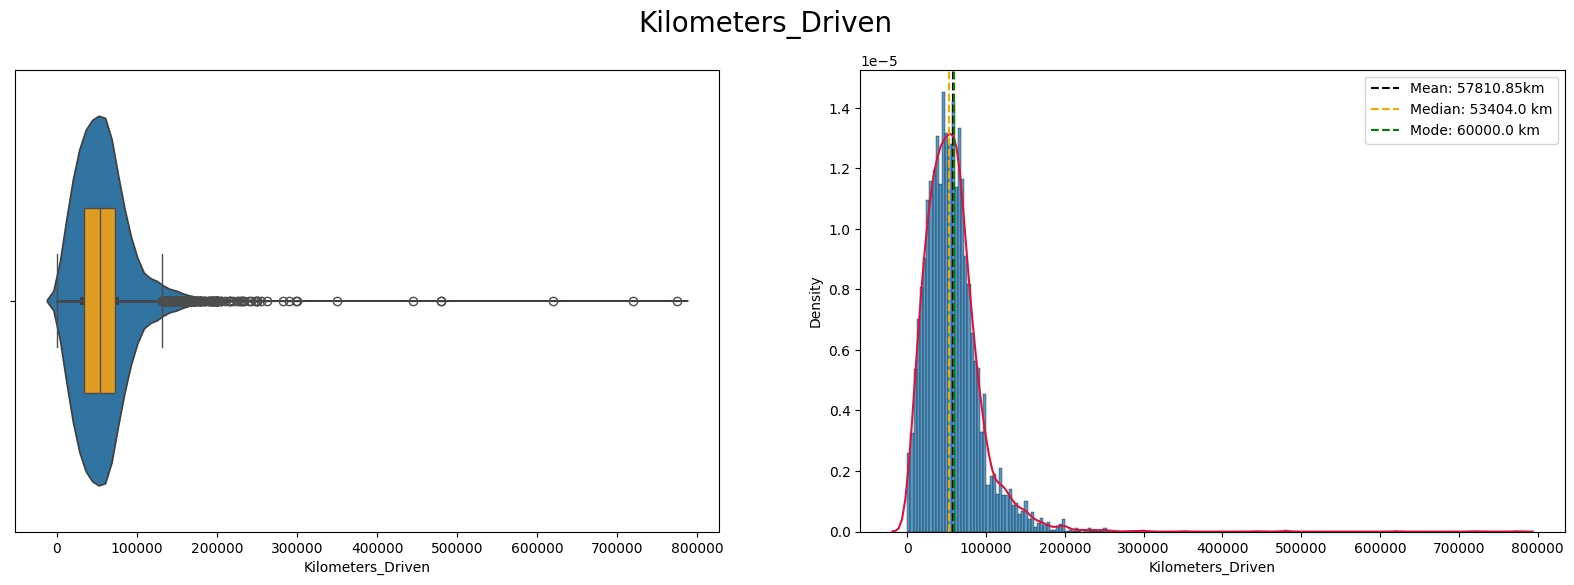

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


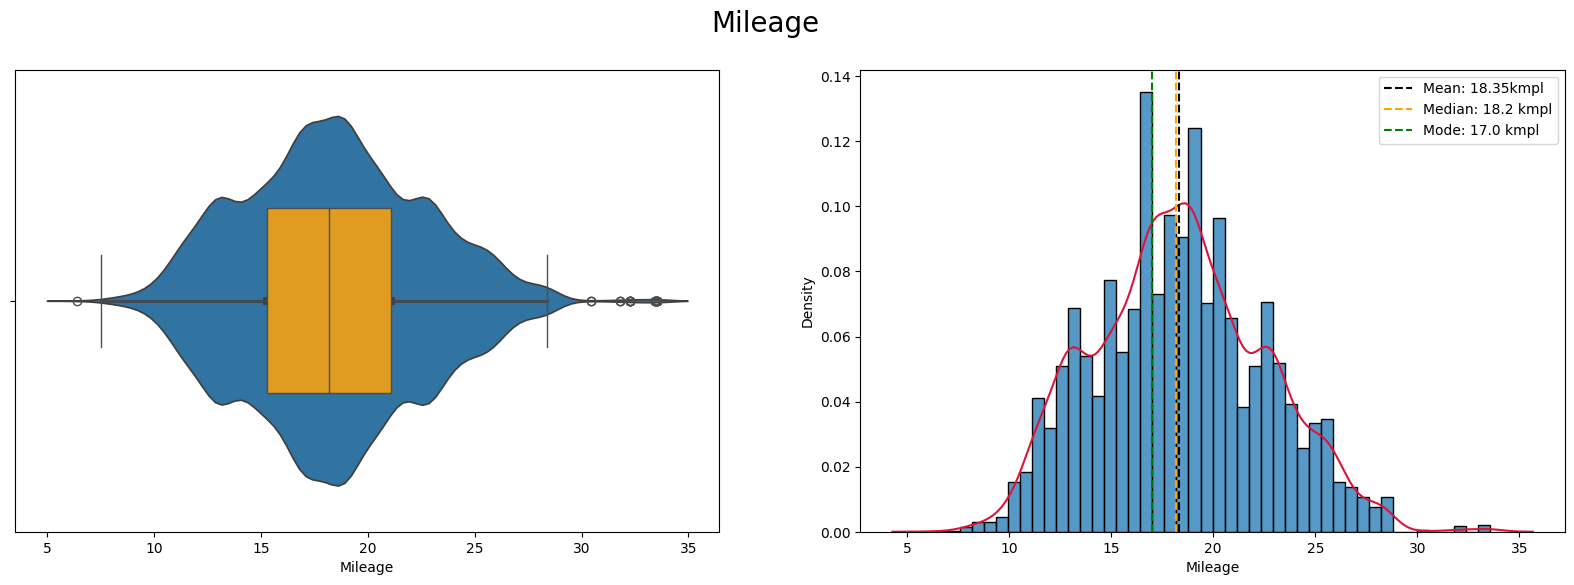

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


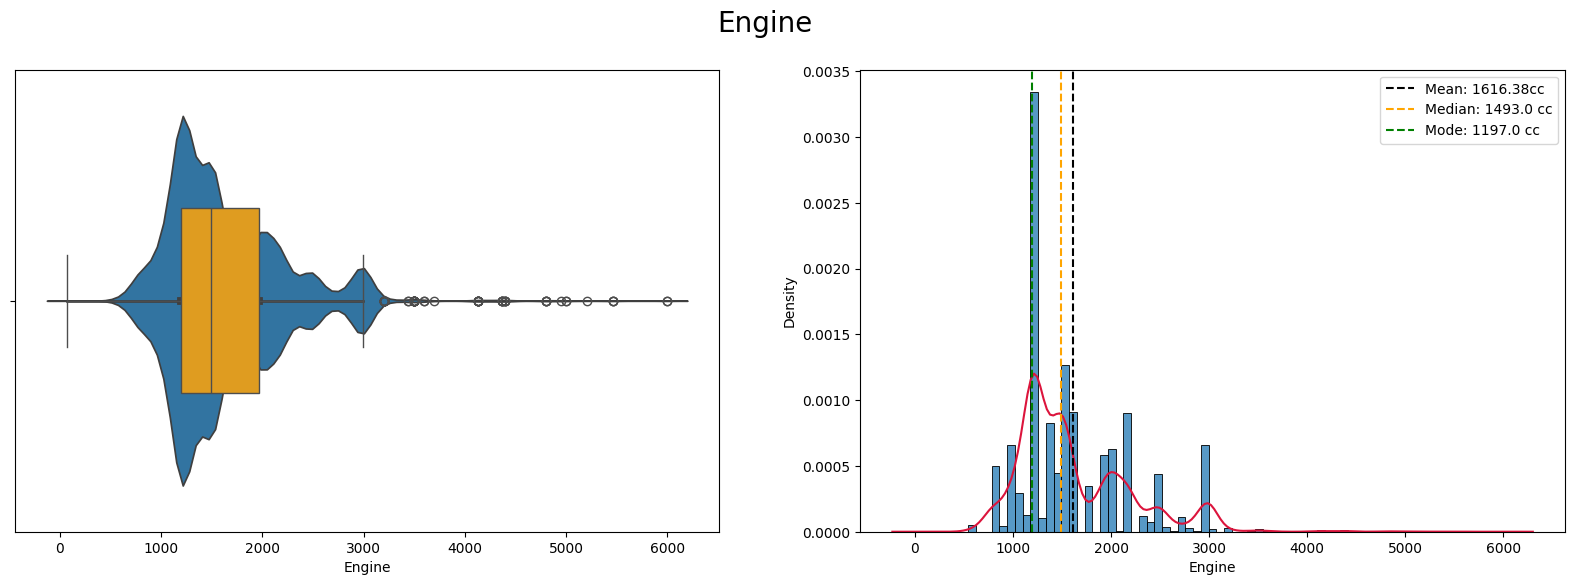

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


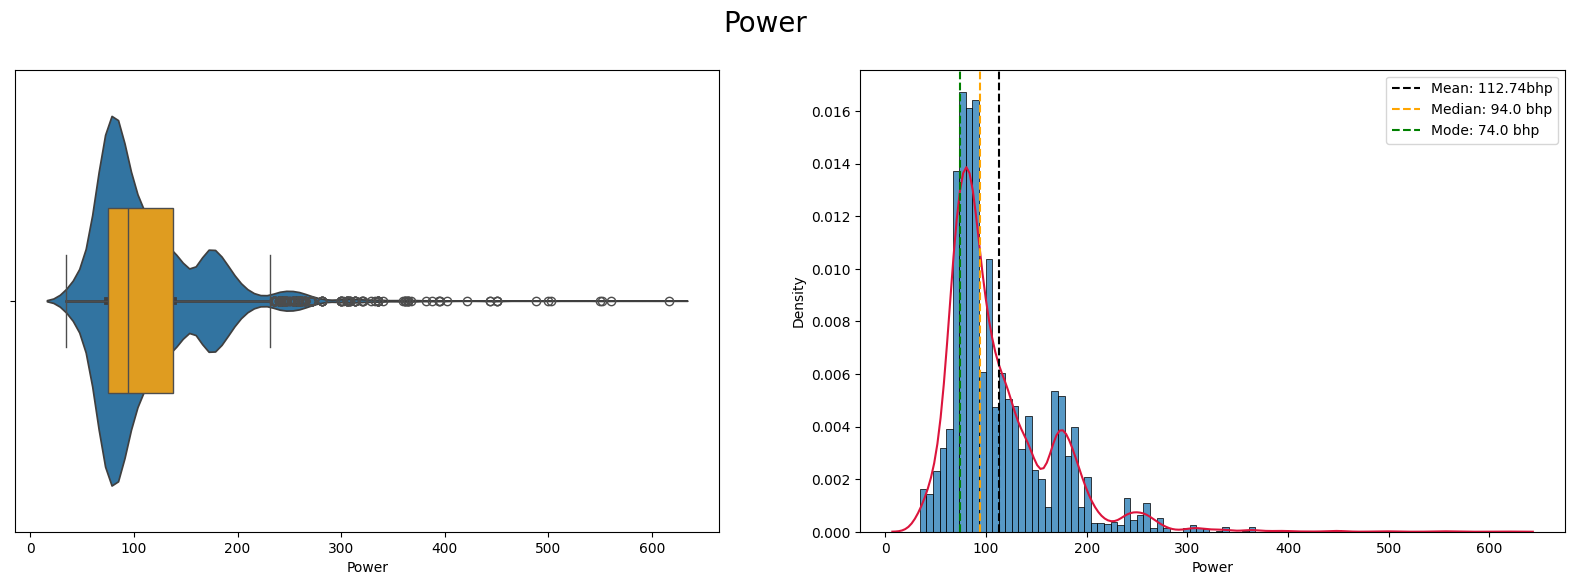

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


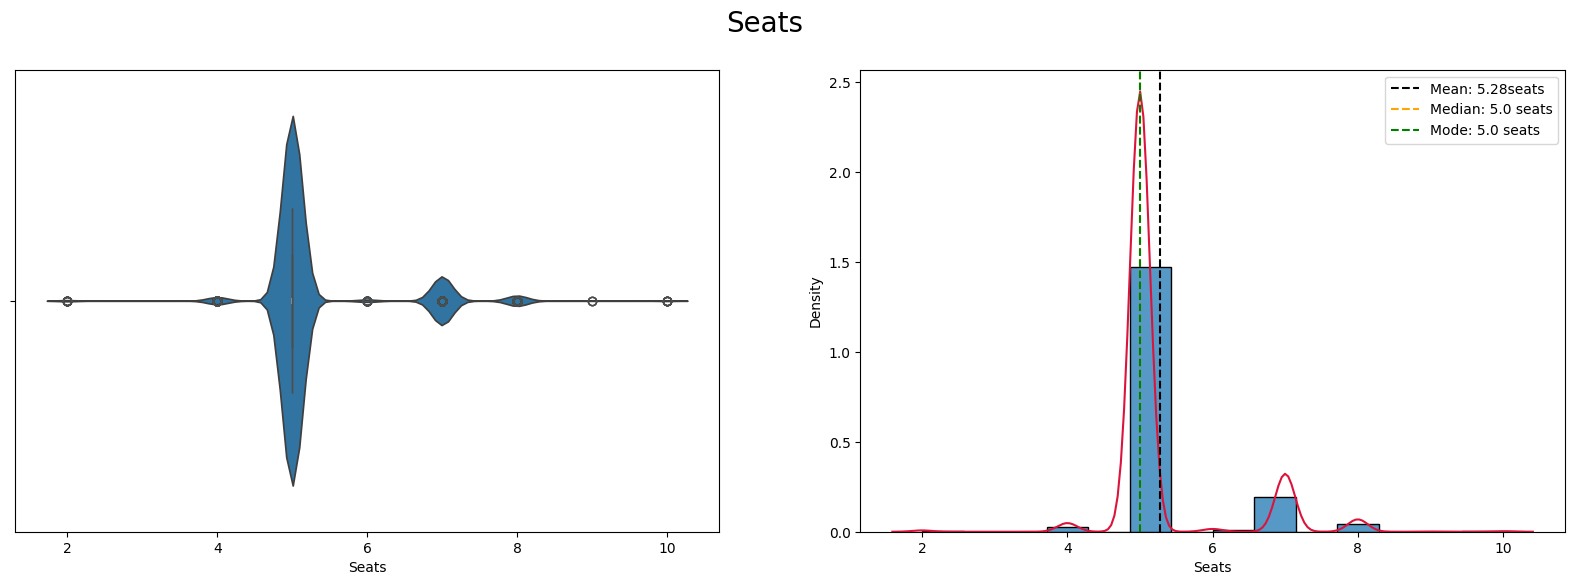

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


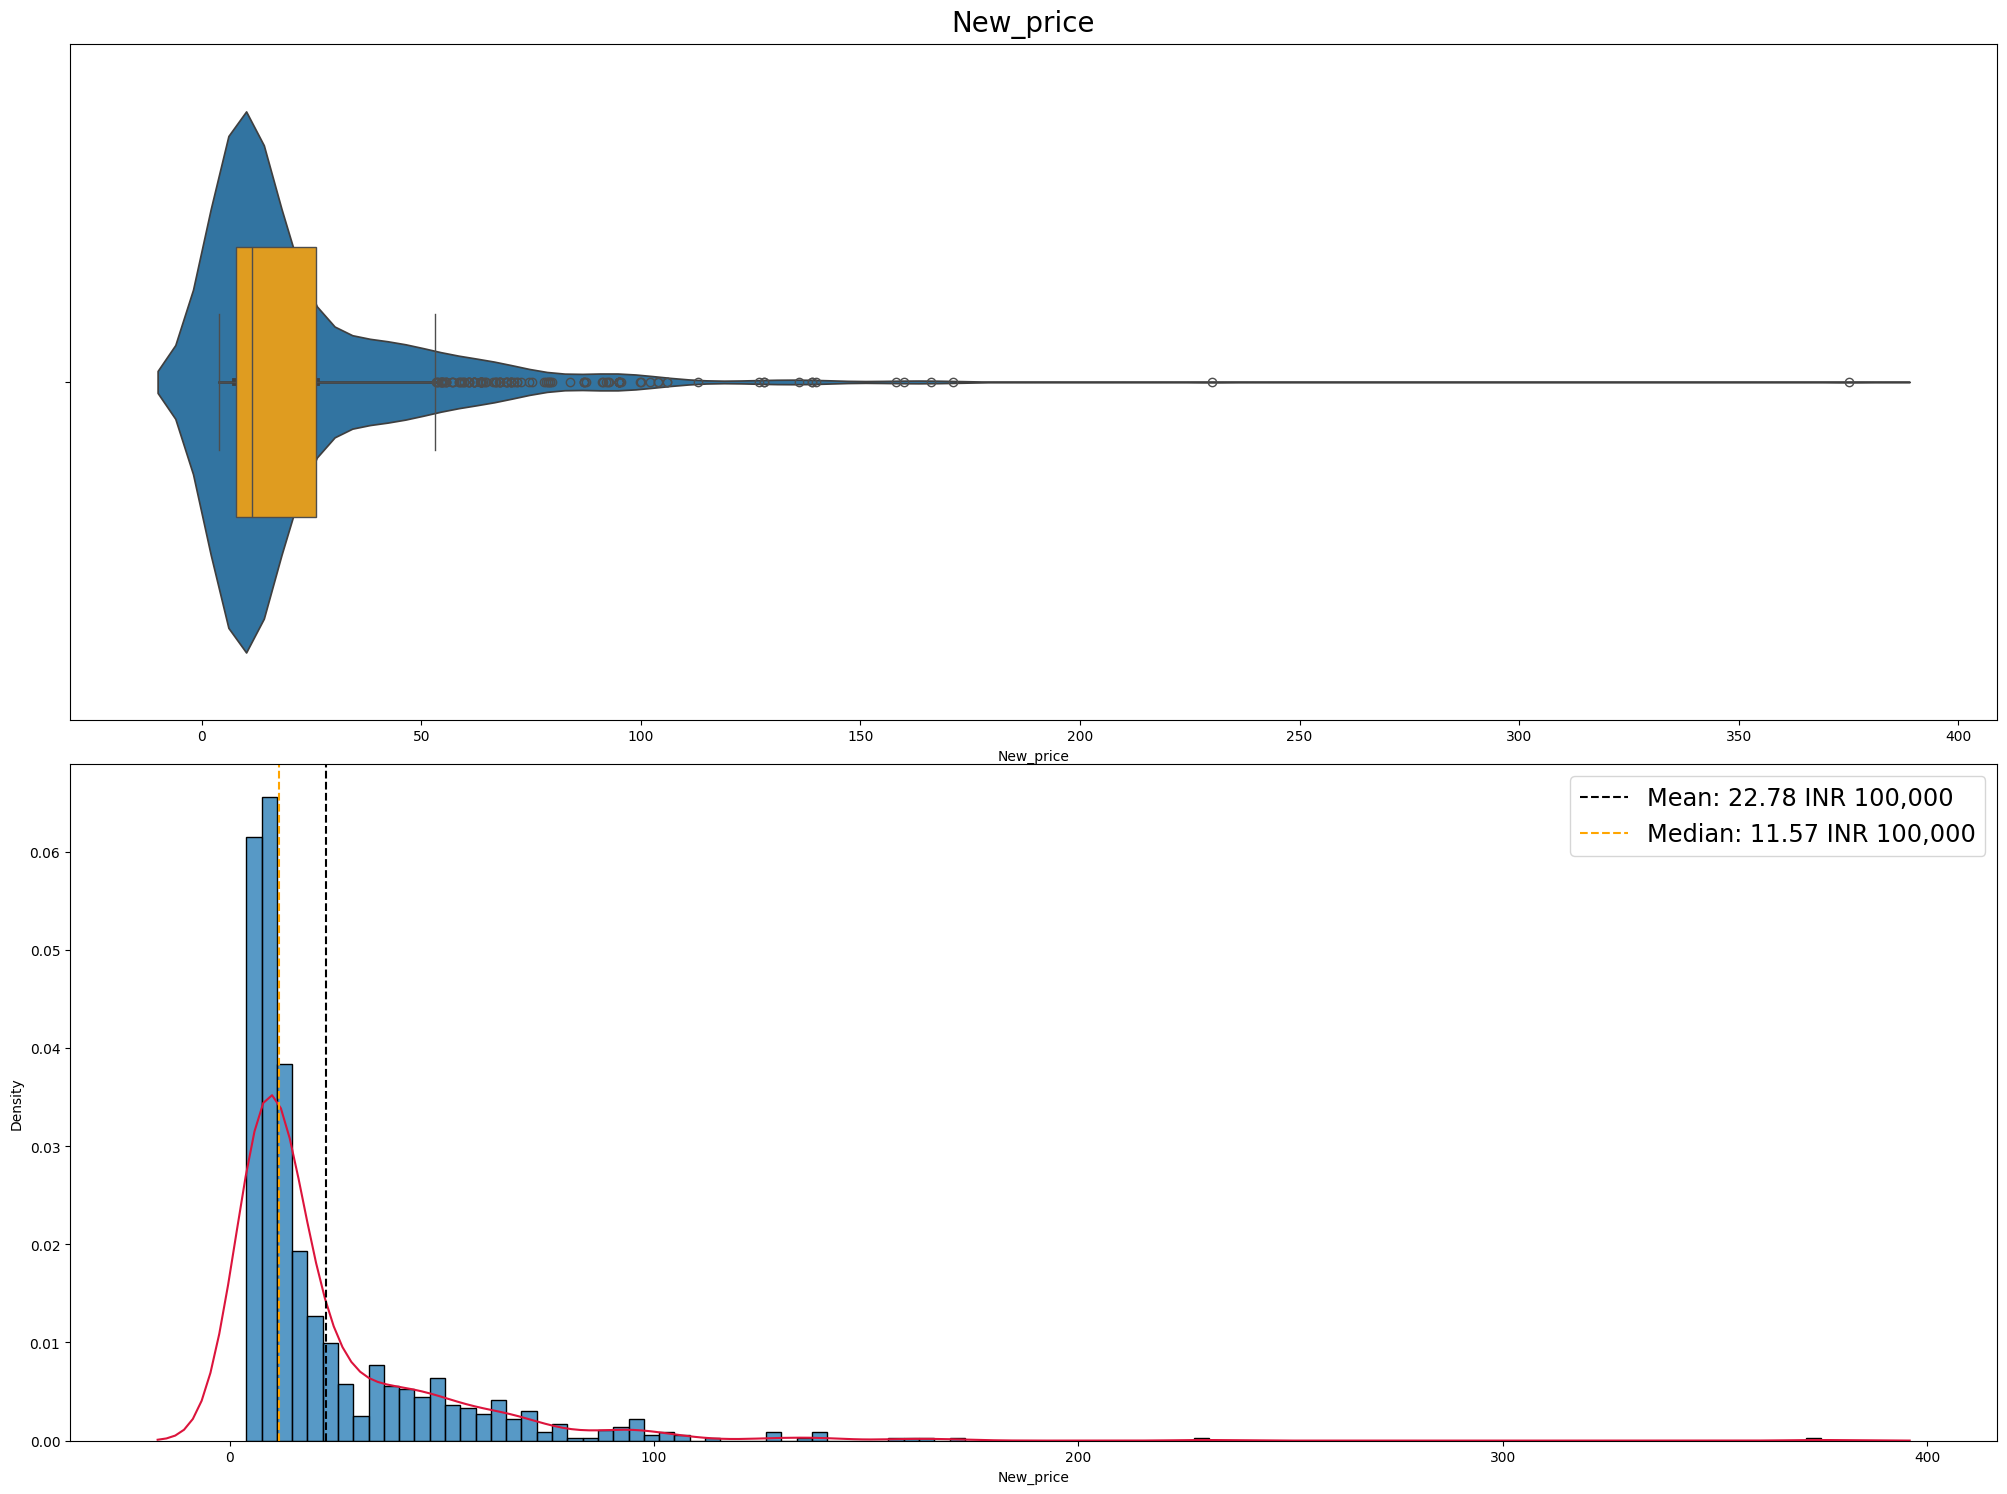

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


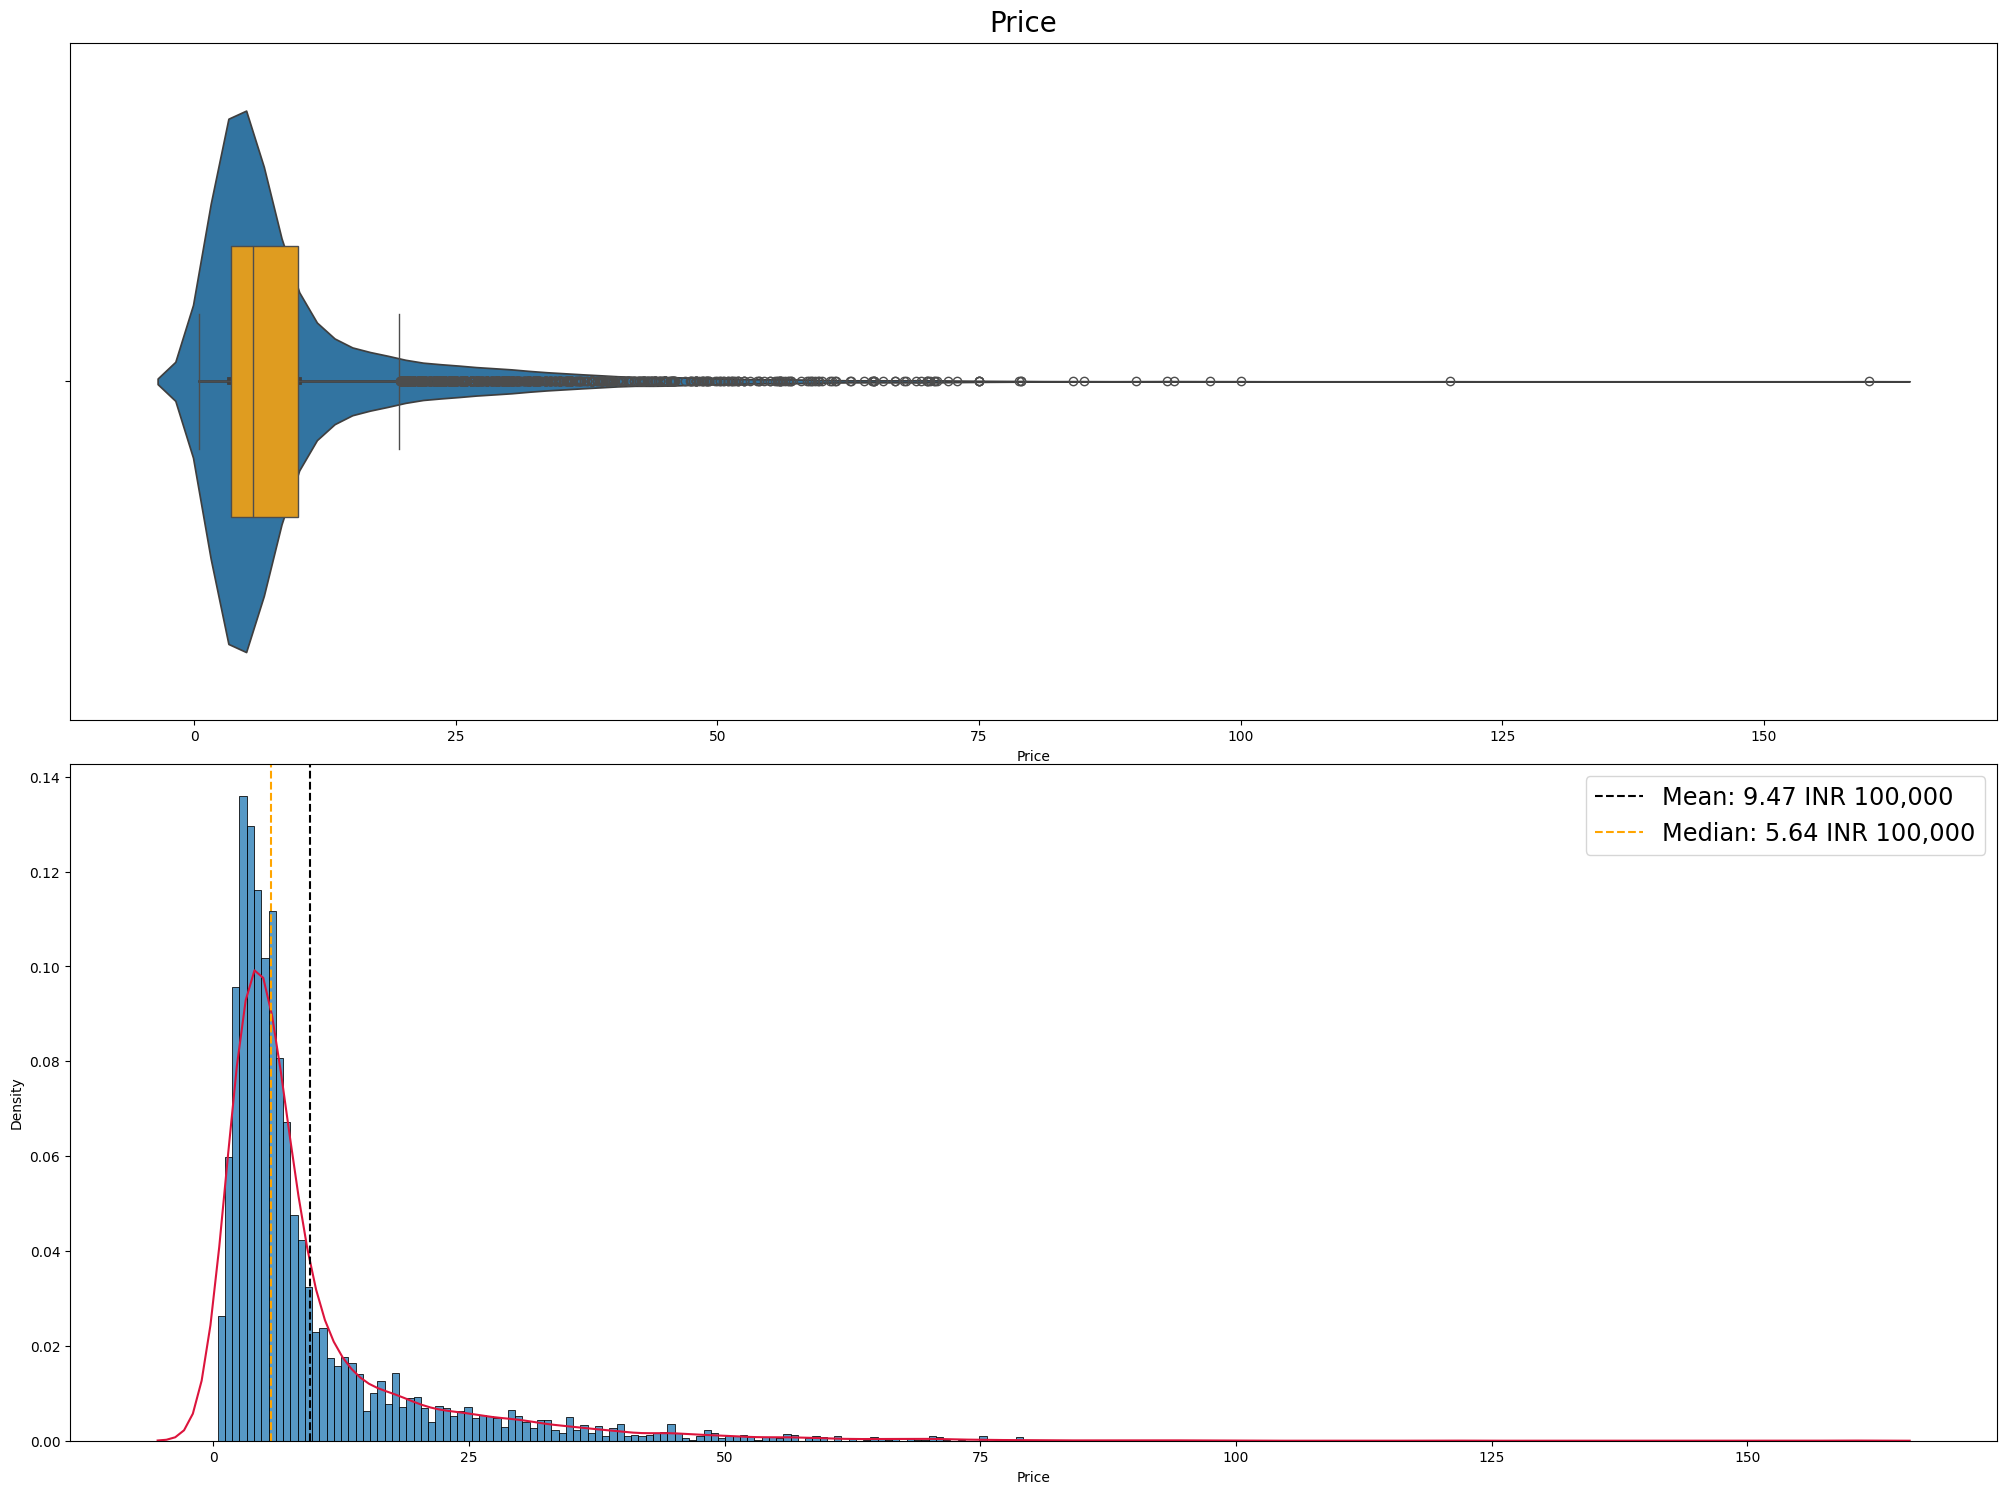

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [44]:
'''
We will make two kinds of plot for each numerical variable:
  1. Violin plot superimposed by a boxplot
  2. Histogram with the kernel density estimation and vertical lines for the mean, median, and mode
Note:
  - We construct a separate if statement for the prices since we aren't including modal price lines
  - We construct a separate if statement for the Year variable to make sure the legend doesn't obstruct the graph
  - To better visualise the price graph, we print one plot, instead of plotting the violin plot and histogram on the same row
  -
'''
for i in num:
  if i=='New_price' or i=='Price':
    fig,(b,h)=plt.subplots(nrows=2,ncols=1,figsize=(20,15)) # Increase figsize here to better see the price graphs
    fig.suptitle(i,fontsize=20)
    fig.tight_layout()
    sns.violinplot(data=df,x=i,ax=b)
    sns.boxplot(data=df,x=i,width=0.4,color='orange',boxprops={'zorder': 2},ax=b) # Superimpose a boxplot on top of the violinplot
    sns.histplot(data=df,x=i,kde=False,ax=h,stat='density')
    sns.kdeplot(data=df,x=i,color='crimson',ax=h)
    meanline=h.axvline(x=df[i].mean(),linestyle='dashed',color='black',label='Mean: '+str(round(df[i].mean(),2))+' '+units(i))
    medianline=h.axvline(x=df[i].median(),linestyle='dashed',color='orange',label='Median: '+str(round(df[i].median(),2))+' '+units(i))
    h.legend(loc='upper right',handles=[meanline,medianline],fontsize='xx-large')
    plt.show()
    print('-'*200)
  elif i=='Year':
    fig,(b,h)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    fig.suptitle(i,fontsize=20)
    sns.violinplot(data=df,x=i,ax=b)
    sns.boxplot(data=df,x=i,width=0.4,color='orange',boxprops={'zorder': 2},ax=b)
    sns.histplot(data=df,x=i,kde=False,ax=h,stat='density')
    sns.kdeplot(data=df,x=i,color='crimson',ax=h)
    meanline=h.axvline(x=df[i].mean(),linestyle='dashed',color='black',label='Mean: '+str(round(df[i].mean(),2))+units(i))
    medianline=h.axvline(x=df[i].median(),linestyle='dashed',color='orange',label='Median: '+str(round(df[i].median(),2))+units(i))
    mode=float(df[i].mode())
    modeline=h.axvline(x=mode,linestyle='dashed',color='green',label='Mode: '+str(round(float(df[i].mode()),2))+units(i))
    h.legend(loc='upper left',handles=[meanline,medianline,modeline])
    plt.show()
    print('-'*200)
  else:
    fig,(b,h)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    fig.suptitle(i,fontsize=20)
    sns.violinplot(data=df,x=i,ax=b)
    sns.boxplot(data=df,x=i,width=0.4,color='orange',boxprops={'zorder': 2},ax=b)
    sns.histplot(data=df,x=i,kde=False,ax=h,stat='density')
    sns.kdeplot(data=df,x=i,color='crimson',ax=h)
    meanline=h.axvline(x=df[i].mean(),linestyle='dashed',color='black',label='Mean: '+str(round(df[i].mean(),2))+units(i))
    medianline=h.axvline(x=df[i].median(),linestyle='dashed',color='orange',label='Median: '+str(round(df[i].median(),2))+' '+units(i))
    mode=float(df[i].mode())
    modeline=h.axvline(x=mode,linestyle='dashed',color='green',label='Mode: '+str(round(float(df[i].mode()),2))+' '+units(i))
    h.legend(loc='upper right',handles=[meanline,medianline,modeline])
    plt.show()
    print('-'*200)

**Observations**
- **Year:** Looks pretty normally distributed, and doesn't have many significant outliers
- **Kilometers Driven:** Looks incredibly skewed, there are scores of outliers, including some very significant extreme values. Despite this, the median and mean values are very close together
- **Mileage:** Seems to be nigh-normally skewed, with the mean and median both very similar
- **Engine:** The distribution is a bit wild, with a few outliers and a bit of skew
- **Power:** Like Kilometers Driven, very skewed, with significant outliers. However here, the mean and median aren't as close to each other
- **Seats:** This feature is discrete, and so the above distributions don't carry very useful information compared to the countplots we plotted earlier. In our model building, we may create a model where we convert the Seats feature into categorical data instead of numerical, if the Seats variable is of statistcal significance
- **Price and New Price:** These are both very positively skewed, with many outliers

Since price, new price, and kilometers driven are clearly very skewed. Let's have a deeper look below

In [45]:
for i in num:
  print(i,'skew = ',df[i].skew())

Year skew =  -0.8397050406997638
Kilometers_Driven skew =  3.832545848818344
Mileage skew =  0.20494087213469345
Engine skew =  1.413133430829896
Power skew =  1.9624262822569614
Seats skew =  1.9548877812669965
New_price skew =  4.128299677490268
Price skew =  3.337576076530038


**Observations**
- As expected. Kilometers_Driven, Price, and New_price are very skewed
- We can also see Power and Seats are highly skewed too
- We may have to look at the engine feature too, as it is pretty skewed too

In [46]:
# Take the log of the skewed variables
km_log=np.log(df.Kilometers_Driven)
power_log=np.log(df.Power)
seats_log=np.log(df.Seats)
newprice_log=np.log(df.New_price)
price_log=np.log(df.Price)
num_log=[km_log,power_log,seats_log,newprice_log,price_log]

In [47]:
# Look at the skews again
for i,j in zip(num_log,['km_log','power_log','seats_log','newprice_log','price_log']):
  print(j,'skew:',i.skew())

km_log skew: -1.3539415163105548
power_log skew: 0.4443657782789483
seats_log skew: 0.8630957198416143
newprice_log skew: 0.7238320014363577
price_log skew: 0.41621665771741323


**Observations**
- These all now look reasonable. -1.35 is still a bit extreme for km_log, but it is similar to the value we have for engine, so we will take the risk of taking this skewed data into linear regression

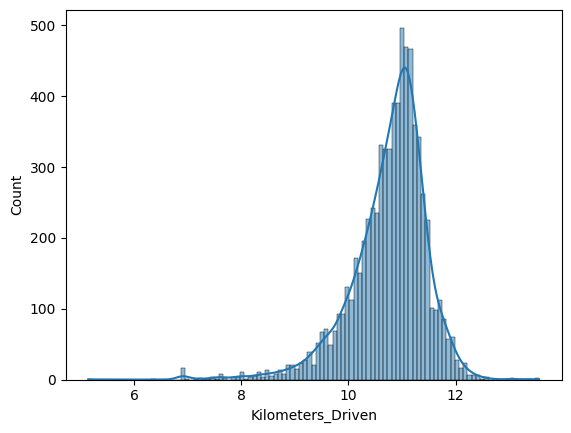

----------------------------------------------------------------------------------------------------


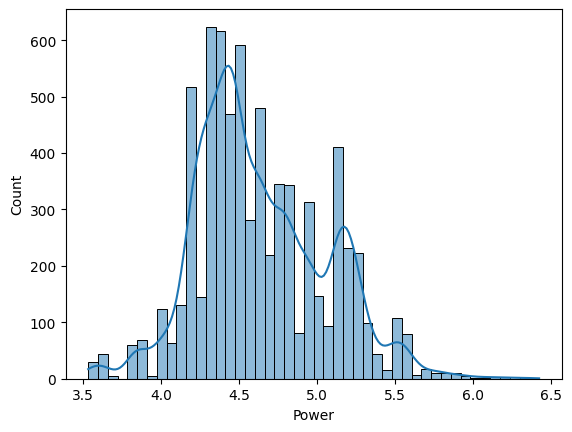

----------------------------------------------------------------------------------------------------


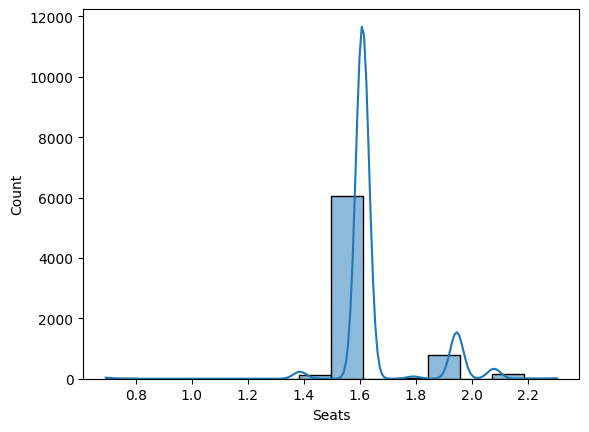

----------------------------------------------------------------------------------------------------


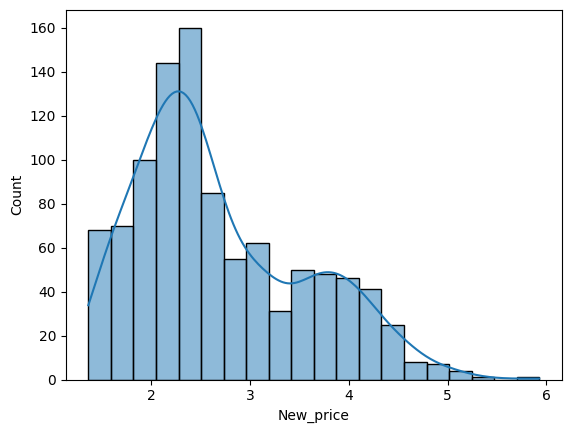

----------------------------------------------------------------------------------------------------


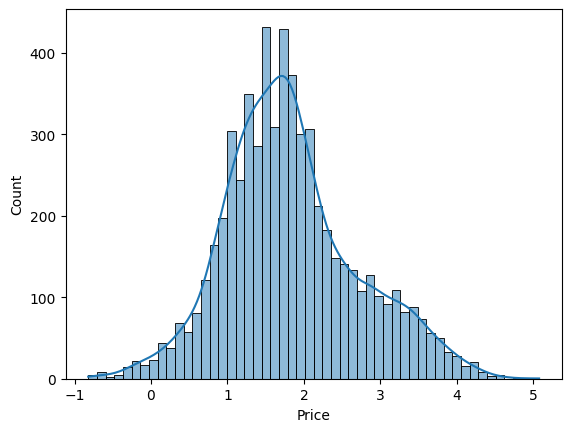

----------------------------------------------------------------------------------------------------


In [48]:
# Look at simple histograms for the log-transformed features
for i in num_log:
  sns.histplot(data=df,x=i,kde=True)
  plt.show()
  print('-'*100)

**Observations**
- The histograms are decidedly less skewed now that we have performed a log transform on the skewed features

In [49]:
# Add the log-transformed variables to the DataFrame
df['km_log']=km_log
df['power_log']=power_log
df['seats_log']=seats_log
df['newprice_log']=newprice_log
df['price_log']=price_log

In [50]:
# Move Price column to end of dataframe for ease in visualisation
movecol = df.pop("Price")
df.insert(len(df.columns), "Price", movecol)
# Check whether the new features have successfully been added
df.head()

Name    Brand    Location  Year  \
0            Maruti Wagon R LXI CNG   Maruti      Mumbai  2010   
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai        Pune  2015   
2                      Honda Jazz V    Honda     Chennai  2011   
3                 Maruti Ertiga VDI   Maruti     Chennai  2012   
4   Audi A4 New 2.0 TDI Multitronic     Audi  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price     km_log  power_log  seats_log  newprice_log  \
0   58.16    5.0        NaN  11.184421   4.063198   1.609438           NaN   
1  126.20    5.0        NaN  10.621327   4.837868   1.609438           NaN   
2   88.70    5.0       8.61  10.736397   4.485260   1.609438      2.152924   
3   88.76    7.0        NaN  11.373663   4.485936   1.945910           NaN   
4  140.80    5.0        NaN  10.613246   4.947340   1.609438           NaN   

   price_log  Price  
0   0.559616   1.75  
1   2.525729  12.50  
2   1.504077   4.50  
3   1.791759   6.00  
4   2.875822  17.74

In [51]:
# Create new dataframe with only the transformed variables
df2=df.copy().drop(columns=['Kilometers_Driven','Power','Seats','New_price'])

In [52]:
# Check the new DataFrame was created correctly
df2.head()

Name    Brand    Location  Year Fuel_Type  \
0            Maruti Wagon R LXI CNG   Maruti      Mumbai  2010       CNG   
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai        Pune  2015    Diesel   
2                      Honda Jazz V    Honda     Chennai  2011    Petrol   
3                 Maruti Ertiga VDI   Maruti     Chennai  2012    Diesel   
4   Audi A4 New 2.0 TDI Multitronic     Audi  Coimbatore  2013    Diesel   

  Transmission Owner_Type  Mileage  Engine     km_log  power_log  seats_log  \
0       Manual      First    26.60   998.0  11.184421   4.063198   1.609438   
1       Manual      First    19.67  1582.0  10.621327   4.837868   1.609438   
2       Manual      First    18.20  1199.0  10.736397   4.485260   1.609438   
3       Manual      First    20.77  1248.0  11.373663   4.485936   1.945910   
4    Automatic     Second    15.20  1968.0  10.613246   4.947340   1.609438   

   newprice_log  price_log  Price  
0           NaN   0.559616   1.75  
1           NaN   2.525729  12.50  
2      2.152924   1.504077   4.50  
3           NaN   1.791759   6.00  
4           NaN   2.875822  17.74

**Observations**
- We have performed a log transformation on the variables that had high skew
- We created a new dataframe, df2, replacing the original variables with their transformed selves. We will be using df2 henceforth

### **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

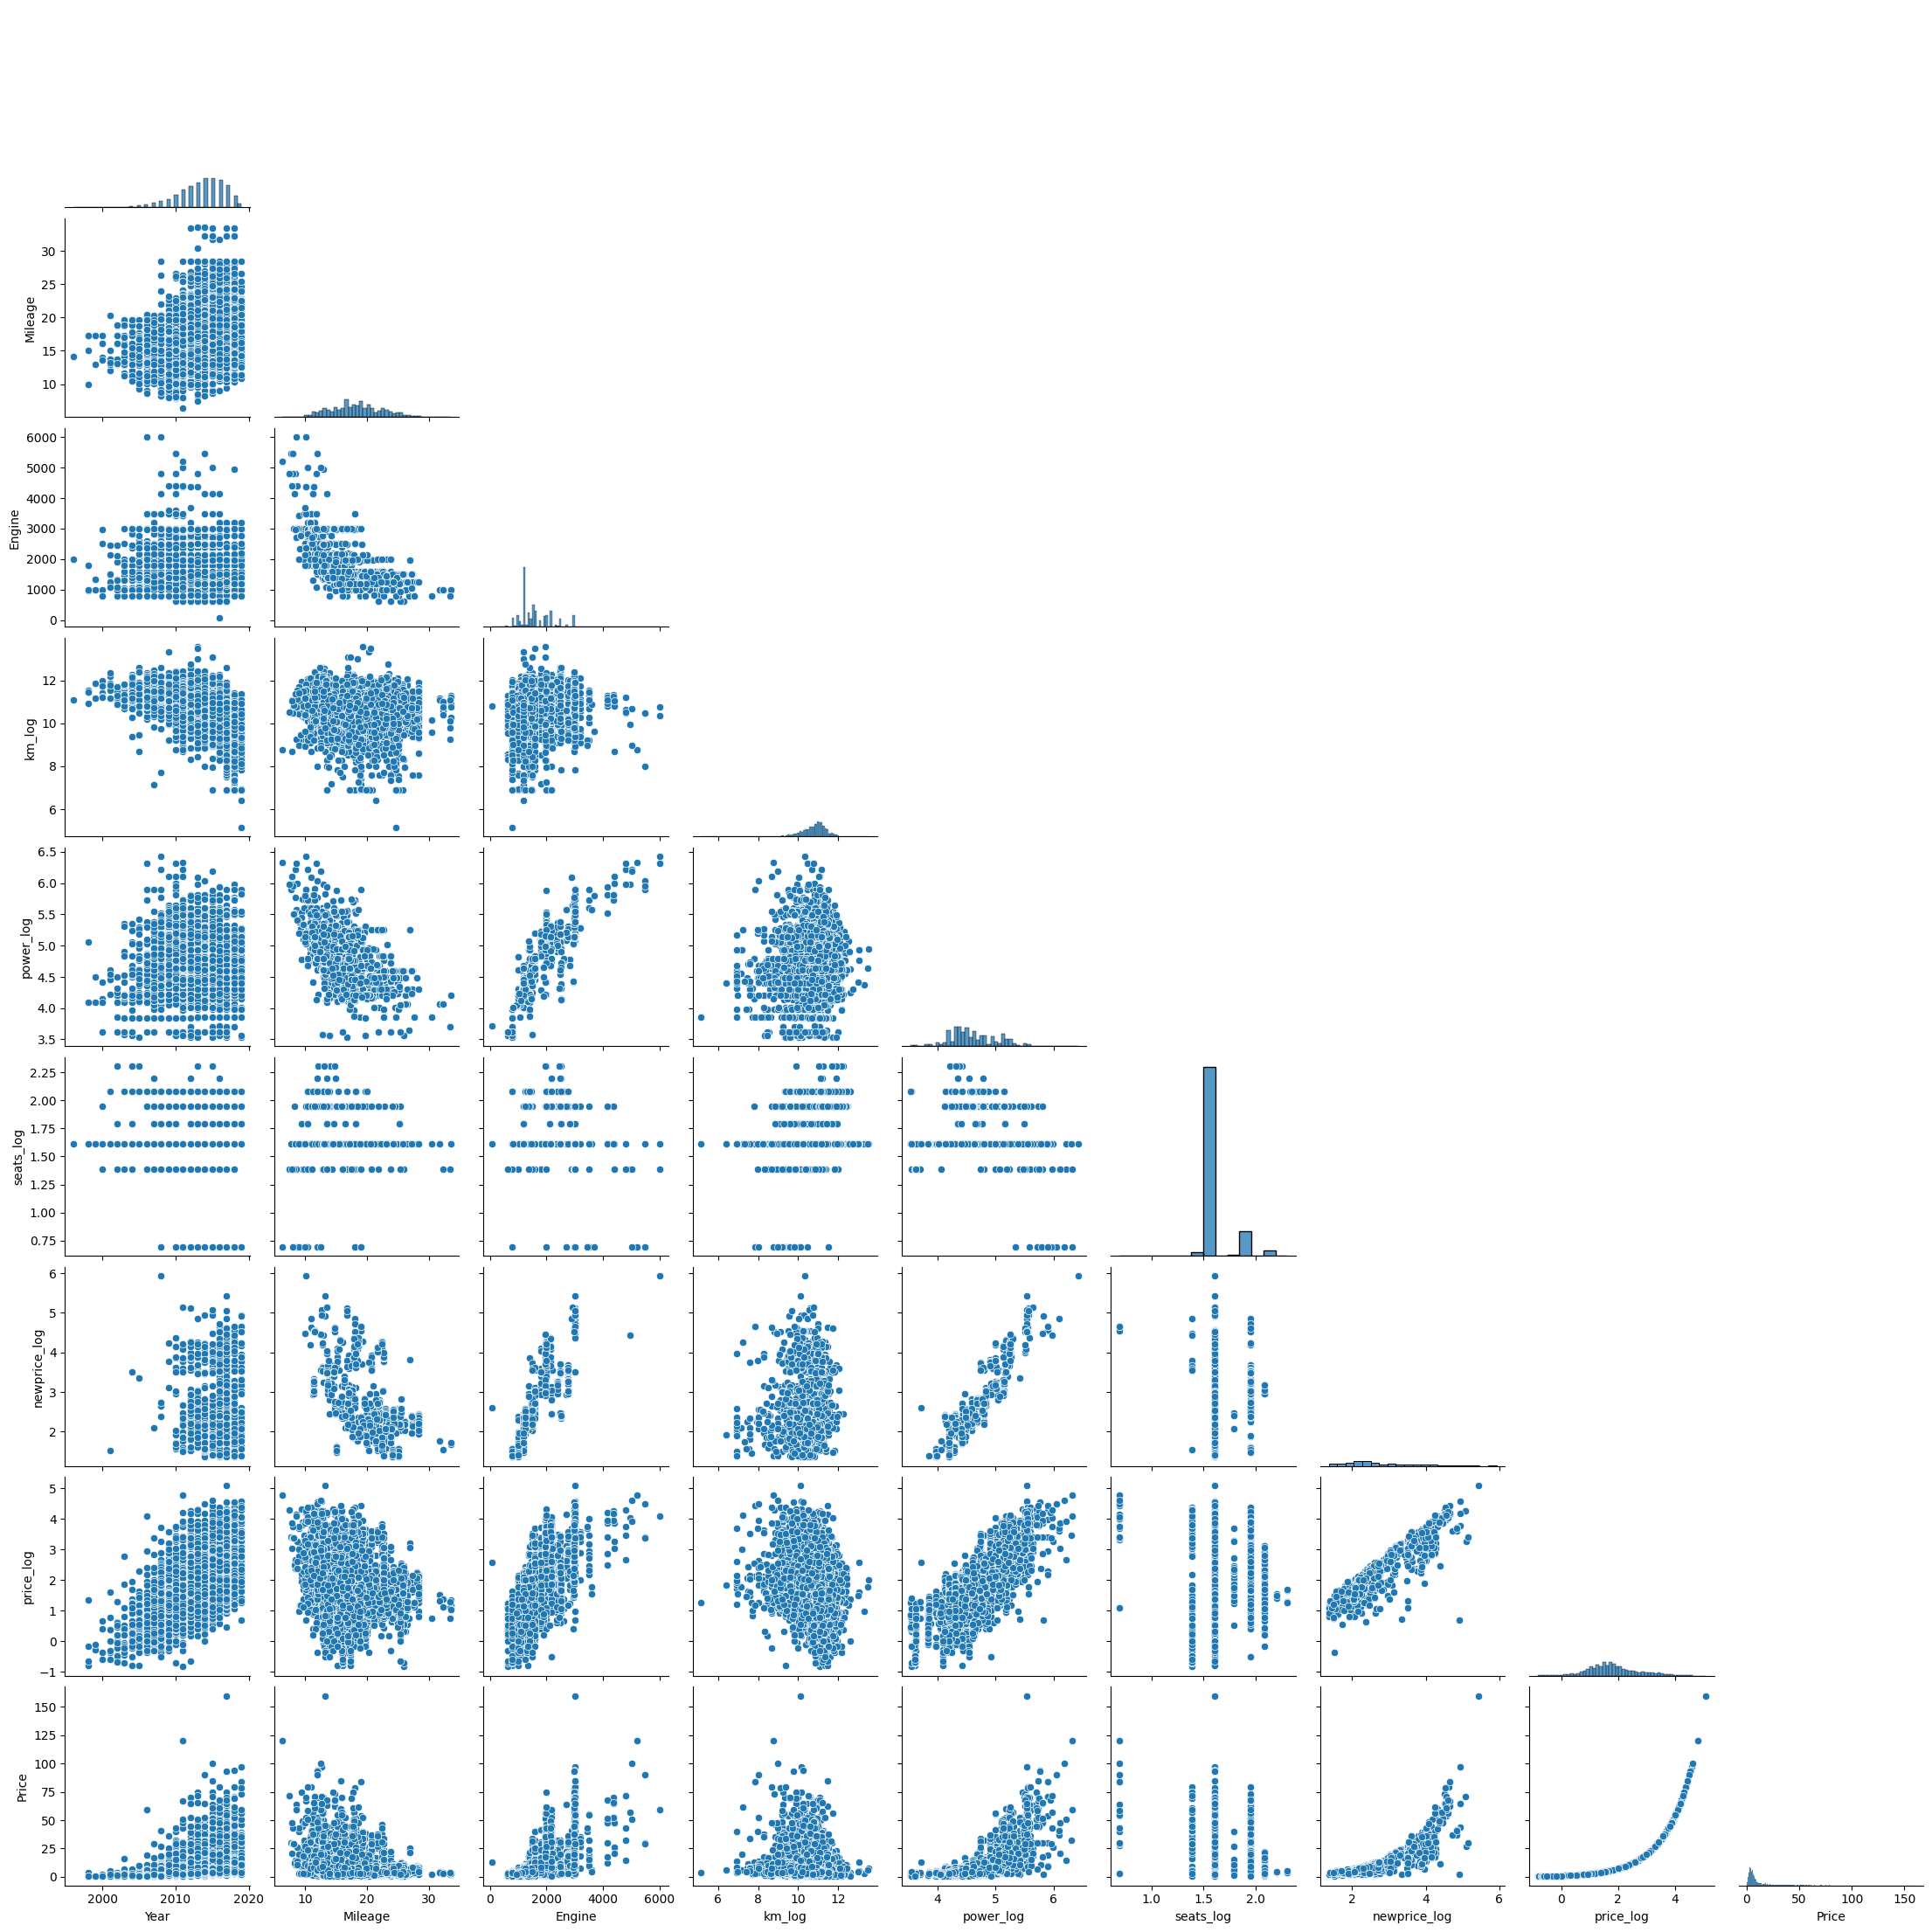

In [53]:
# Plot pair-wise scatter plots for the features in df2
sns.pairplot(data=df2,dropna=True,corner=True)

**Observations for plots with price(log)**
- Year seems very positive
- Mileage is negative, but not too strongly
- Engine seems very positive
- km_log has little to no correlation
- power_log big positive
- seats no correlation
- newprice big positive correlation (as expected)
- To note as well": The correlations with price are mostly non-linear, whereas the relationships with price_log seem much more linear, as we want

**Let's see how this compares to the heatmap!**

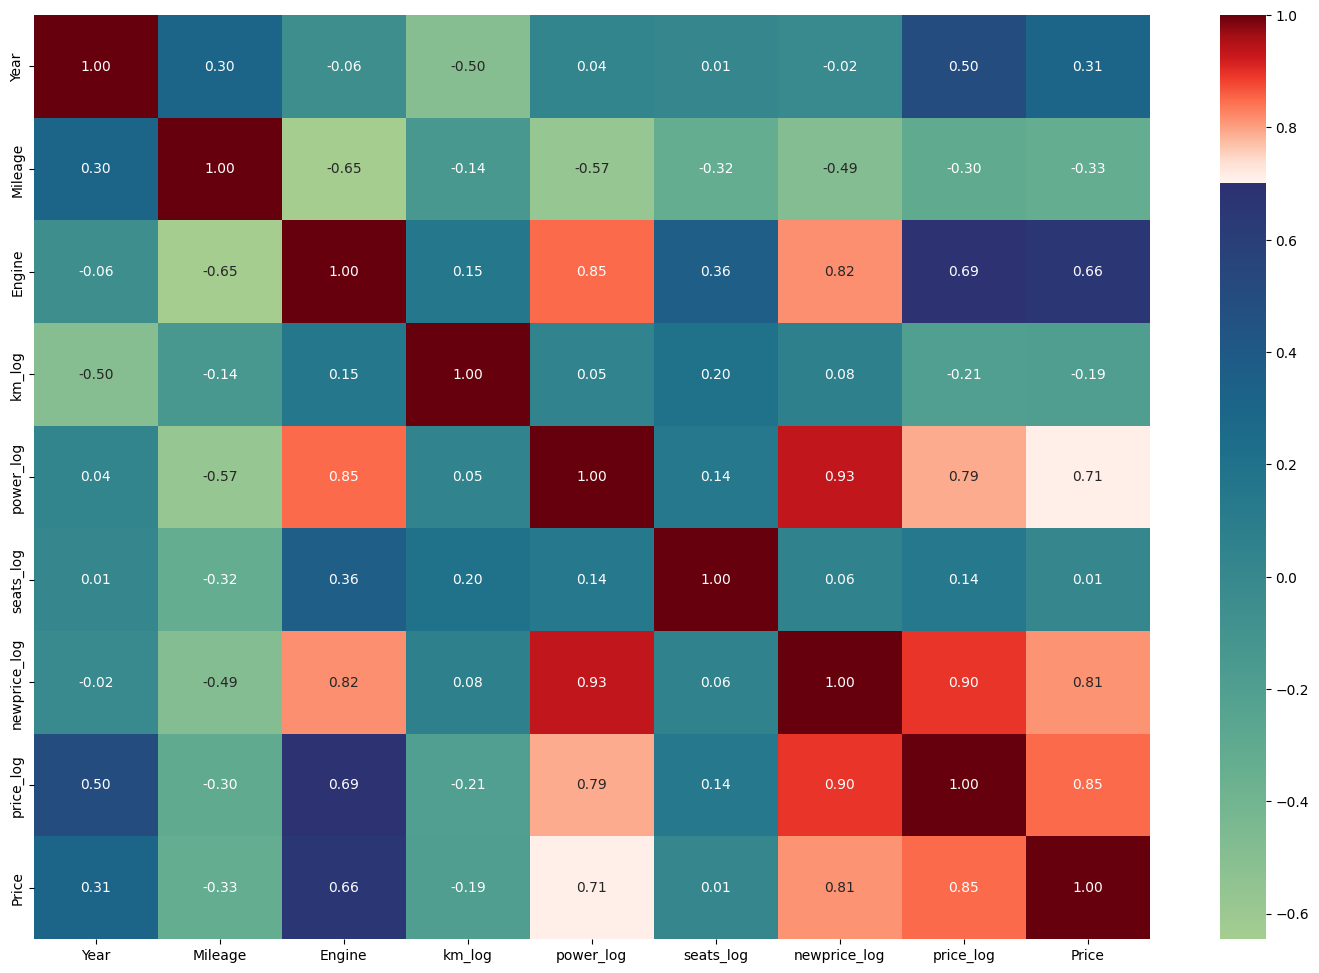

In [54]:
# Import colormap libraries
from matplotlib import colormaps as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Concatenate a colormap with a more vibrant one to make correlations above 0.7 stand out more
cmap1= cm['crest'].resampled(1000)
cmap2= cm['Reds'].resampled(1000)

stacked_colors = np.vstack((cmap1(np.linspace(0, 1, 4500)),
                       cmap2(np.linspace(0, 1, 1000))))
custom_cmap = ListedColormap(stacked_colors)

plt.figure(figsize = (18, 12))

sns.heatmap(df2.corr(numeric_only = True), annot = True, fmt = '0.2f', cmap=custom_cmap)

plt.show()

**Observations**

The data here mirrors our pairplot:

**Dependent variable**
- Price(log) has high correlations with log(New_Price), power(log), and engine, with the highest being New_price(log) at 0.90! It is also moderaly correlated with Year, although not significantly so. All these correlations are positive.

**Independent variables**
- New_price(log) is highly correlated with power(log) and engine - more so than price(log) is. The correlation between New_price(log) and power(log) is the strongest between any two variables. These positive correlations make sense as you would expect a car with more engine displacement (hence a bigger engine) and a higher horsepower output would be more expensive
- Seat number doesn't have any significant correlations
- Something important to note is the high correlation between engine displacement and power(log), which, alongside the correlation with New_price(log), implies there is strong multicollinearity in our data. We will have to address this when building our models
- There are some interesting mild negative correlations between Km driven(log) & Year of manufacture, mileage & power(log), and mileage & engine

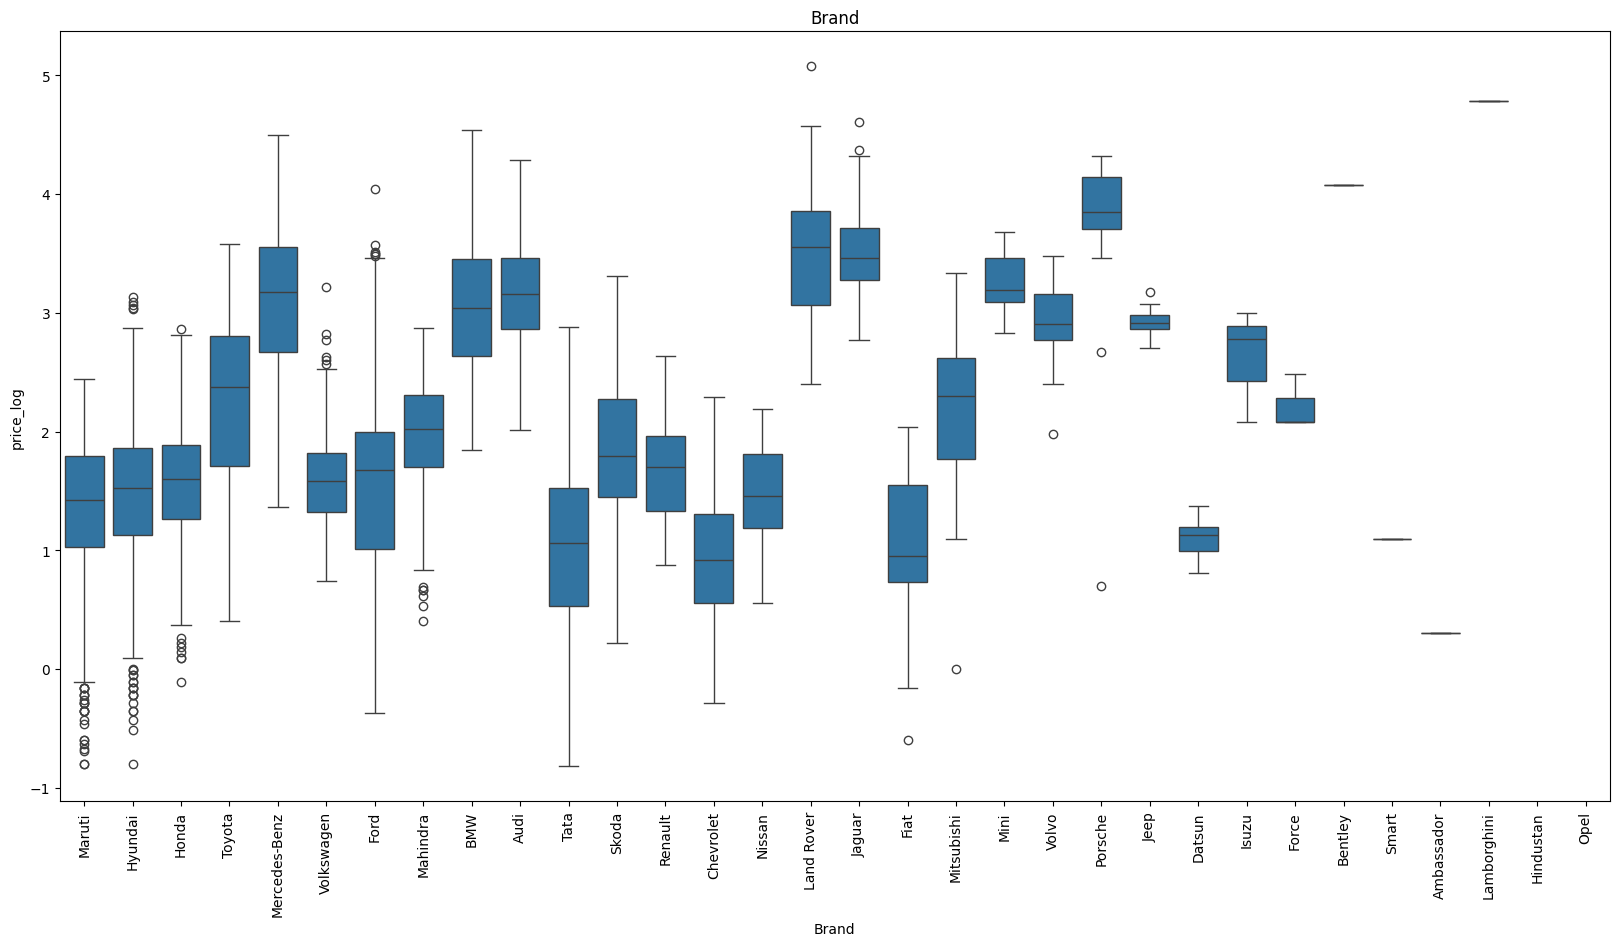

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


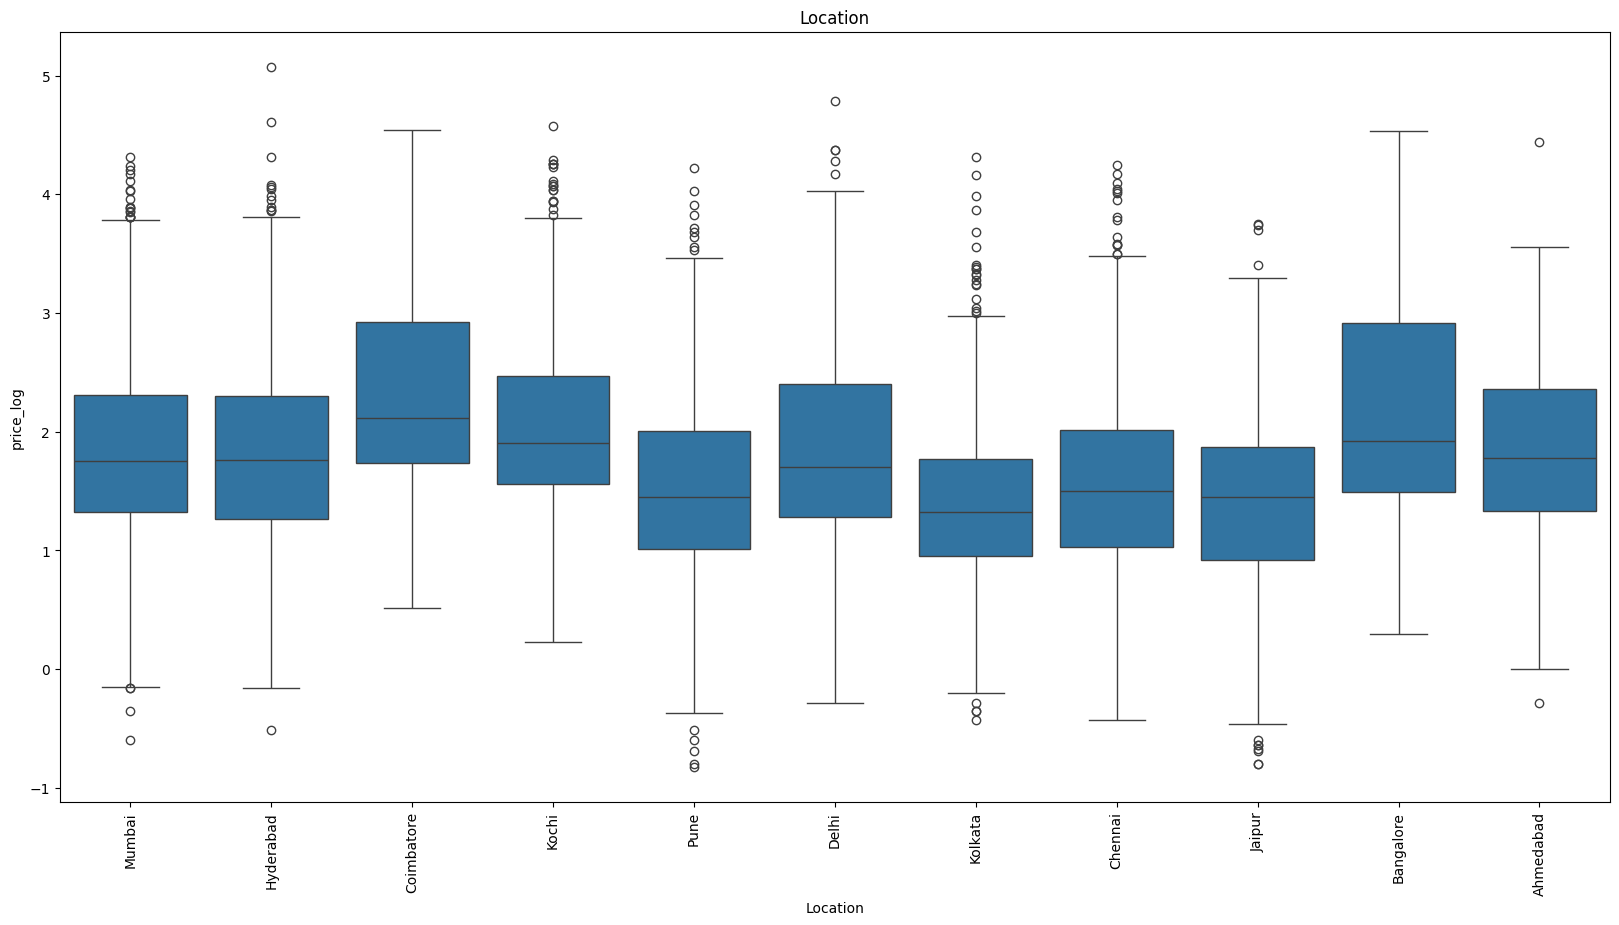

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


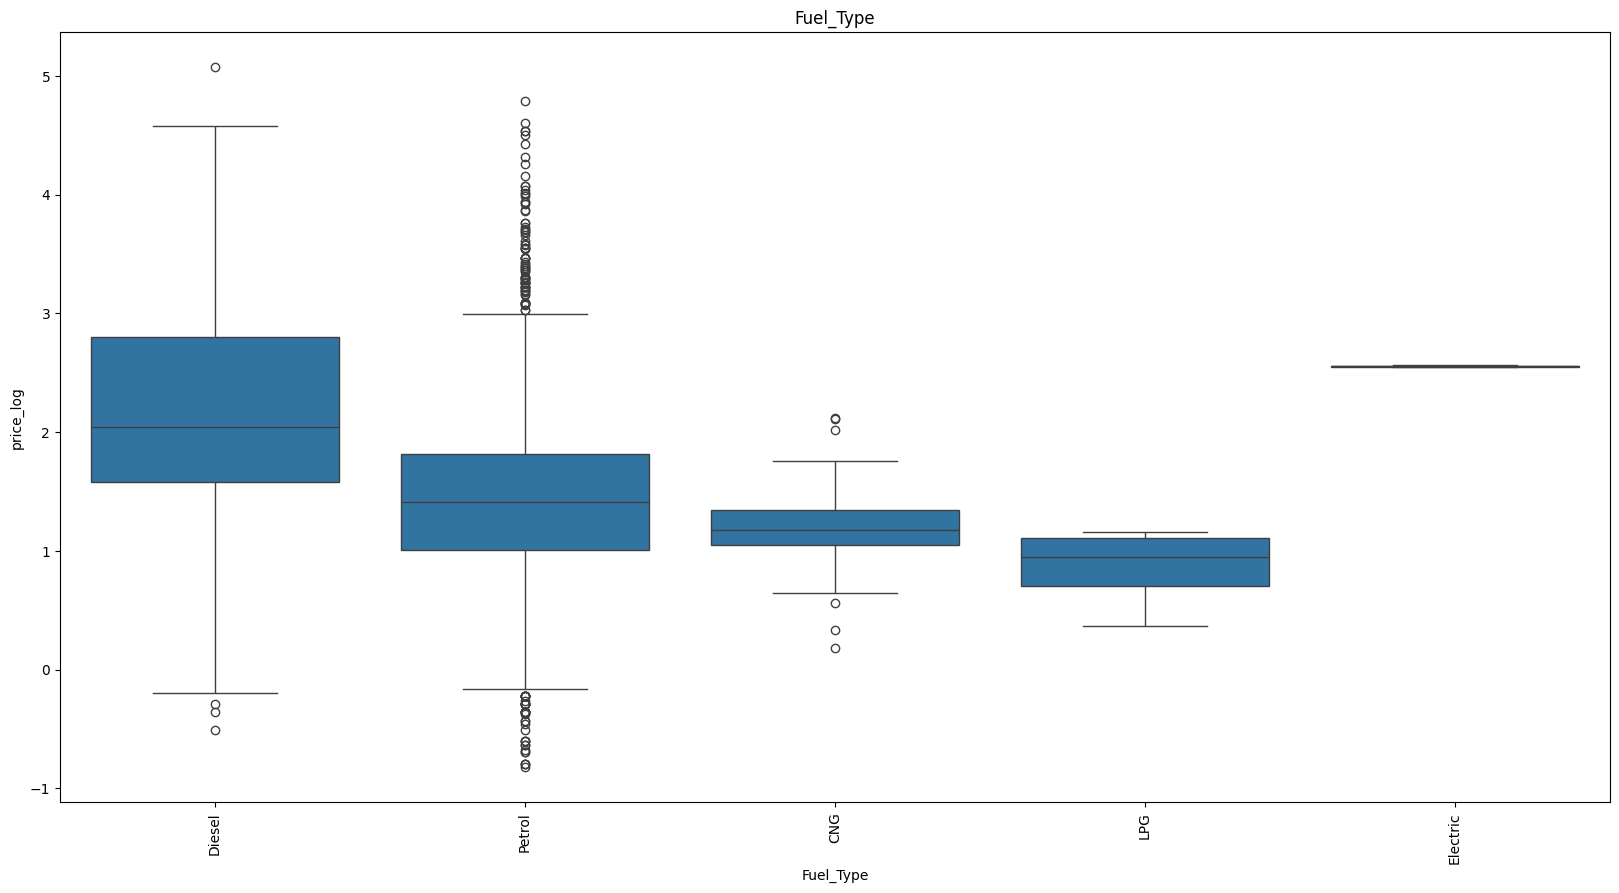

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


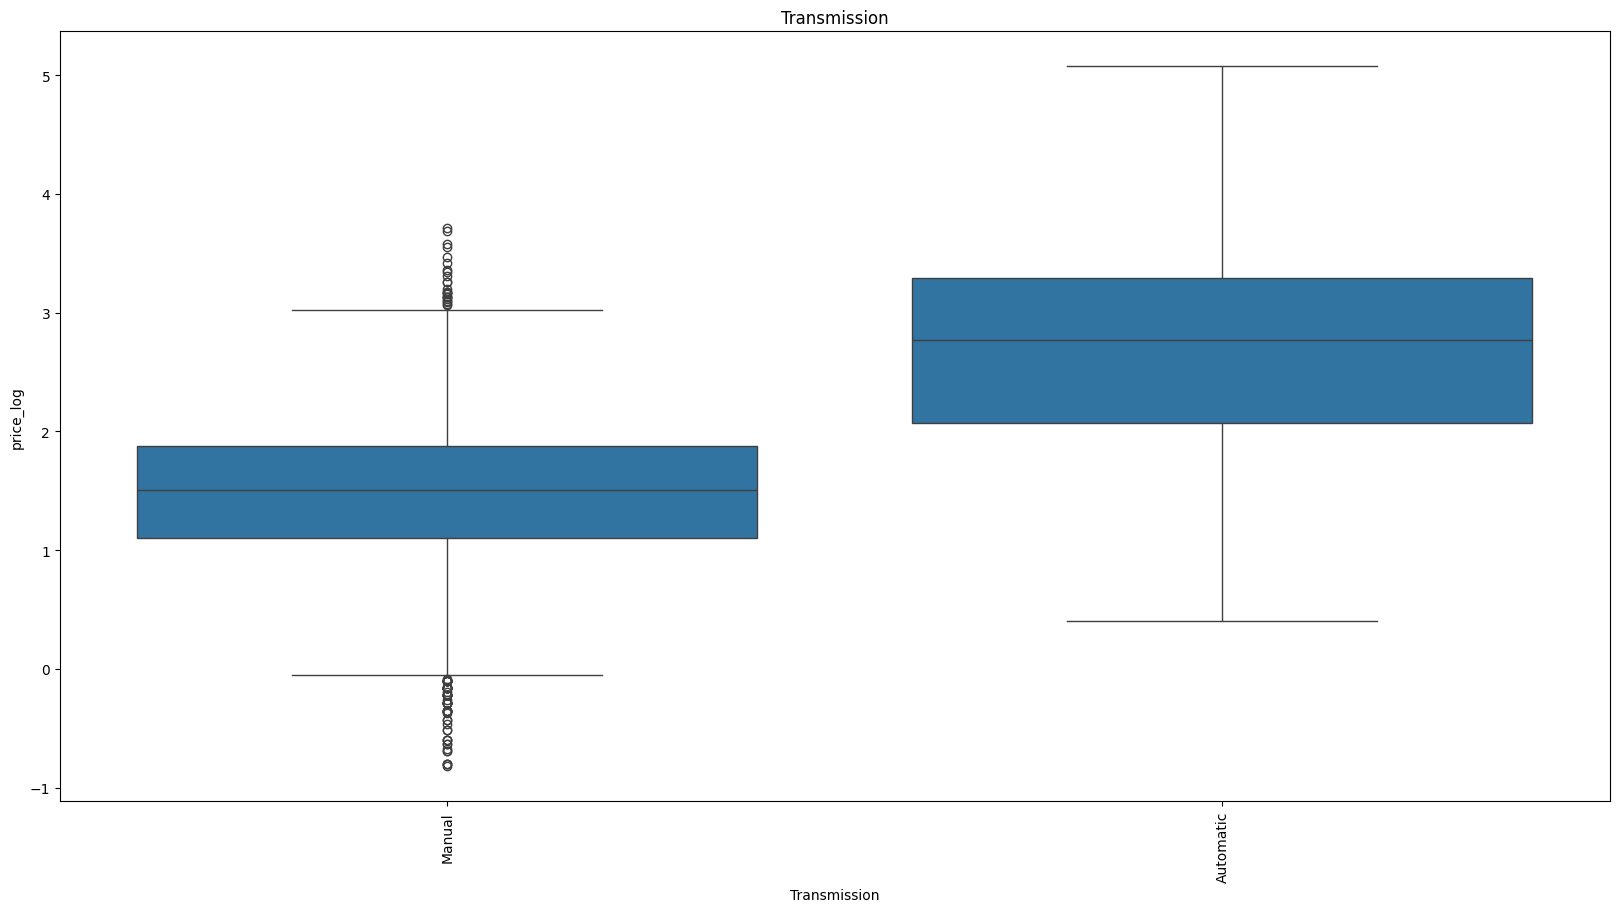

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


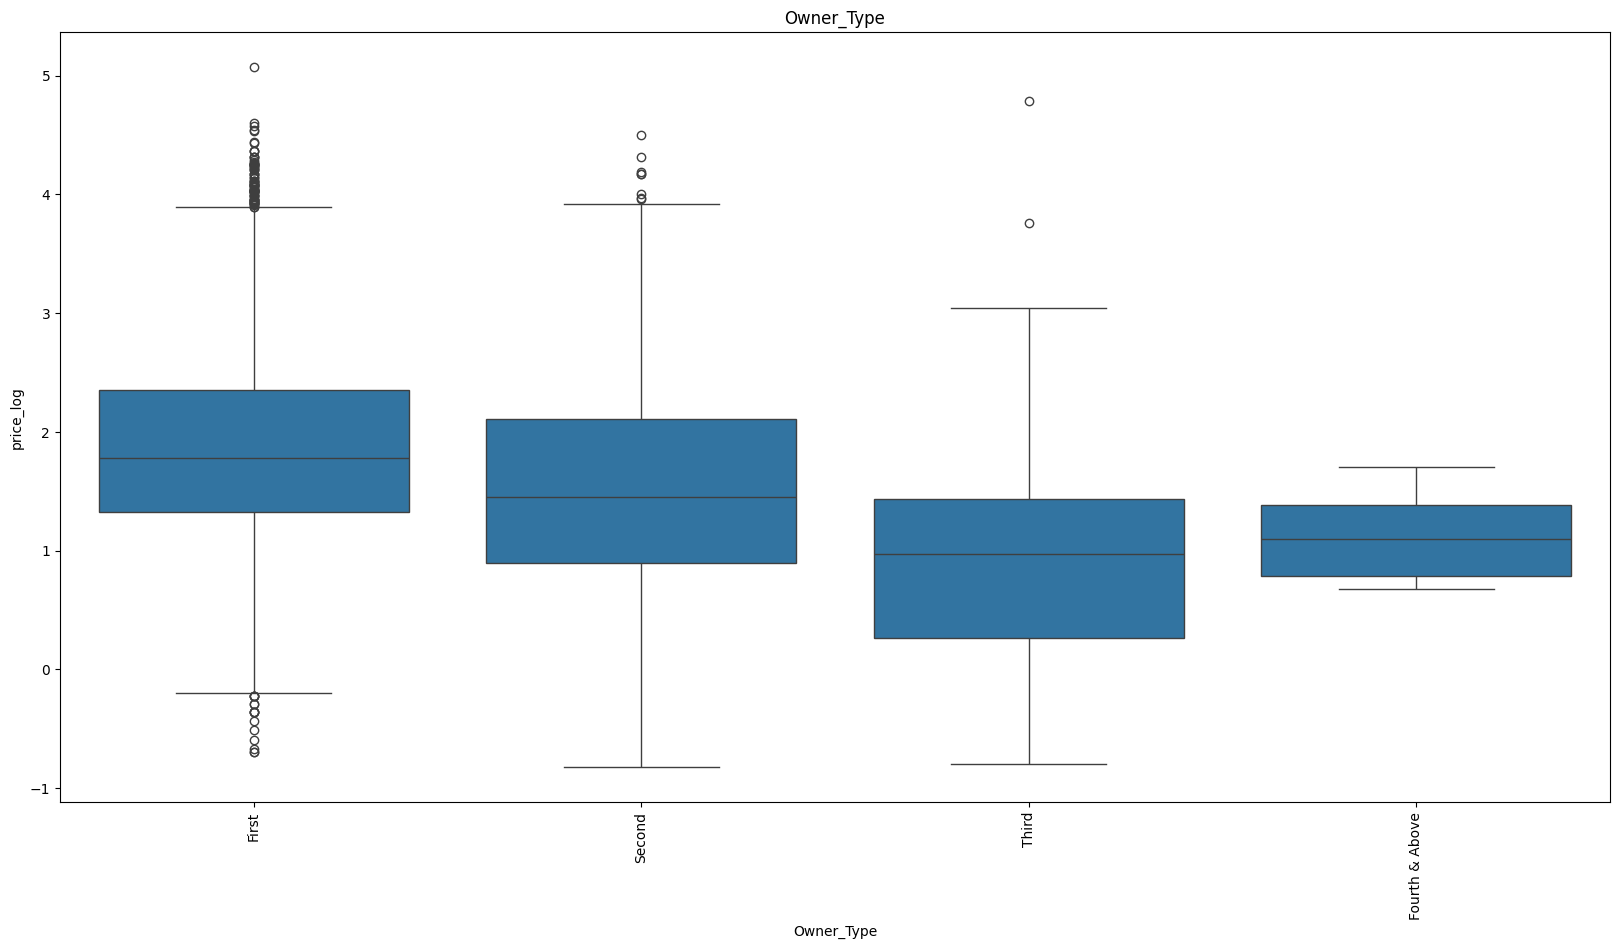

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


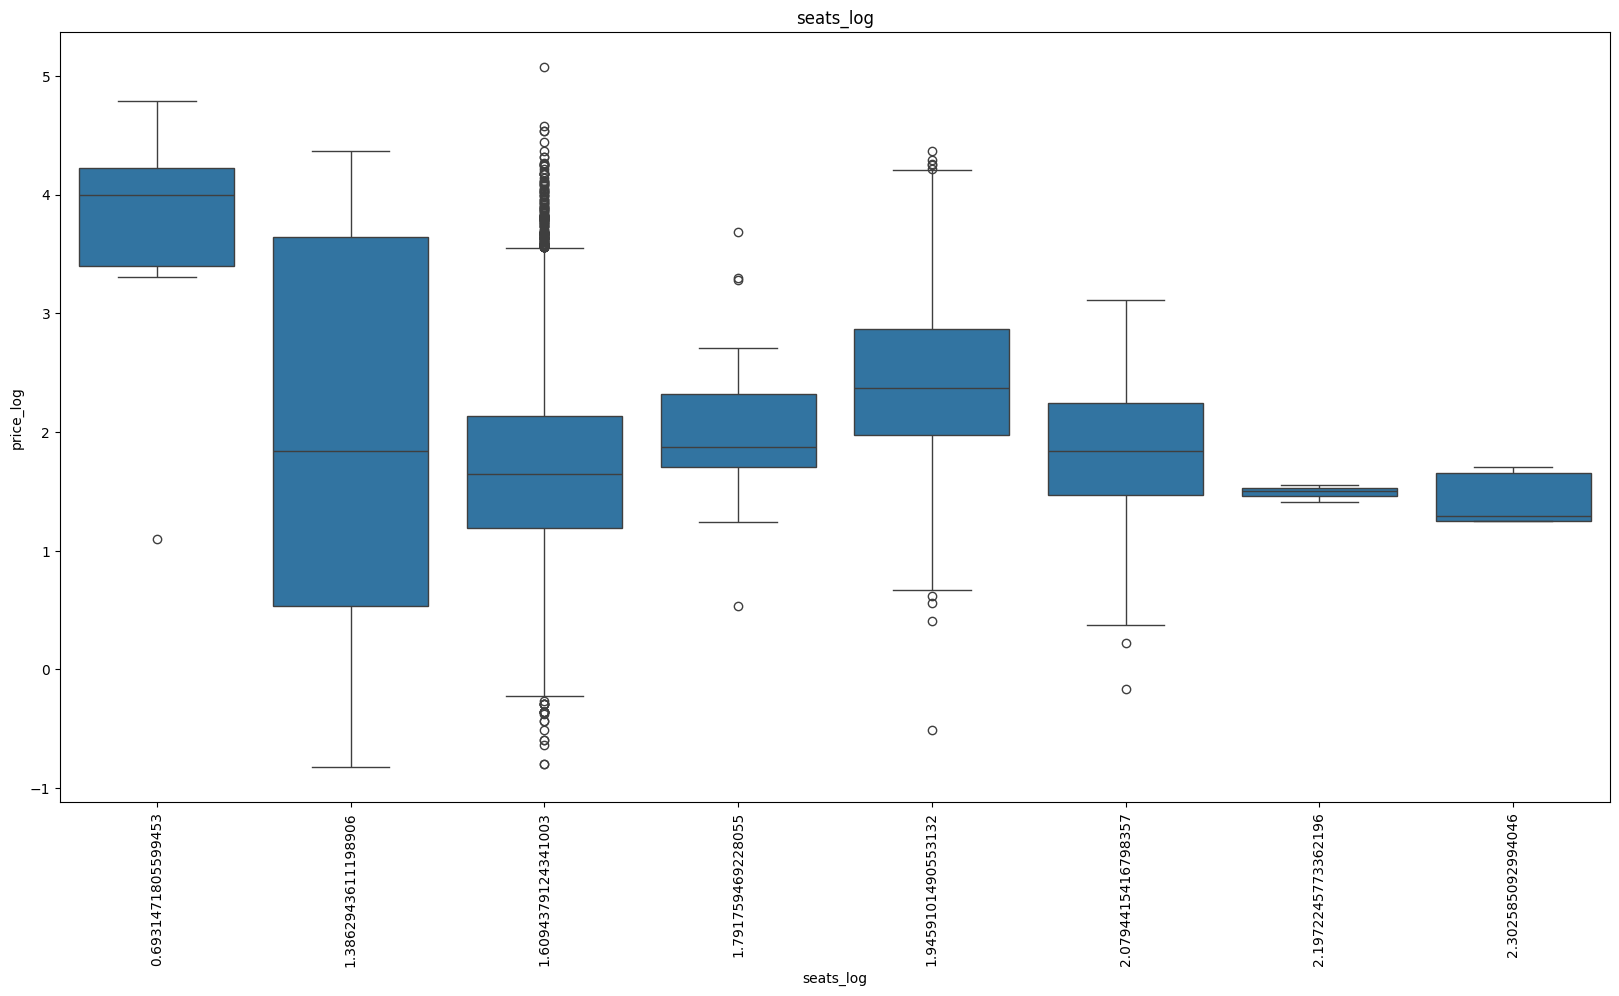

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [55]:
# Check boxplots between price(log) and categorical variables (except Name and adding Seats No.)
cat2=df2.select_dtypes(include='object').columns.to_list()
cat2.append('seats_log')
cat2.remove('Name')

for i in cat2:
  if i=='seats_log':
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.title(i)
    sns.boxplot(data=df2,x=i,y='price_log',order=df2[i].value_counts().sort_index().index)
    plt.show()
    print('-'*250)
  else:
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.title(i)
    sns.boxplot(data=df2,x=i,y='price_log',order=df2[i].value_counts().index)
    plt.show()
    print('-'*250)

**Observations**

Many of the categorical variables seem to be skewed heavily to one or a few values. This may indicate a relative uniform market for those features
- **Brand:** About half the car brands have less than a 1% share of the pre-owned car market. Since we have 32 car brands, an equal market share between all of them would be 3.125%. We see 21 brands have a lower share of the market than this. We also see that over 50% of the market is shared between only three car brands: Maruti Suzuki, Hyundai, and Honda
- **Location:** The distribution for location is more uniform than for brand, with only about one third of the locations having less than 1/11th of the market share. As seen earlier, Ahmedabad sees significantly fewer sales than other locations. It may be interesting to compare car brands and location
- **Fuel Type:** As seen earlier, this feature is dominated by Diesel and Petrol, with the remaining fuel types only adding up to just above 1%. It will be interesting to see how these affect prices. It may also be good to look at the manufacture year for cars with these fuel types.
- **Transmission:** There is about a 5:2 ratio between manual:automatic cars
- **Owner Type:** The vast majority of cars sold had only one previous owner. We can look at how this distribution differs between the other features
- **No. seats:** The number of seats is heavily skewed towards 5 at 84% market share, with the next highest being 7 seats at 11%
- **Car names & models:** We see an exponential decrease in car name counts. Out of the top 5 car models, 3 are Maruti Suzuki, and 1 Honda. Surprisingly, the most sold car is a Mahindra, which only has a 4.6% market share. We can also see that the vast majority of car models appear only once in our data (at 862 distinct models), and 409 appear twice. This means that over half of our 2041 disinct car models appear only once or twice in our data. This makes predictions based on specific car models/names quite difficult, and we may end up dropping the 'Name' column in favour of 'Brand' from our data because of it unless we aggregate the data from the 'Name' column some other way. This is reinforced by seeing that only 13 unique car models appear 30 or more times in our data - not nearly enough to make any useful conclusions about trends and predictions in prices based off the 'Name' column

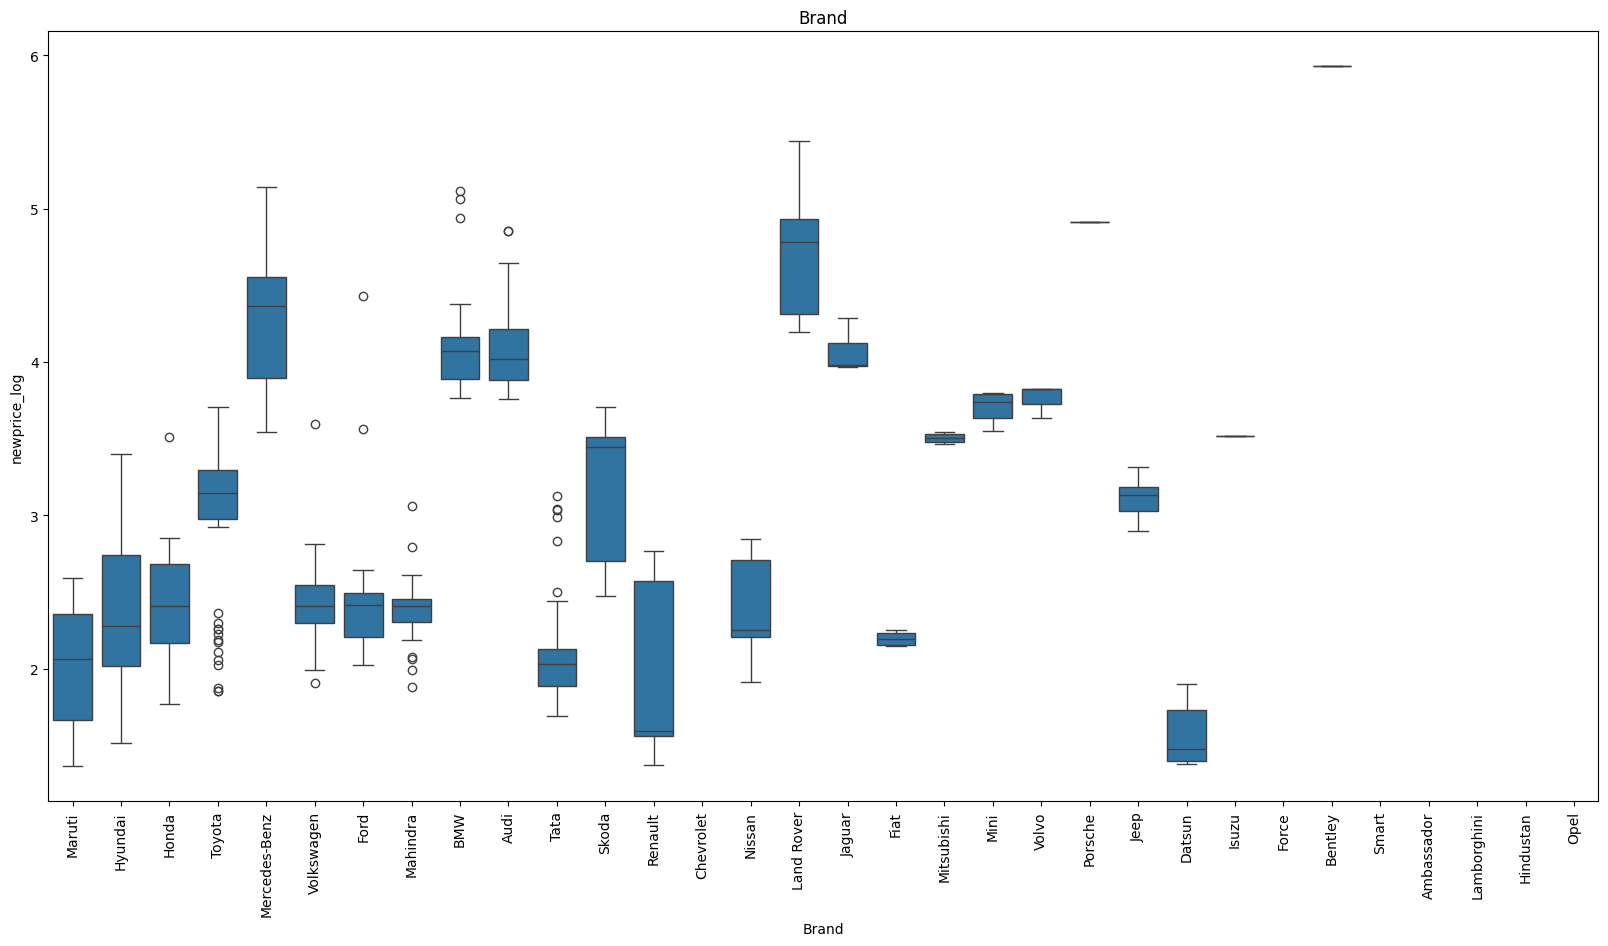

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


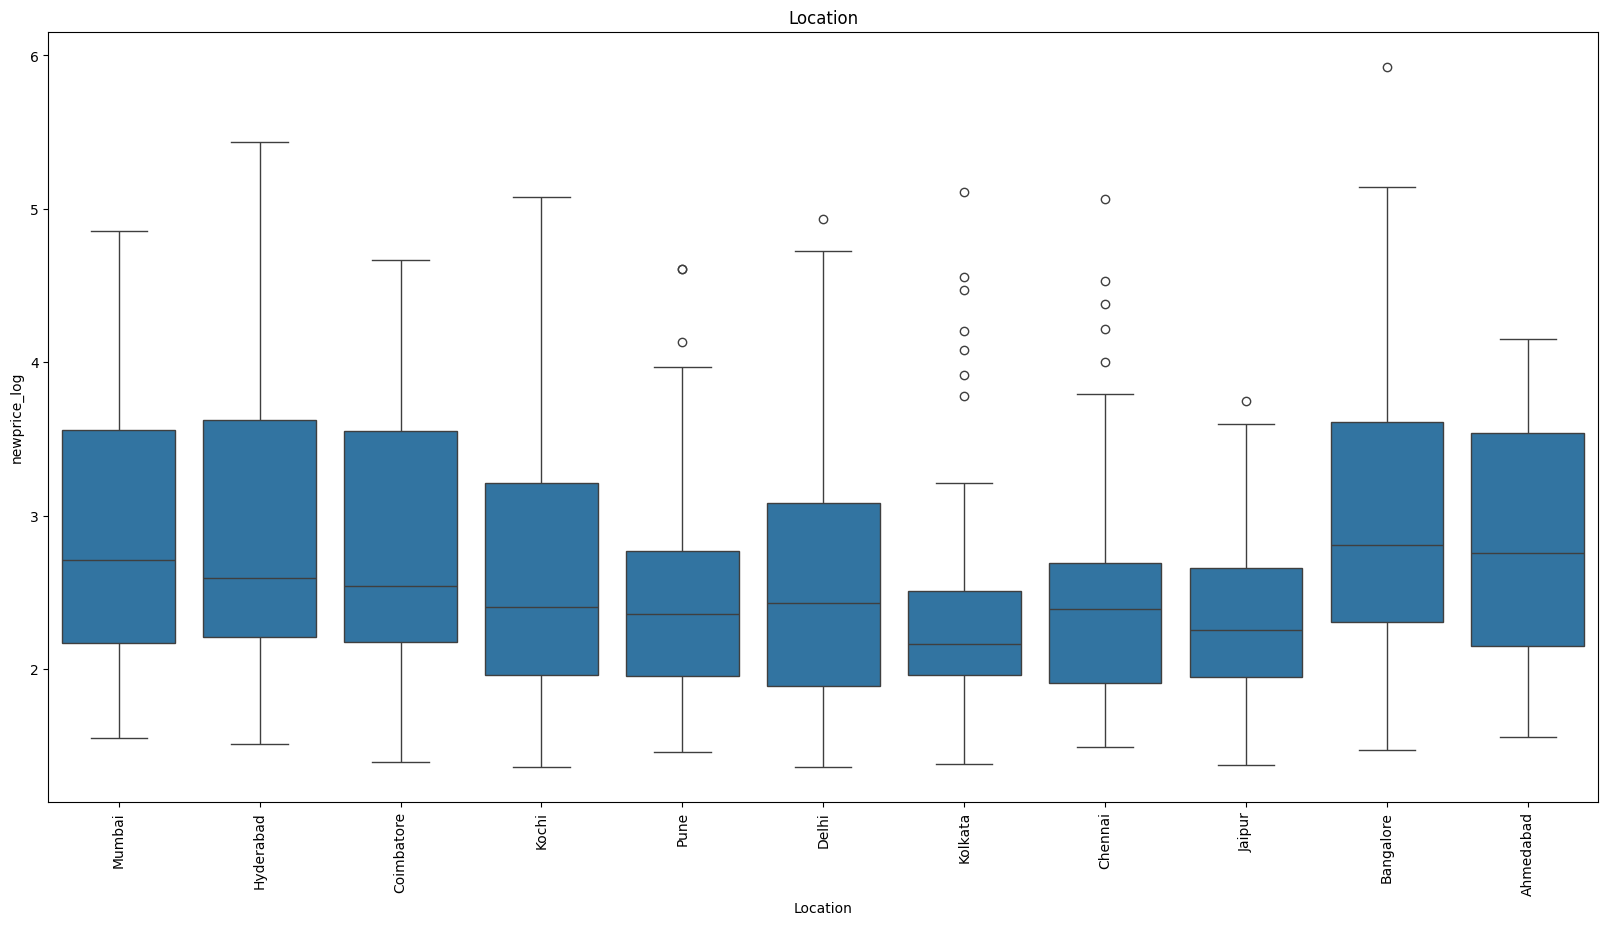

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


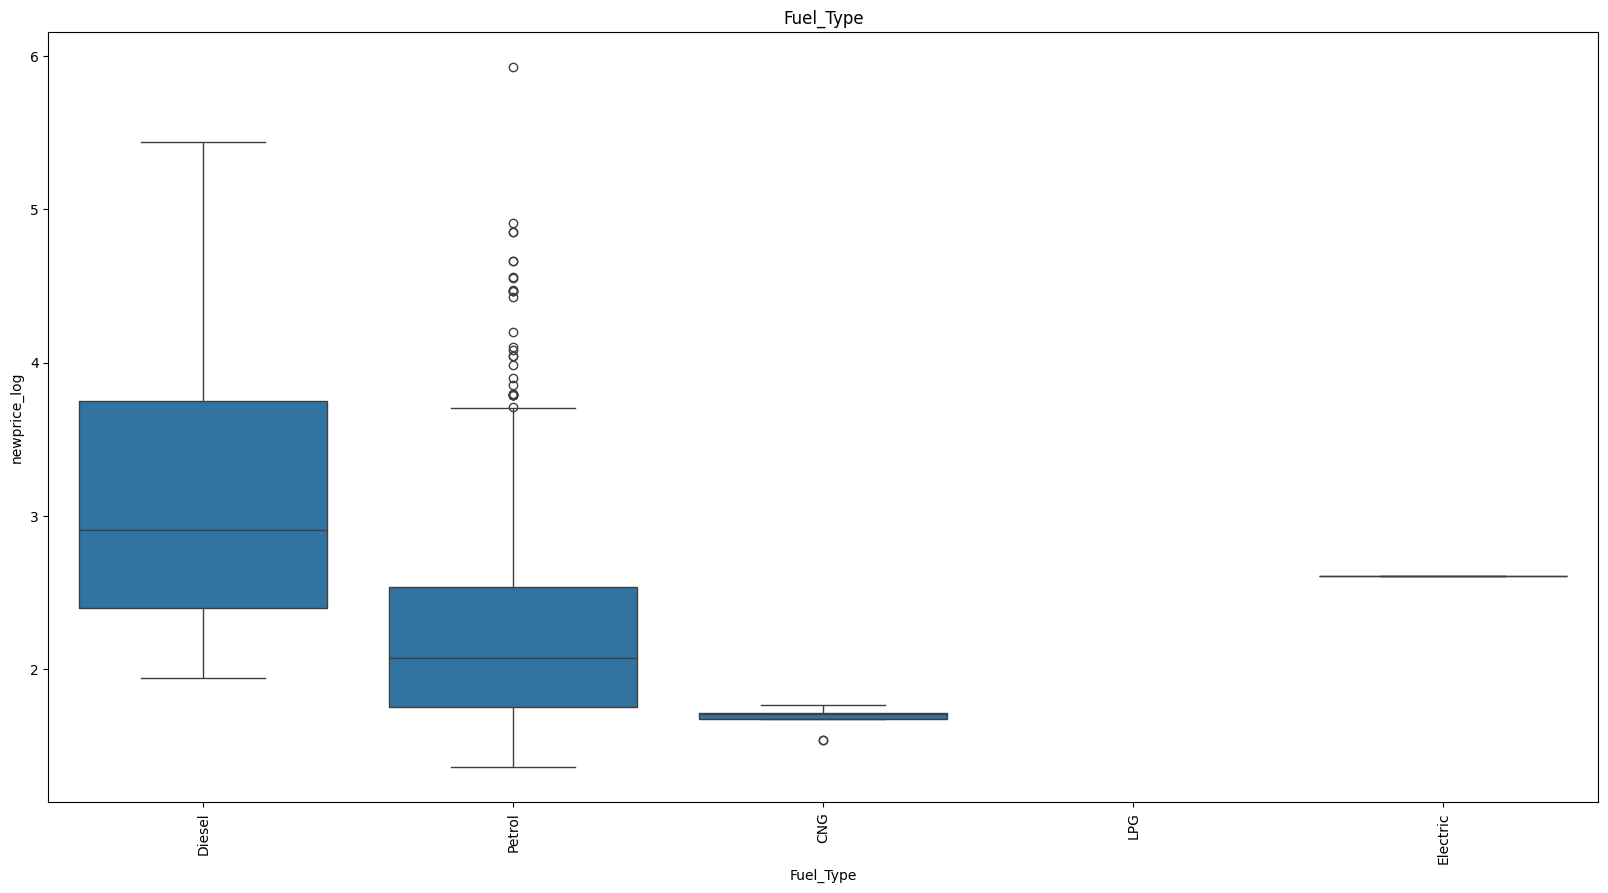

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


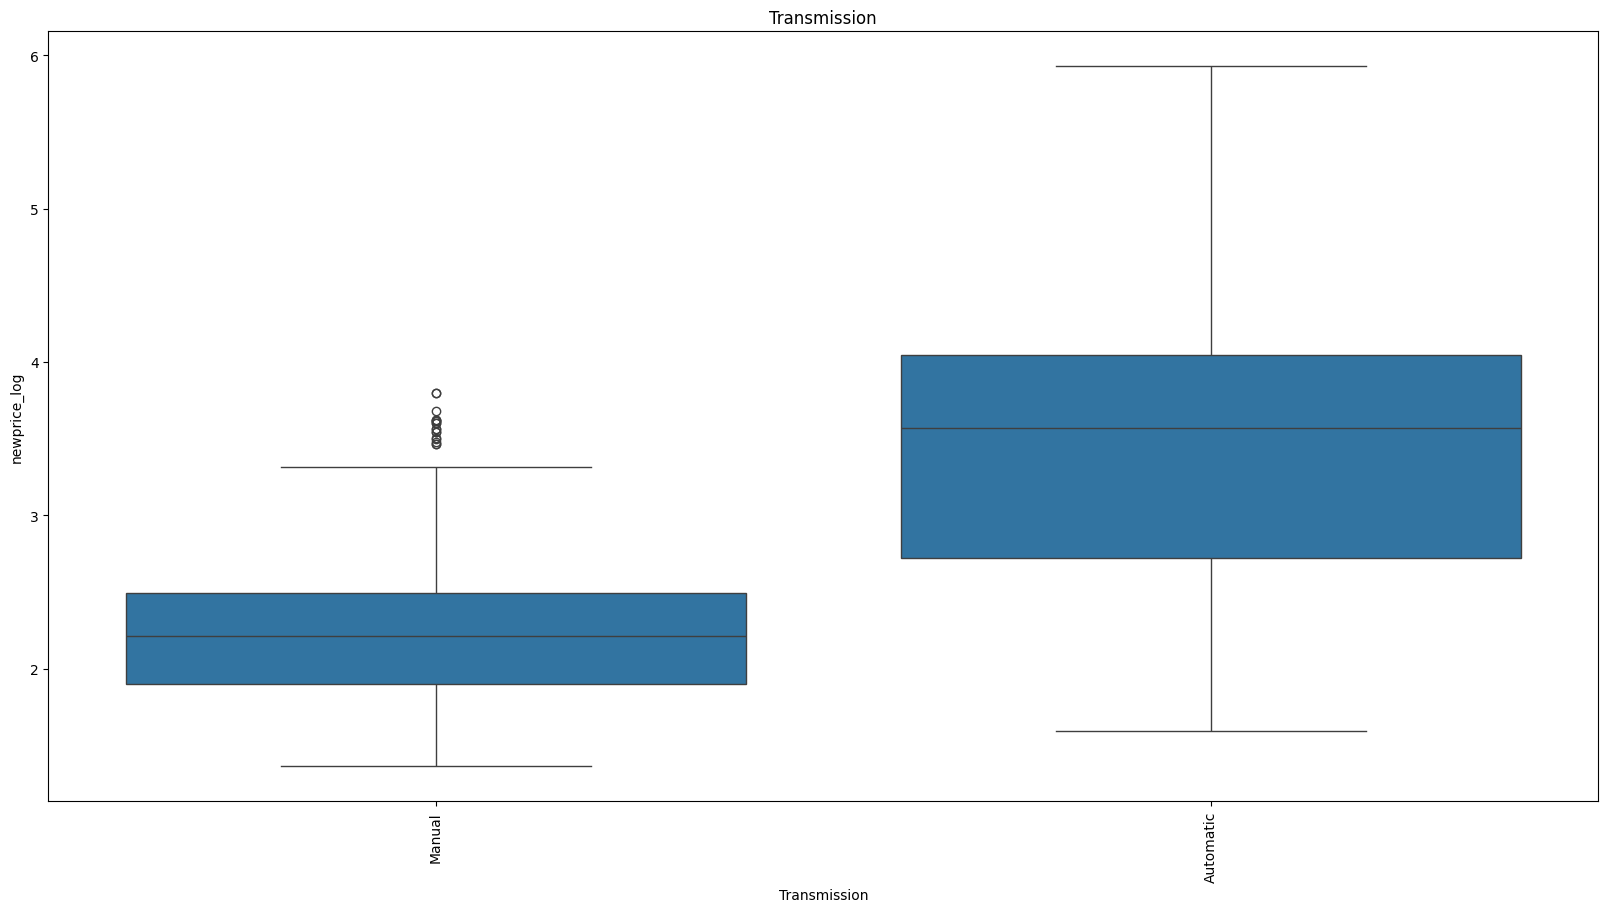

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


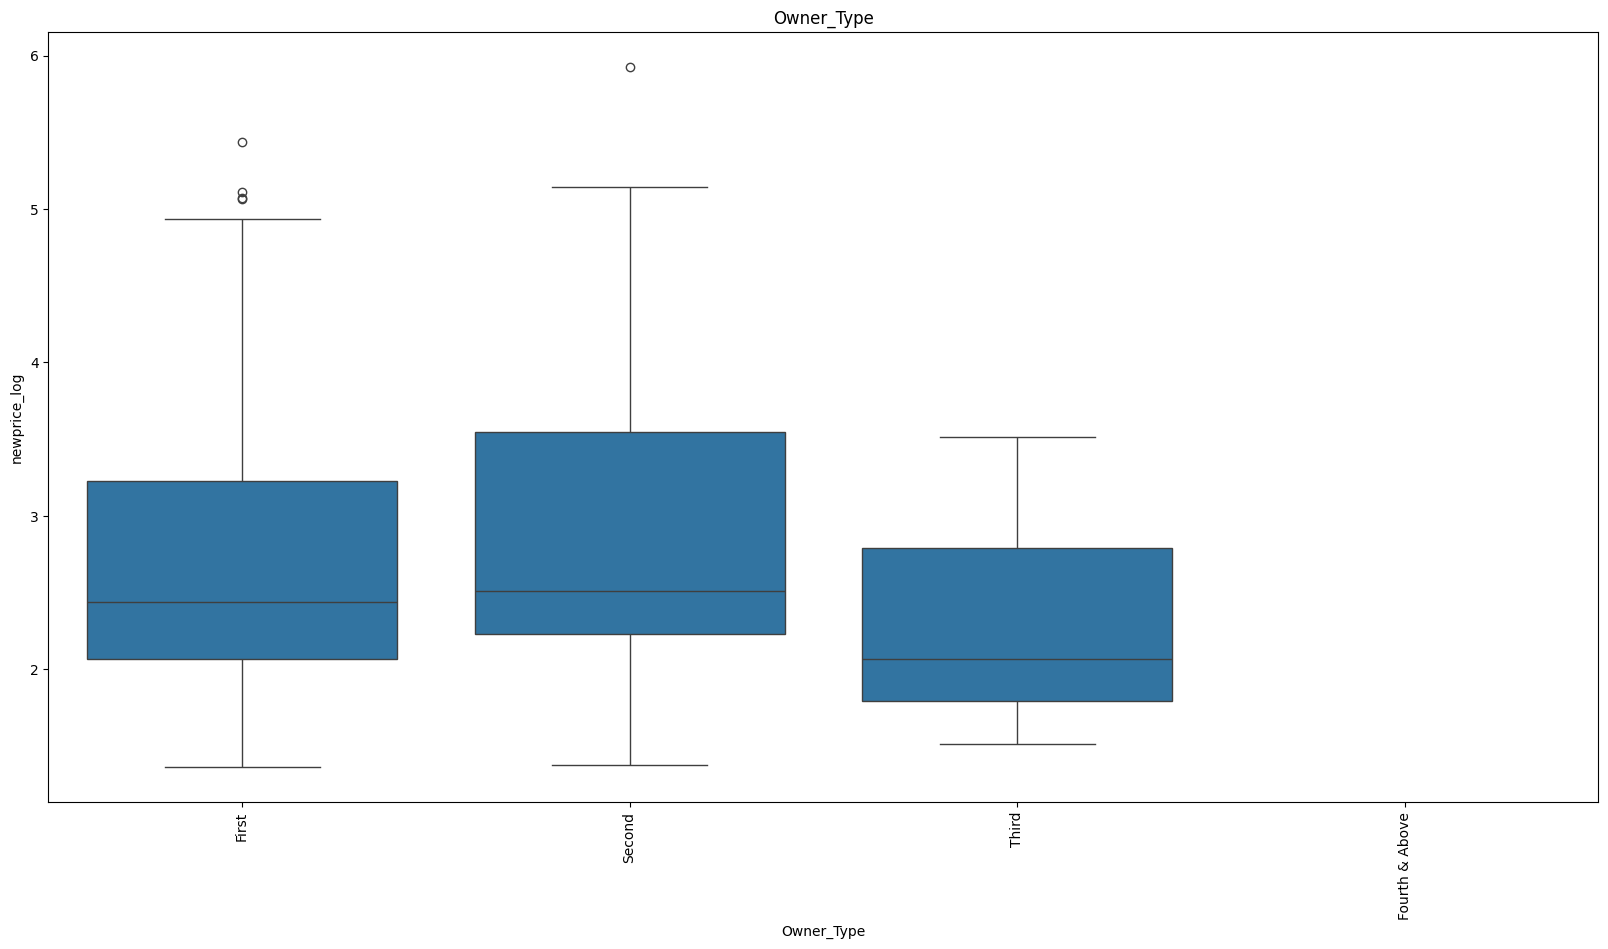

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


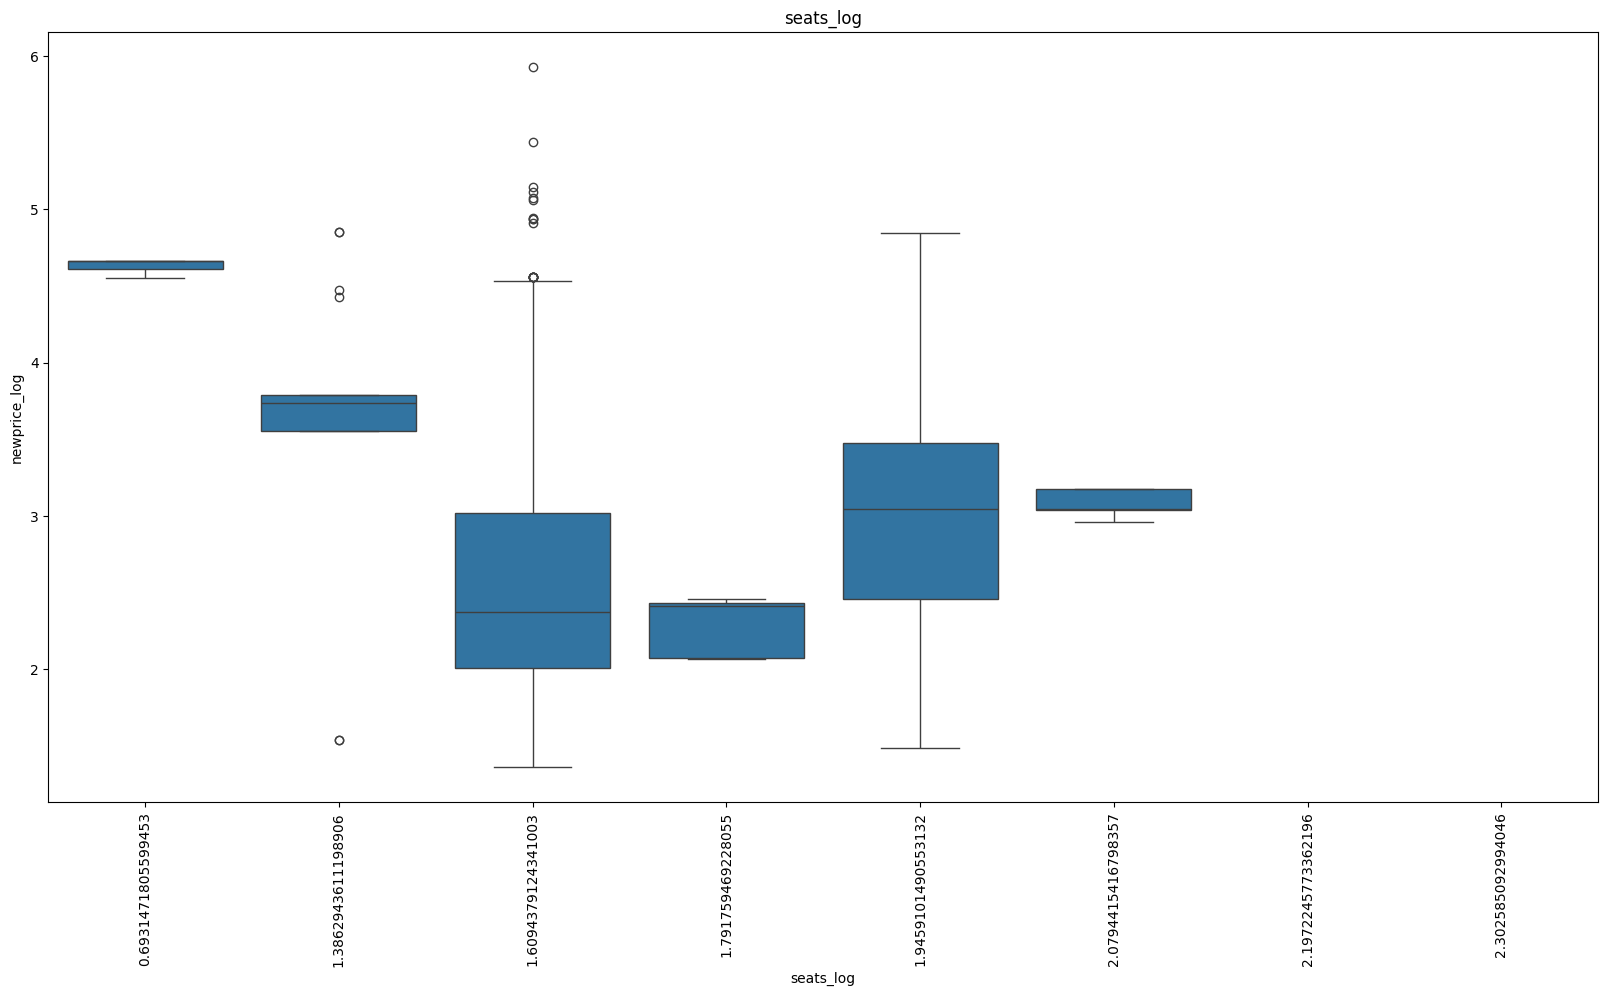

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [56]:
for i in cat2:
  if i=='seats_log':
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.title(i)
    sns.boxplot(data=df2,x=i,y='newprice_log',order=df2[i].value_counts().sort_index().index)
    plt.show()
    print('-'*250)
  else:
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.title(i)
    sns.boxplot(data=df2,x=i,y='newprice_log',order=df2[i].value_counts().index)
    plt.show()
    print('-'*250)

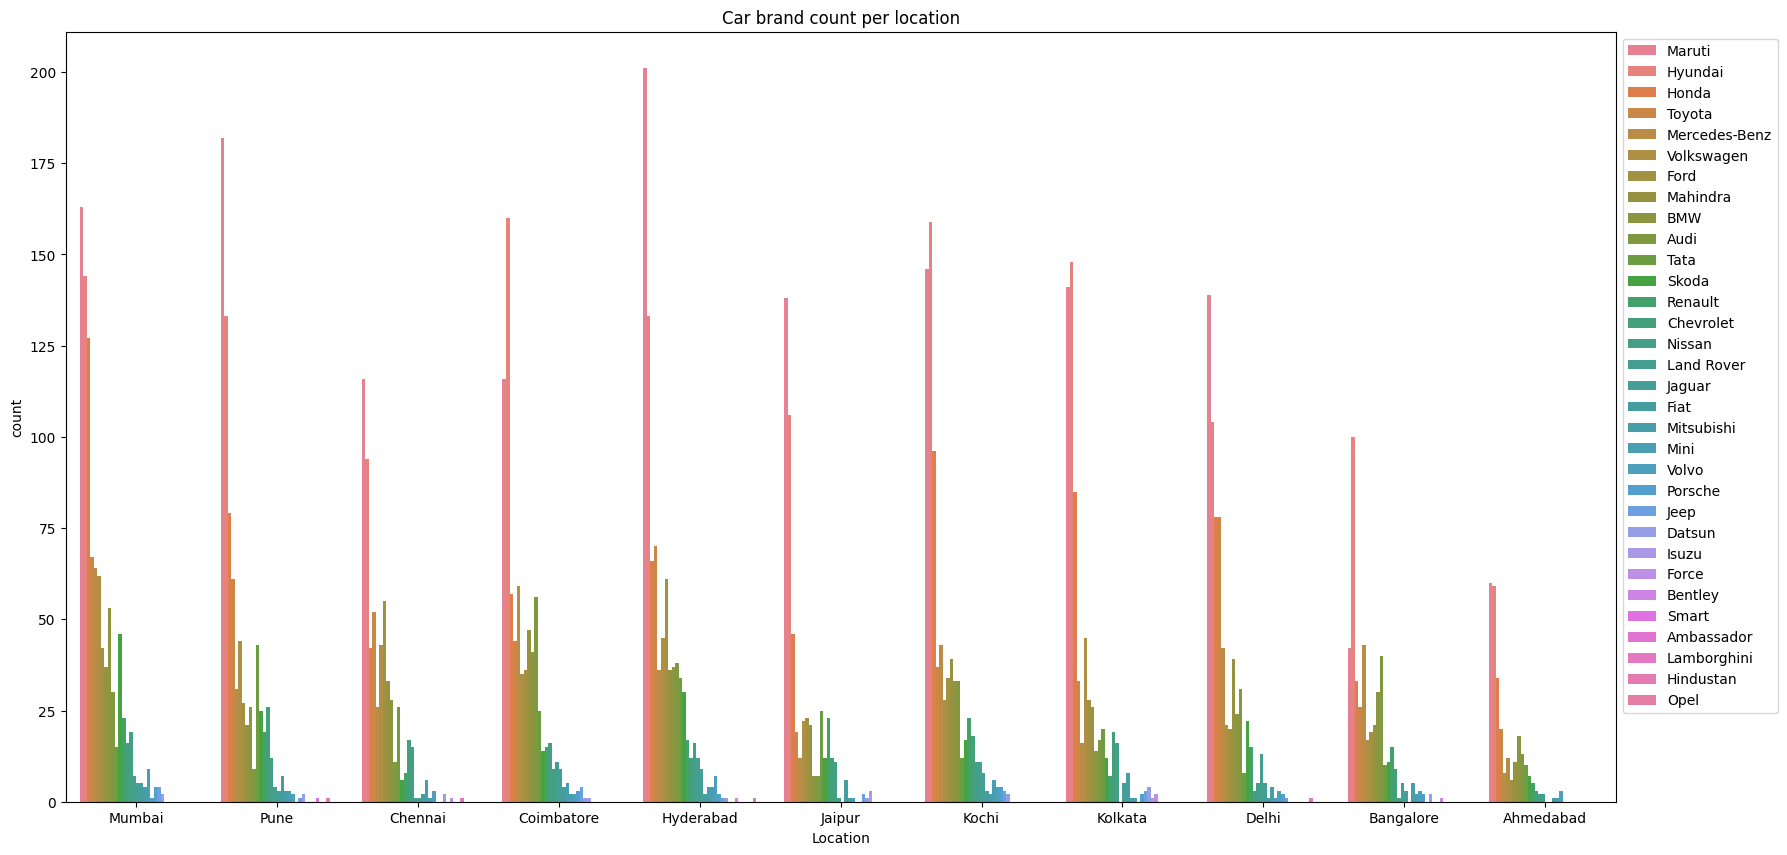

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


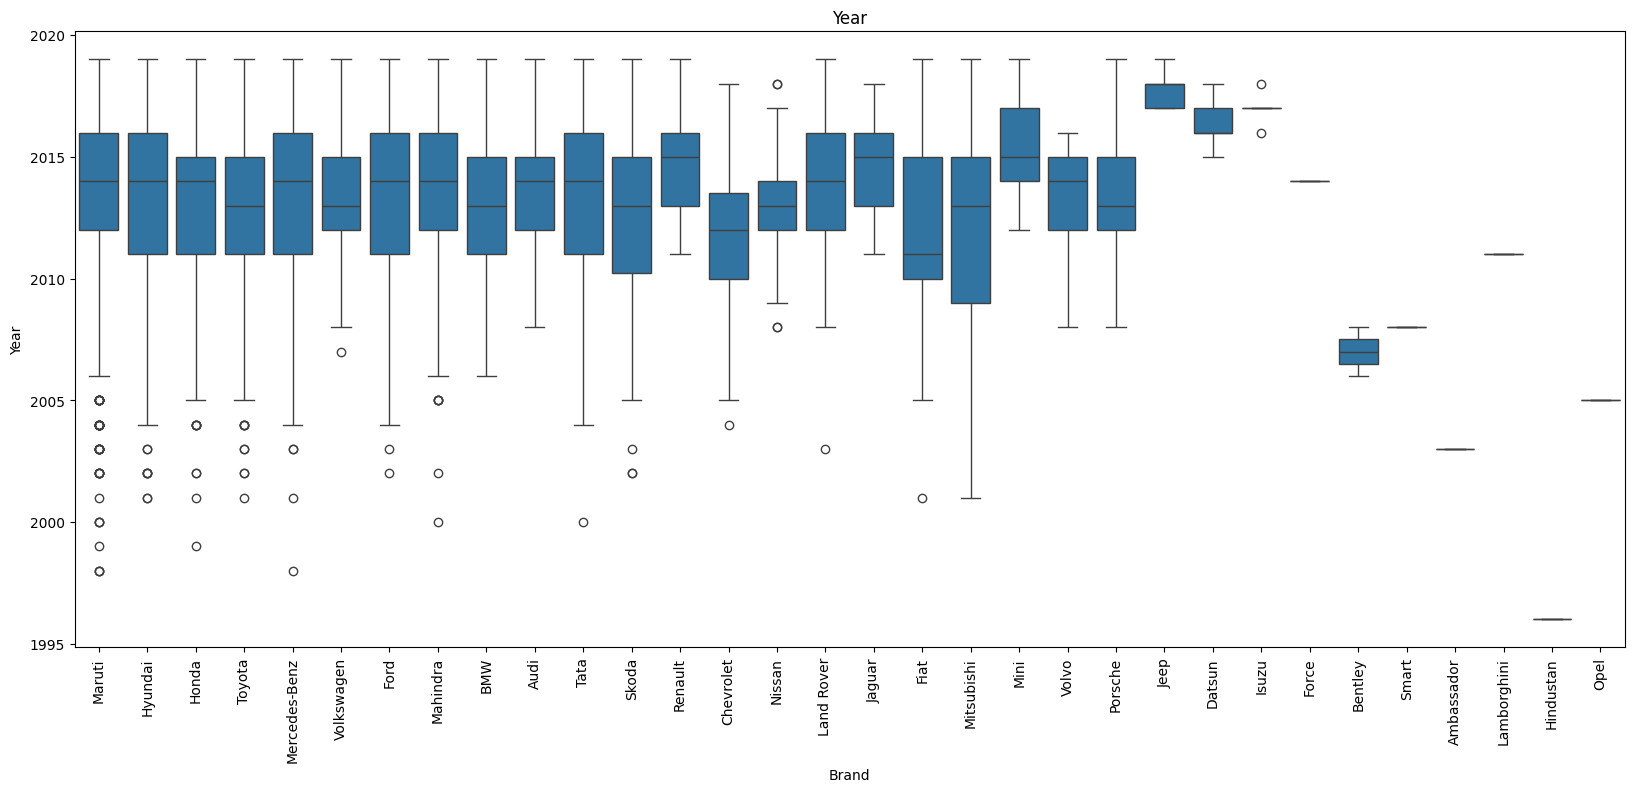

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


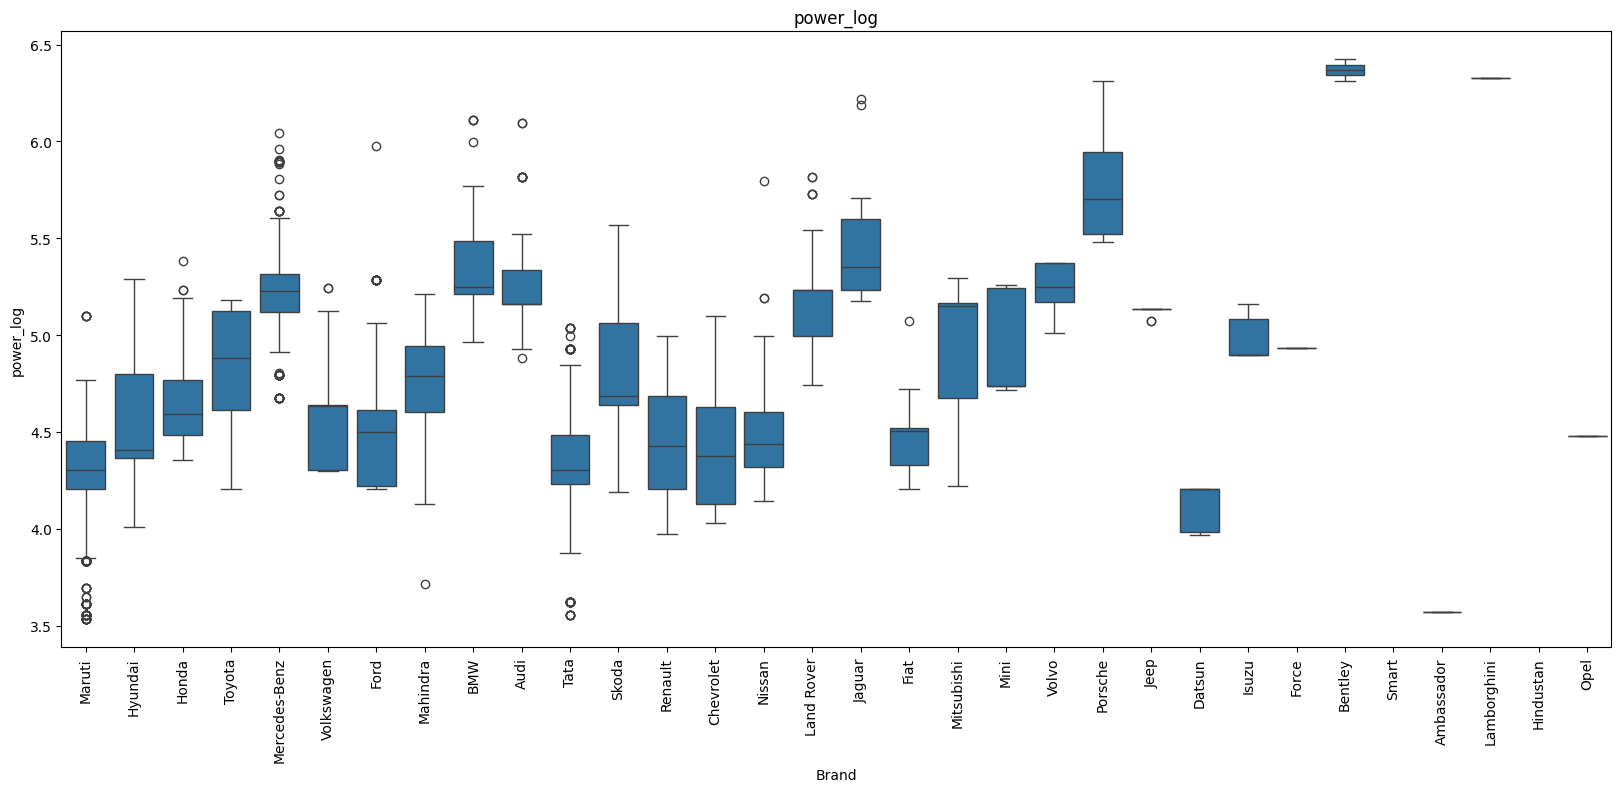

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


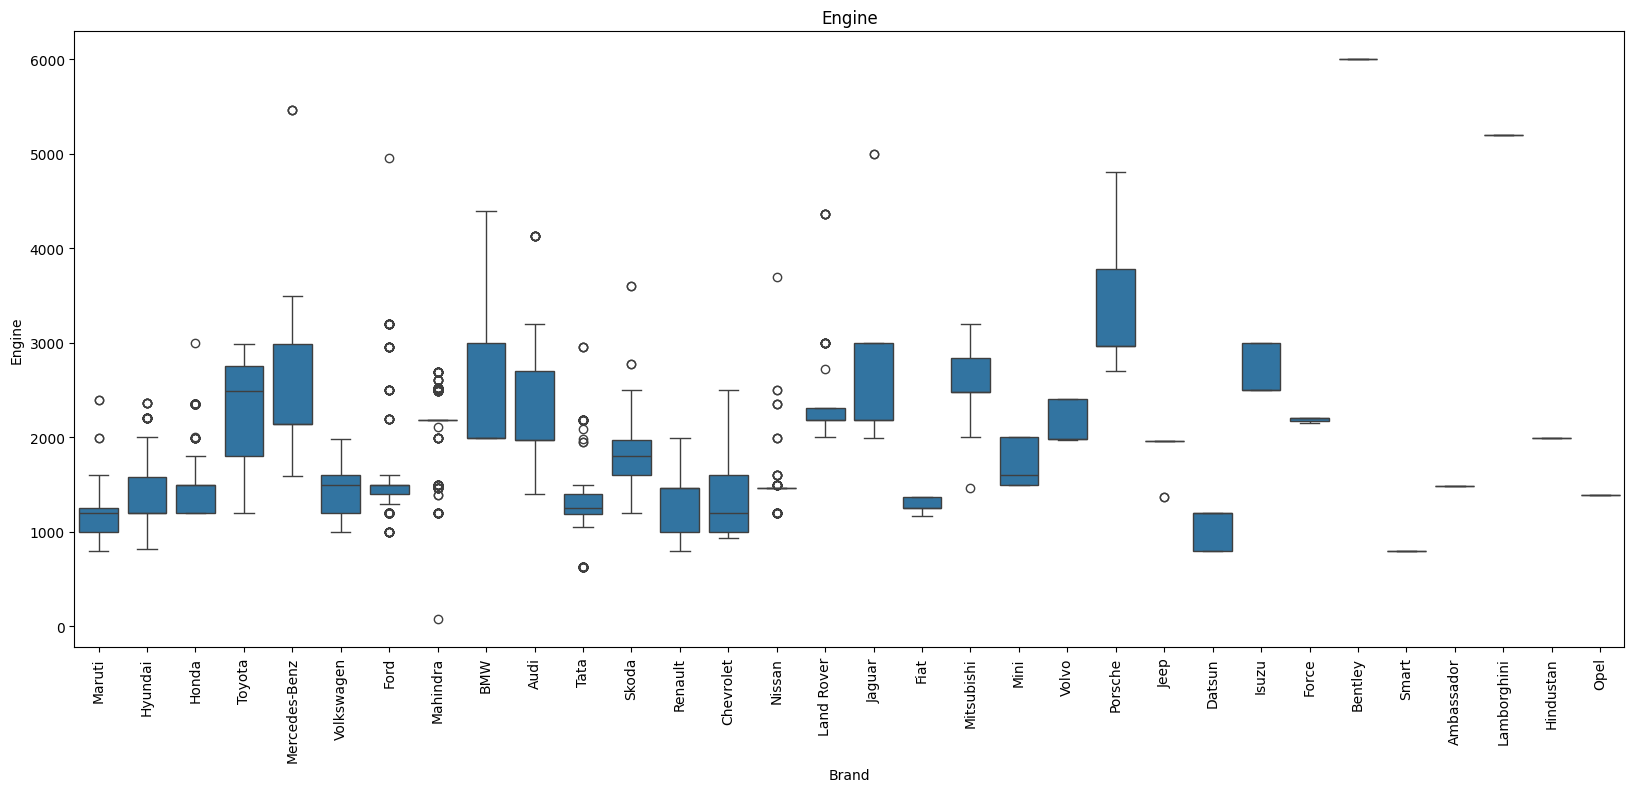

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


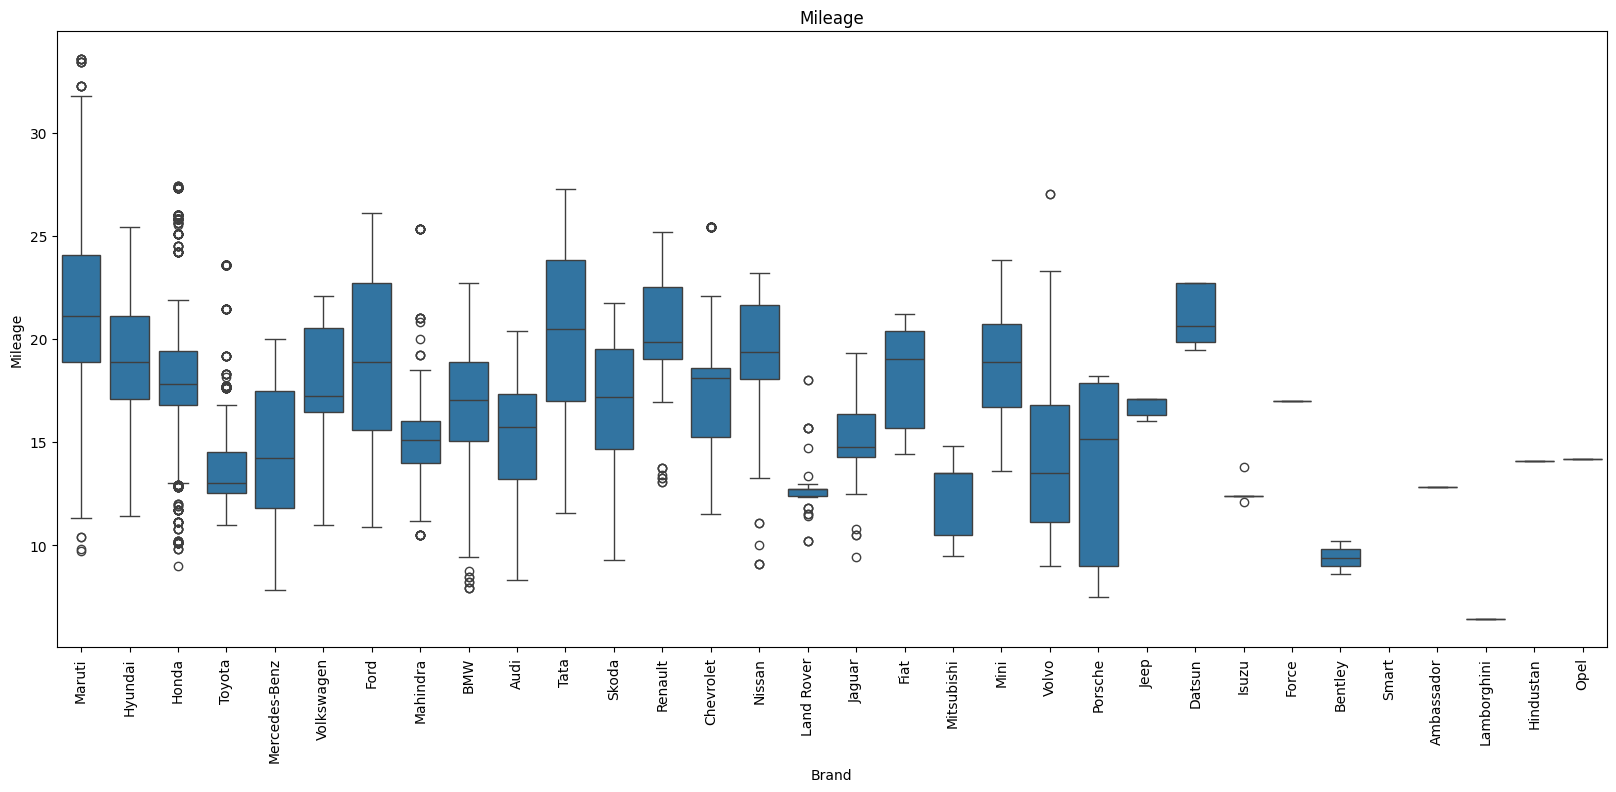

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [57]:
# Check specific relationships between Brand and Location, Brand and Year, & Brand and power_log
plt.figure(figsize=(20,10))
plt.title('Car brand count per location')
sns.countplot(data=df2,hue='Brand',x='Location',hue_order=df2.Brand.value_counts().index)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print('-'*250)

for i in ['Year','power_log','Engine','Mileage']:
  plt.figure(figsize=(20,8))
  plt.title(i)
  plt.xticks(rotation=90)
  sns.boxplot(data=df2,x='Brand',y=i,order=df2.Brand.value_counts().index)
  plt.show()
  print('-'*250)

**Observations**
- **Brand and Location:** The distribution of brands at each location seem very similar! We see that the overall shape are near-identical, with some discrepencies in the order of the top 3. For example, most locations have Maruti Suzuki as their top brand, but Koimbatore, Kochi, Kolkata, and Bangalore have more sales of Hyundai
- **Brand and Year:** Surprisingly, there isn't much variation between the brands in terms of their distribution of year of manufacture (disregarding the without enough entries to have a realistic look at their distribution). It is interesting to note that Maruti Suzuki has more outliers towards the older years than the other brands - perhaps indicating that this brand has been consistently popular throughout the years, hence why we are seeing more resales nowadays
- **Brand and Power (log):** There is less consistency between brands here. The top 3 brands, on averagem have lower power_log scores than most of the other brands. It is reassuring to see brands such as Porsche and Jaguar have high power ratings as expected.
- **Brand and Engine displacement:** Similar to Power, the top 3 car brands have lower engine displacement values. This is an interesting quirk of the data - especially when we consider that both power and engine displacement are highly correlated with price.
- **Brand and Mileage:** There seems to be less of a conclusive trend here. We can note the a car's kmpl score is mildly negatively correlated with its price - possibly again providing a reason why Maruti has a higher than average Mileage statistic. Mileage is also moderately correlated to Engine

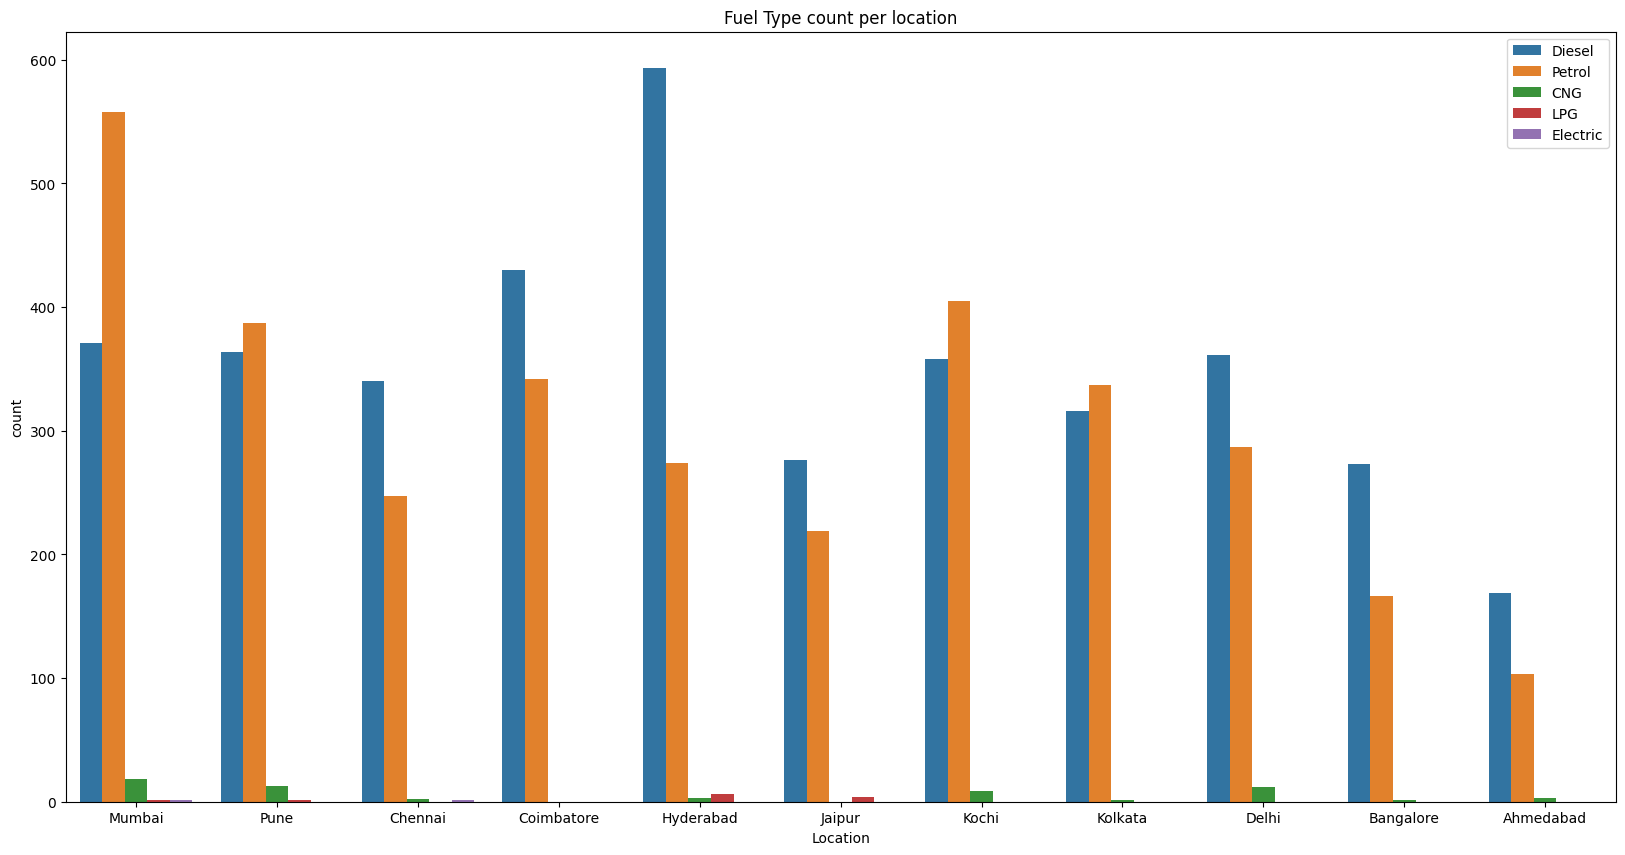

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


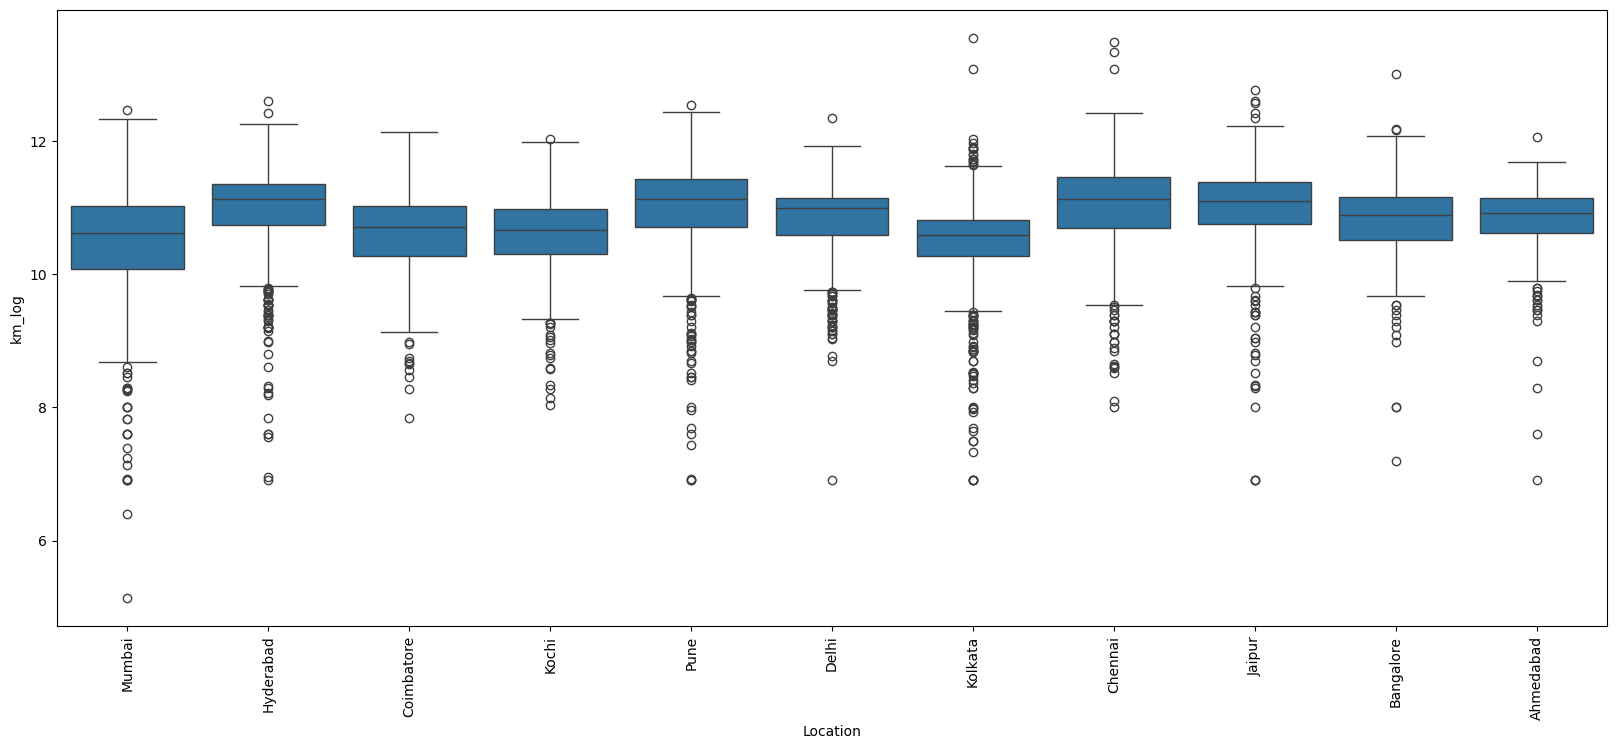

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [58]:
# Compare Location and Fuel Type, and Location and km_log
plt.figure(figsize=(20,10))
plt.title('Fuel Type count per location')
sns.countplot(data=df2,hue='Fuel_Type',x='Location',hue_order=df2.Fuel_Type.value_counts().index)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('-'*250)

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(data=df2,x='Location',y='km_log',order=df2.Location.value_counts().index)
plt.show()
print('-'*250)

**Observations**
- **Location and Fuel Type:** A majority of locations have more Diesel sales than Petrol, which follows Diesel being the most frequent fuel type. Interestingly, the most frequent location, Mumbai, has a higher count of Petrol than Diesel. The data doesn't include additional information on the cities, such as the infrasctructure type or popoulation, so we cannot explain these differeces between cities with certainty
- **Location and Kilometers Driven:** Surprisingly, there isn't much difference between km driven between locations

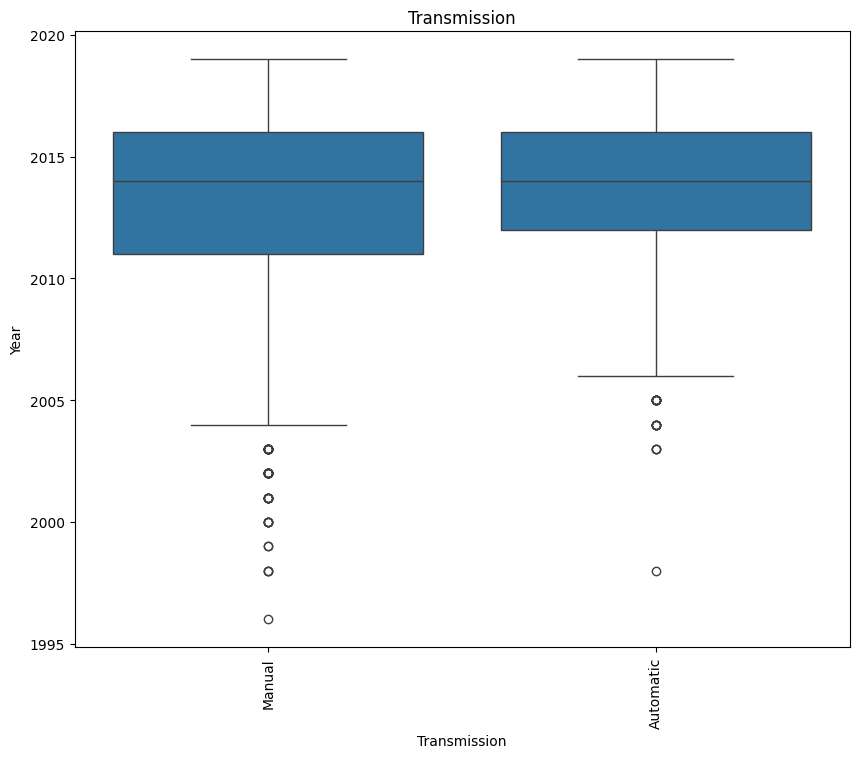

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


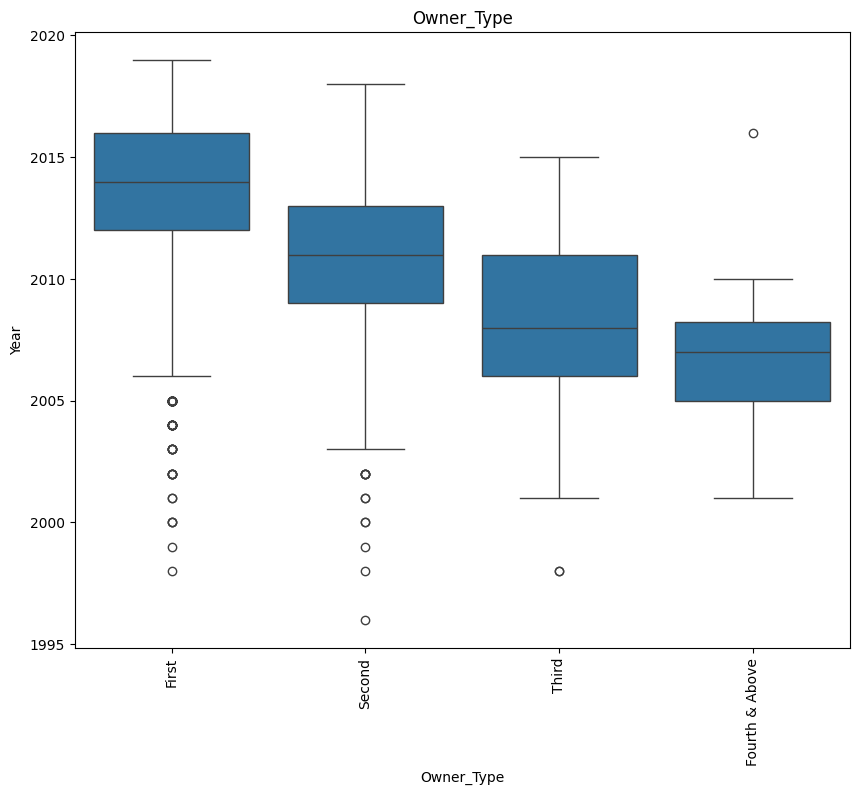

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


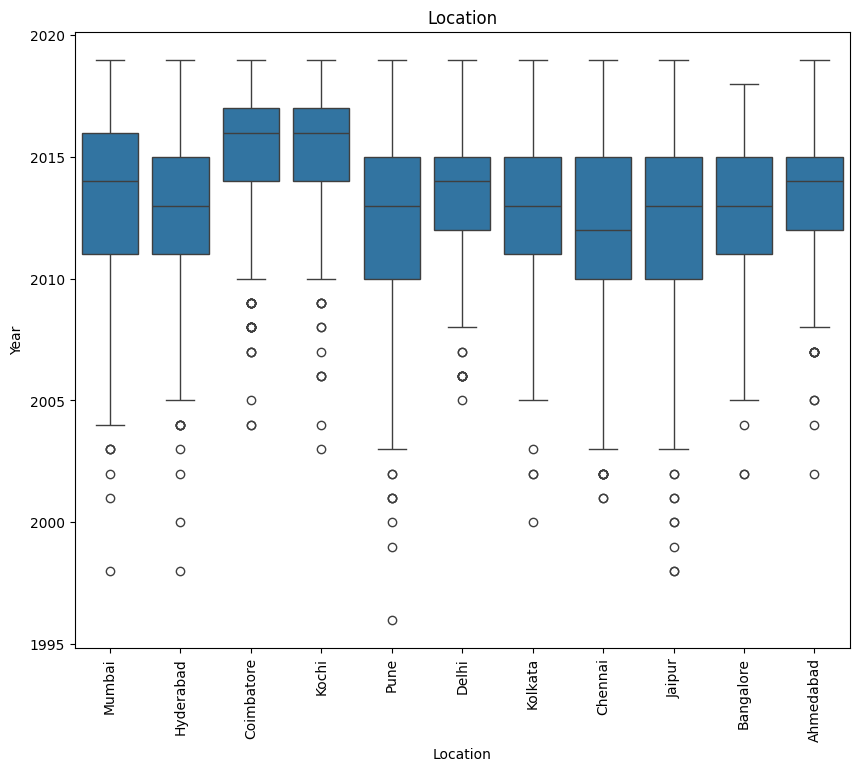

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


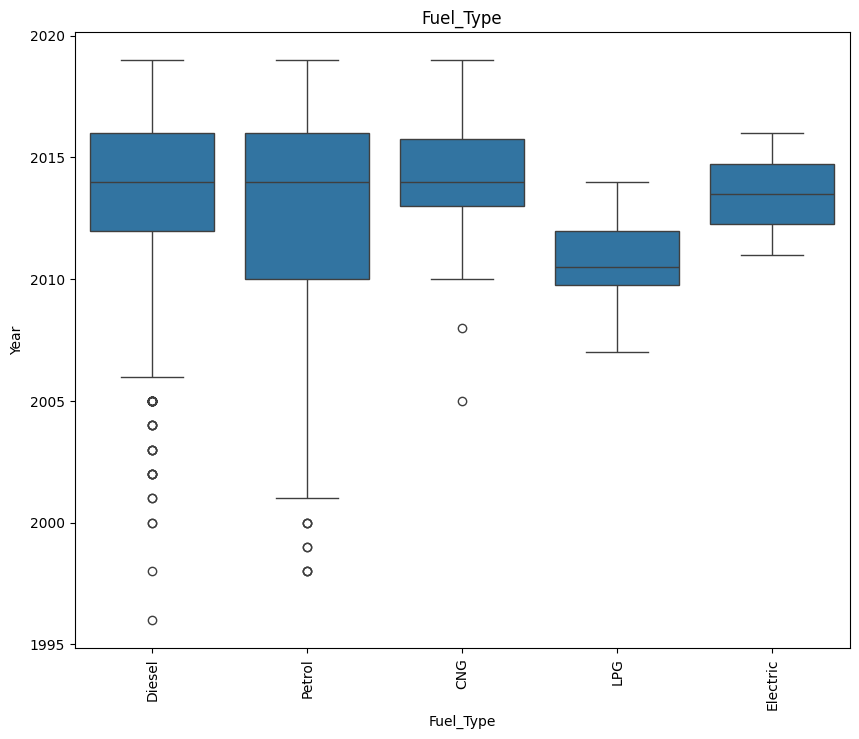

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [59]:
# Relationship between Year and Transmission, Year and Owner Type, Year and Location, & Year and Fuel Type
for i in ['Transmission','Owner_Type','Location','Fuel_Type']:
  plt.figure(figsize=(10,8))
  plt.title(i)
  plt.xticks(rotation=90)
  sns.boxplot(data=df2,x=i,y='Year',order=df2[i].value_counts().index)
  plt.show()
  print('-'*250)

**Observations**
- **Year and Transmission:** The difference in manufacture year between automatic and manual cars is very small, surprisingly!
- **Year and Owner Type:** The manufacture year consistently decreases as the number of previous owners increases, which is what would normally be expected
- **Year and Location:** Thre isn't much variation between locations when it comes to the average year of manufacture of cars. This is with the exception of Coimbatore and Kochi, which each have a more recent average manufacture year
- **Year and Fuel_Type:** There isn't any strong relationship between Fuel Type and year of manufacture. Cars that run on LPG are on average older than other cars that run on other fuel types. This, combined with the fact there isn't much relationship between year and location, provides additional evidence that there may be an unseen factor affecting fuel types by location

## **Data Preprocessing**

### **Missing value treatment**

In [60]:
# Check missing values again
df2.isnull().sum().sort_values(ascending=False)

newprice_log    6246
price_log       1234
Price           1234
power_log        175
Mileage           83
seats_log         53
Engine            46
Name               0
Brand              0
Location           0
Year               0
Fuel_Type          0
Transmission       0
Owner_Type         0
km_log             0
dtype: int64

**Observations**
- We will have to look at newprice_log, price, price_log, power_log, Mileage, seats_log, and Engine individually to treat their missing values.

#### Engine

In [61]:
# We know from previous analysis that the Engine distribution's median and mean are fairly close. We saw some high values earlier. Let's see how many there are
print(df2.Engine.describe())
print()
print('There are',df2.loc[df2.Engine>3000].shape[0],'high-valued entries in the Engine column')

count    7206.000000
mean     1616.382459
std       595.105530
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

There are 65 high-valued entries in the Engine column


In [62]:
# Since there are only 65 entries with engine displacement of over 3000cc, they shouldn't affect our data too much, so we'll go with the median as our replacement
df2.Engine=df2.Engine.fillna(df2.Engine.median())
df2.Engine.isna().sum()

0

#### Seats (log)

In [63]:
# Check missing values
print(df2.seats_log.isna().sum(),' missing values')
missseat=df2.loc[seats_log.isnull()].Name.unique()
missseat

53  missing values


array(['Honda City 1.5 GXI', 'Maruti Swift 1.3 VXi', 'Ford Figo Diesel',
       'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX',
       'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Honda City 1.5 EXI', 'Maruti Swift 1.3 LXI',
       'Hyundai Santro LP zipPlus', 'Toyota Etios Liva V',
       'Maruti Swift 1.3 VXI ABS', 'Maruti Estilo LXI',
       'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II',
       'Maruti Wagon R Vx', 'Ford Endeavour Hurricane LE',
       'Honda CR-V AT With Sun Roof', 'Fiat Punto 1.3 Emotion',
       'Hyundai Santro Xing XG', 'Honda Jazz Select Edition',
       'Fiat Punto 1.2 Dynamic', 'Fiat Punto 1.4 Emotion',
       'Skoda Laura 1.8 TSI Ambition',
       'Toyota Etios Liva Diesel TRD Sportivo',
       'Hyundai i20 new Sportz AT 1.4', 'Mahindra TUV 300 P4',
       'Honda Jazz 2020 Petrol'], dtype=object)

We now know the car models of missing values in the seats column. From this we can look at each name individually, and split them into two groups:
1. Those that have other instances with a non-null seats entry => Impute the seat number for the specific car model
2. Those where every entry of the model is missing an entry for seat number => Use the median value of seats for the brand

In [64]:
# Create list of all car models that only contain missing seat number values
missing_seats=[]
some_missing_seats=[]
for i in missseat:
  if all(df2.loc[df2.Name==i].seats_log.isna()): # This line checks whether every entry for seats is missing for the corresponding car model and if True, adds to the list
    missing_seats.append(i)
  else: # This line checks whether every entry for seats is missing for the corresponding car model and if True, adds to the list
    some_missing_seats.append(i)
print('Missing every seats values:', missing_seats)
print()
print('Missing some seats values:',some_missing_seats)

Missing every seats values: ['Maruti Swift 1.3 VXi', 'Ford Figo Diesel', 'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX', 'Maruti Swift 1.3 ZXI', 'Land Rover Range Rover Sport 2005 2012 Sport', 'Maruti Swift 1.3 LXI', 'Hyundai Santro LP zipPlus', 'Maruti Swift 1.3 VXI ABS', 'Maruti Estilo LXI', 'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II', 'Maruti Wagon R Vx', 'Ford Endeavour Hurricane LE', 'Honda CR-V AT With Sun Roof', 'Fiat Punto 1.3 Emotion', 'Hyundai Santro Xing XG', 'Fiat Punto 1.2 Dynamic', 'Fiat Punto 1.4 Emotion', 'Skoda Laura 1.8 TSI Ambition', 'Toyota Etios Liva Diesel TRD Sportivo', 'Hyundai i20 new Sportz AT 1.4', 'Mahindra TUV 300 P4', 'Honda Jazz 2020 Petrol']

Missing some seats values: ['Honda City 1.5 GXI', 'Honda City 1.5 EXI', 'Toyota Etios Liva V', 'Honda Jazz Select Edition']


In [65]:
# Create function for later use
def st(hue,stat='median',cat='Brand',num='seats_log'):
  '''
  Function that returns the mean, median, mode of the given unique value of categorical variable with respect to a numeric feature.
  The default values are to make the seats_log missing value analysis easier

  hue == unique value corresponding to the chosen categorical variable
  stat == median, mode, or mean
  cat == chosen categorical variable
  num == chosen numerical variable
  '''
  msg=[]
  if df2[num].dtypes not in ['int64','float64']:
    msg.extend(['Please enter a valid numerical variable for the num argument:',df2.select_dtypes(include=['int64','float64']).columns.to_list()])
  elif df2[cat].dtypes!='O':
    msg.extend(['Please enter a valid categorical variable for the cat argument:',df2.select_dtypes(include='object').columns.to_list()])
  elif hue not in df2[cat].values:
    msg.append(['Please give a unique value for the chosen categorical variable. Here is a list of unique values in your chosen categorical variable:',list(df2[cat].unique())])
  elif stat=='median':
    return df2.loc[df2[cat]==hue][num].median()
  elif stat=='mode':
    return df2.loc[df2[cat]==hue][num].mode()
  elif stat=='mean':
    return df2.loc[df2[cat]==hue][num].mean()
  else:
    msg.append("Not valid stat. Please enter 'median','mean', or 'mode' for the stat argument")
  print(str(msg))

In [66]:
for i in missing_seats:
  b=df2.loc[df2['Name']==i].Brand.unique() # Record the brand of the car model
  df2.loc[df2['Name']==i,'seats_log']=df2.loc[df2['Name']==i,'seats_log'].fillna(st(b[0])) # Impute missing values with median number seats for the brand
df2.seats_log.isna().sum() # Check how many missing values are left in the 'seats_log' column

7

In [67]:
# Sanity check to make sure each car model only has one unique number of seats value
for i in some_missing_seats:
  print(i)
  print(df2.loc[df2['Name']==i,'seats_log'].value_counts(dropna=False))
  print('-'*50)

Honda City 1.5 GXI
seats_log
NaN         3
1.609438    2
Name: count, dtype: int64
--------------------------------------------------
Honda City 1.5 EXI
seats_log
1.609438    4
NaN         1
Name: count, dtype: int64
--------------------------------------------------
Toyota Etios Liva V
seats_log
NaN         2
1.609438    1
Name: count, dtype: int64
--------------------------------------------------
Honda Jazz Select Edition
seats_log
1.609438    1
NaN         1
Name: count, dtype: int64
--------------------------------------------------


We can confirm that the car models in the list some_missing_seats that do indeed have at least 1 entry in the seats_log column. We also see that this value is np.log(5) for every car so this makes filling the missing values easier. Finally, by can count instances of NaN above just as we expected

In [68]:
# Impute remaining missing values
df2.seats_log=df2.seats_log.fillna(np.log(5))
# Check we have filled every missing value in the 'seats_log' column
df2.seats_log.isnull().sum()

0

#### Mileage


In [69]:
# Check number missing values
df2.Mileage.isna().sum()

83

In [70]:
# Mileage is the closest feature we have that is normally distributed. We can go ahead and use the mean to impute missing values with the mean
df2.Mileage=df2.Mileage.fillna(df.Mileage.mean())
df2.Mileage.isna().sum()

0

#### Power (log)

In [71]:
# Check number missing values
df2.power_log.isna().sum()

175

In [72]:
# power_log has significantly reduced skew when compared to Power. The mean and median are pretty similar, so we can go ahead and use the mean to impute missing values
df2.power_log=df2.power_log.fillna(df.power_log.mean())
# Check we have filled every missing value
df2.power_log.isna().sum()

0

#### New_price (log)

In [73]:
# Check new price missing values percentage
newpricemissing=df2.newprice_log.isna().sum()*100/len(df2.newprice_log)
print('Percentage of missing values in the new_price column: ',round(newpricemissing,2),'%',sep='')

Percentage of missing values in the new_price column: 86.13%


In [74]:
# Since over 85% of the records have missing values in the newprice_log feature column, we remove the entire column to make our regression less prone to mistakes.
df3=df2.drop('newprice_log',axis=1)
# Check whether the newprice_log column has successfully been removed in our new dataframe
df3

Name          Brand  \
0                                Maruti Wagon R LXI CNG         Maruti   
1                      Hyundai Creta 1.6 CRDi SX Option        Hyundai   
2                                          Honda Jazz V          Honda   
3                                     Maruti Ertiga VDI         Maruti   
4                       Audi A4 New 2.0 TDI Multitronic           Audi   
...                                                 ...            ...   
7247                  Volkswagen Vento Diesel Trendline     Volkswagen   
7248                             Volkswagen Polo GT TSI     Volkswagen   
7249                             Nissan Micra Diesel XV         Nissan   
7250                             Volkswagen Polo GT TSI     Volkswagen   
7251  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  Mercedes-Benz   

        Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0         Mumbai  2010       CNG       Manual      First    26.60   998.0   
1           Pune  2015    Diesel       Manual      First    19.67  1582.0   
2        Chennai  2011    Petrol       Manual      First    18.20  1199.0   
3        Chennai  2012    Diesel       Manual      First    20.77  1248.0   
4     Coimbatore  2013    Diesel    Automatic     Second    15.20  1968.0   
...          ...   ...       ...          ...        ...      ...     ...   
7247   Hyderabad  2011    Diesel       Manual      First    20.54  1598.0   
7248      Mumbai  2015    Petrol    Automatic      First    17.21  1197.0   
7249     Kolkata  2012    Diesel       Manual      First    23.08  1461.0   
7250        Pune  2013    Petrol    Automatic      Third    17.20  1197.0   
7251       Kochi  2014    Diesel    Automatic      First    10.00  2148.0   

         km_log  power_log  seats_log  price_log  Price  
0     11.184421   4.063198   1.609438   0.559616   1.75  
1     10.621327   4.837868   1.609438   2.525729  12.50  
2     10.736397   4.485260   1.609438   1.504077   4.50  
3     11.373663   4.485936   1.945910   1.791759   6.00  
4     10.613246   4.947340   1.609438   2.875822  17.74  
...         ...        ...        ...        ...    ...  
7247  11.400999   4.640537   1.609438        NaN    NaN  
7248  10.985293   4.640537   1.609438        NaN    NaN  
7249  10.239960   4.144721   1.609438        NaN    NaN  
7250  10.864025   4.640537   1.609438        NaN    NaN  
7251  11.190555   5.135798   1.609438        NaN    NaN  

[7252 rows x 14 columns]

In [75]:
# We will also keep df2 and impute the missing values in the newprice_log column to build two kinds of models, one with and one without the newprice feature
# Check the difference between imputing missing values with the mean vs with the median
check_mean=df2.newprice_log.fillna(df2.newprice_log.mean())
print('Impute with mean')
print(check_mean.describe())
print('-'*50)
check_median=df2.newprice_log.fillna(df2.newprice_log.median())
print('Impute with median')
print(check_median.describe())
print('-'*50)
print('Skew')
newprice_log.skew()

Impute with mean
count    7252.000000
mean        2.691519
std         0.321856
min         1.363537
25%         2.691519
50%         2.691519
75%         2.691519
max         5.926926
Name: newprice_log, dtype: float64
--------------------------------------------------
Impute with median
count    7252.000000
mean        2.482139
std         0.332646
min         1.363537
25%         2.448415
50%         2.448415
75%         2.448415
max         5.926926
Name: newprice_log, dtype: float64
--------------------------------------------------
Skew


0.7238320014363577

In [76]:
# We go with the median because the skew, although not ridiculously strong, is enough to cause worry if we were to impute with the mean
df2.newprice_log=df2.newprice_log.fillna(df.newprice_log.median())
# Check we have sucessfully removed all missing values
df2.newprice_log.isna().sum()

0

#### Price and Price (log)
- Since this is the dependent variable, we simply remove the records where we have missing values

In [77]:
# Sanity check of number missing values
print(df2.isna().sum())

Name               0
Brand              0
Location           0
Year               0
Fuel_Type          0
Transmission       0
Owner_Type         0
Mileage            0
Engine             0
km_log             0
power_log          0
seats_log          0
newprice_log       0
price_log       1234
Price           1234
dtype: int64


In [78]:
# Drop the rows with missing values
df2.dropna(axis=0,inplace=True)
# Make sure we don't have any more missing values in our DataFrame
print(df2.isnull().sum())
# Check shape of df2, they should be 7252-1234=6018 rows and 15 columns for df2 and 14 columns for df3
df2.shape

Name            0
Brand           0
Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
km_log          0
power_log       0
seats_log       0
newprice_log    0
price_log       0
Price           0
dtype: int64


(6018, 15)

In [79]:
# Final look at the summary statistics of df2
df2.describe(include='all').T

count unique                     top  freq         mean  \
Name            6018   1876  Mahindra XUV500 W8 2WD    49          NaN   
Brand           6018     30                  Maruti  1211          NaN   
Location        6018     11                  Mumbai   790          NaN   
Year          6018.0    NaN                     NaN   NaN  2013.357594   
Fuel_Type       6018      5                  Diesel  3204          NaN   
Transmission    6018      2                  Manual  4299          NaN   
Owner_Type      6018      4                   First  4928          NaN   
Mileage       6018.0    NaN                     NaN   NaN      18.3427   
Engine        6018.0    NaN                     NaN   NaN  1620.281157   
km_log        6018.0    NaN                     NaN   NaN    10.757961   
power_log     6018.0    NaN                     NaN   NaN     4.637298   
seats_log     6018.0    NaN                     NaN   NaN     1.653288   
newprice_log  6018.0    NaN                     NaN   NaN     2.484624   
price_log     6018.0    NaN                     NaN   NaN     1.824705   
Price         6018.0    NaN                     NaN   NaN     9.470243   

                     std       min        25%        50%        75%        max  
Name                 NaN       NaN        NaN        NaN        NaN        NaN  
Brand                NaN       NaN        NaN        NaN        NaN        NaN  
Location             NaN       NaN        NaN        NaN        NaN        NaN  
Year            3.269677    1998.0     2011.0     2014.0     2016.0     2019.0  
Fuel_Type            NaN       NaN        NaN        NaN        NaN        NaN  
Transmission         NaN       NaN        NaN        NaN        NaN        NaN  
Owner_Type           NaN       NaN        NaN        NaN        NaN        NaN  
Mileage         4.151352       6.4       15.4  18.346859       21.1      33.54  
Engine        599.424157      72.0     1198.0     1493.0     1969.0     5998.0  
km_log          0.713022  5.141664  10.434116  10.878047  11.198215  13.560618  
power_log       0.411343  3.532226   4.356709   4.591071   4.927471   6.327937  
seats_log       0.139545  0.693147   1.609438   1.609438   1.609438   2.302585  
newprice_log      0.3323  1.363537   2.448415   2.448415   2.448415   5.438079  
price_log       0.873606 -0.820981   1.252763   1.729884   2.297573   5.075174  
Price          11.165926      0.44        3.5       5.64       9.95      160.0

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop the categorical feature Name as it doesn't provide us with useful information.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** When building our models, we will be using df2 and df3 in parallel. Through this we will be able to compare the impact of removing the newprice_log column on our model performances

In [80]:
# Importing libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

### **Split the Data**

<li>Step1: Separate the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name', 'Price', 'price_log', 'Kilometers_Driven' from X before splitting?
  - We drop the Name feature because it has too many unique values. This makes it unsuitable if we want to build a good predictive algorithms
  - We drop the price_log and Price variable because they are our dependent (y) variable
  - We have already dropped Kilometers_Driven and the other independent variables that we replaced with log versions

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ordinary Least Squares Regression** <br>
**3) Ridge / Lasso Regression** <br>
**4) Decision Trees** <br>
**5) Random Forest** <br>

In [81]:
# Define X independent variables data for df2
X = df2.drop(['Name','Price','price_log'],axis=1)
# Define X independent variables data without newprice_log
X2 = df2.drop(['Name','Price','price_log','newprice_log'],axis=1)
# Define y dependent variable data
y = df2[['price_log','Price']]

In [82]:
# Step 2: Encode cat variables using dummy variables
X = pd.get_dummies(X, drop_first = True)
X2= pd.get_dummies(X2,drop_first=True)

In [83]:
# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.3,random_state=1)

In [84]:
# Metrics function: RMS, RMSE, MSE, R^2, MAE, MAPE
def performance(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,ls=False):
  perf=[]
  r2_train=r2_score(y_pred=np.exp(model.predict(X_train)), y_true=y_train['Price'])
  r2_test=r2_score(y_pred=np.exp(model.predict(X_test)), y_true=y_test['Price'])
  RMSE_train=np.sqrt(mean_squared_error(y_pred=np.exp(model.predict(X_train)), y_true=y_train['Price']))
  RMSE_test=np.sqrt(mean_squared_error(y_pred=np.exp(model.predict(X_test)), y_true=y_test['Price']))
  MAE_train=mean_absolute_error(y_pred=np.exp(model.predict(X_train)),y_true=y_train['Price'])
  MAE_test=mean_absolute_error(y_pred=np.exp(model.predict(X_test)),y_true=y_test['Price'])
  MAPE_train=mean_absolute_percentage_error(y_pred=np.exp(model.predict(X_train)),y_true=y_train['Price'])
  MAPE_test=mean_absolute_percentage_error(y_pred=np.exp(model.predict(X_test)),y_true=y_test['Price'])
  perf.extend((r2_train,r2_test,RMSE_train,RMSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test))
  if ls==True:
    return dict(zip(['r^2 train','r^2 test','RMSE train','RMSE test','MAE train','MAE test','MAPE train','MAPE test'],perf))

### **Linear Regression**

In [85]:
# Linear regression model with newprice_log
lreg=LinearRegression()
lreg.fit(X_train, y_train['price_log'])
linper1=performance(lreg,ls=True)
linper1

{'r^2 train': 0.8959013287155702,
 'r^2 test': 0.8918200219148048,
 'RMSE train': 3.604739299373938,
 'RMSE test': 3.6656659197644132,
 'MAE train': 1.6131691836306685,
 'MAE test': 1.679331730286168,
 'MAPE train': 0.18095614892301592,
 'MAPE test': 0.17203186451925814}

In [86]:
# Linear regression model without newprice_log
lreg2=LinearRegression()
lreg2.fit(X2_train,y2_train['price_log'])
linper2=performance(lreg2,X_train=X2_train,y_train=y2_train,X_test=X2_test,y_test=y2_test,ls=True)
linper2

{'r^2 train': 0.8963894393638642,
 'r^2 test': 0.8855697768616961,
 'RMSE train': 3.596278196950494,
 'RMSE test': 3.770073435318271,
 'MAE train': 1.6224931910008915,
 'MAE test': 1.6933540205345146,
 'MAPE train': 0.18093091642598016,
 'MAPE test': 0.17262773821240776}

### **OLS Regression**

In [87]:
def vif(X_train_scaled):
  vif_scores = pd.Series([variance_inflation_factor(X_train_scaled.values, i) for i in range(len(X_train_scaled.columns))], index=X_train_scaled.columns,dtype=float)
  print('VIF scores')
  print(vif_scores)

#### With newprice_log feature

In [88]:
# Scale variables
X_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_train),index=X_train.index,columns=X_train.columns)
X_test_scaled= pd.DataFrame(MinMaxScaler().fit_transform(X_test),index=X_test.index,columns=X_test.columns)

In [89]:
# Build OLS model
# Add intercept term in regression
X_train_scaled=sm.add_constant(X_train_scaled)
X_test_scaled=sm.add_constant(X_test_scaled)
# Create version 1 of model
olsmod1=sm.OLS(y_train['price_log'], X_train_scaled).fit()
# Model performance
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1022.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:20:04   Log-Likelihood:                 203.49
No. Observations:                4212   AIC:                            -297.0
Df Residuals:                    4157   BIC:                             52.03
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**
- We see very high R^2 and adjusted R^2 values of 0.930 and 0.929 respectively. Before we have a look at the p-values, let's look at collinearity with VIF scores

In [90]:
# Check VIF scores for multicollinearity
vif(X_train_scaled)

VIF scores
const                        4727.065431
Year                            2.190916
Mileage                         3.977859
Engine                          7.208944
km_log                          1.795975
power_log                       6.590606
seats_log                       2.276907
newprice_log                    1.248835
Brand_Audi                    160.695761
Brand_BMW                     187.552116
Brand_Bentley                   2.085964
Brand_Chevrolet                87.288871
Brand_Datsun                   10.249069
Brand_Fiat                     20.400595
Brand_Force                     3.059614
Brand_Ford                    207.044419
Brand_Honda                   389.521580
Brand_Hyundai                 658.367353
Brand_Isuzu                     4.080738
Brand_Jaguar                   30.805406
Brand_Jeep                     12.329724
Brand_Lamborghini               2.080171
Brand_Land Rover               38.721937
Brand_Mahindra                183.422796
Brand

**Observations**
- We can ignore categorical variables with VIF values above 5 as these are expected when using dummy variables
- Engine and power_log have high VIF scores - we will remove Engine as it has the highest VIF score out of the numerical variables

In [91]:
# Collinearity check pt.2
X_train_scaled2=X_train_scaled.drop('Engine',axis=1)
vif(X_train_scaled2)

VIF scores
const                        4703.966374
Year                            2.187670
Mileage                         3.551060
km_log                          1.794817
power_log                       4.160777
seats_log                       2.251025
newprice_log                    1.246183
Brand_Audi                    160.527569
Brand_BMW                     187.388225
Brand_Bentley                   2.061577
Brand_Chevrolet                87.181236
Brand_Datsun                   10.241367
Brand_Fiat                     20.358805
Brand_Force                     3.058248
Brand_Ford                    206.896862
Brand_Honda                   389.073752
Brand_Hyundai                 657.439890
Brand_Isuzu                     4.080730
Brand_Jaguar                   30.797396
Brand_Jeep                     12.306883
Brand_Lamborghini               2.067654
Brand_Land Rover               38.698116
Brand_Mahindra                183.332233
Brand_Maruti                  693.088075
Brand

In [92]:
# Update test set too
X_test_scaled2=X_test_scaled.drop('Engine',axis=1)

**Observations**
- All the VIF scores are acceptable now! Let's rebuild our model with this new training dataset

In [93]:
# Build second model
olsmod2=sm.OLS(y_train['price_log'], X_train_scaled2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:20:07   Log-Likelihood:                 125.01
No. Observations:                4212   AIC:                            -142.0
Df Residuals:                    4158   BIC:                             200.6
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [94]:
# Remove features with p-values above 0.05, since we fail to reject the null hypothesis for these
pval=pd.DataFrame({'p':olsmod2.pvalues})
insig=pval.drop(pval[pval['p']<=0.05].index).index.tolist()
# Create new training data that doesn't include the insignificant features, and repeat
X_train_scaled3=X_train_scaled2.drop(insig,axis=1)
X_test_scaled3=X_test_scaled2.drop(insig,axis=1)

In [95]:
# New model
olsmod2_2=sm.OLS(y_train['price_log'], X_train_scaled3).fit()
print(olsmod2_2.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7695.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:20:07   Log-Likelihood:                         -117.55
No. Observations:                4212   AIC:                                      305.1
Df Residuals:                    4177   BIC:                                      527.2
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [96]:
# Repeat the above since seats_log and Mumbai still have p-values above 0.05
pval2=pd.DataFrame({'p':olsmod2_2.pvalues})
insig2=pval2.drop(pval2[pval2['p']<=0.05].index).index.tolist()
X_train_scaled4=X_train_scaled3.drop(insig2,axis=1)
X_test_scaled4=X_test_scaled3.drop(insig2,axis=1)

In [97]:
olsmod2_3=sm.OLS(y_train['price_log'], X_train_scaled4).fit()
print(olsmod2_3.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8158.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:20:07   Log-Likelihood:                         -119.37
No. Observations:                4212   AIC:                                      304.7
Df Residuals:                    4179   BIC:                                      514.1
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

**Observations**
- We have removed features with p-values lower than 0.05. Our R^2 scores between our training data and test data seem to have gotten slightly closer - however not by much
- We can now check whether our model fulfills the linear regression assumptions

In [98]:
# Rename the final model
ols_model1=olsmod2_3

##### Linear Regression Assumptions

In [99]:
# 1. Residuals mean = 0
res=ols_model1.resid

np.mean(res)

0.00043433776237101324

**Observations**
- The mean value of redisuals for our model is incredibly close to zero, just as we want

In [100]:
# 2. Goldfeld–Quandt test for heteroskedasticity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.stats.api as sms

s = ["F statistic", "p-value"]
gfq = sms.het_goldfeldquandt(y_train['price_log'], X_train_scaled4)
lzip(s, gfq)

[('F statistic', 1.0776963200847345), ('p-value', 0.04422614636518398)]

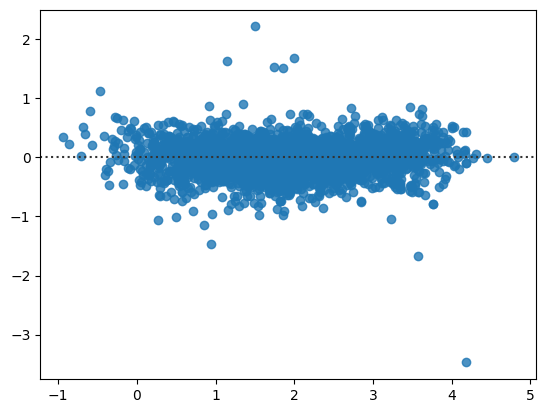

In [101]:
# Linearity of variables, i.e. residuals should be randomly distributed
# Predicted values
x = ols_model1.fittedvalues
# Residual plot
sns.residplot(x = x, y = res)
plt.show()

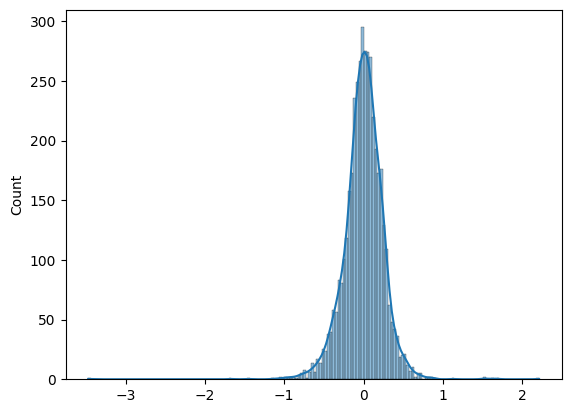

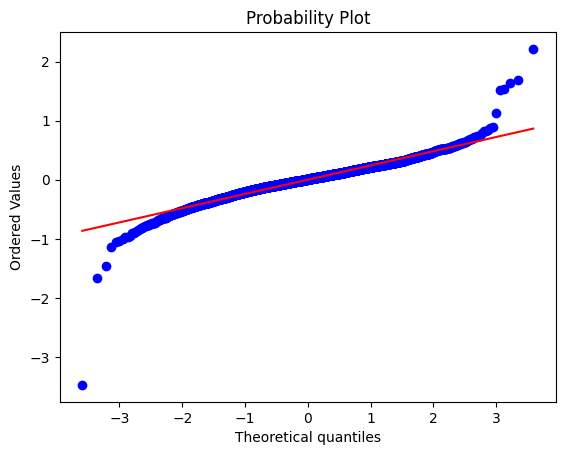

In [102]:
# Check for normality of error terms
# Residuals histogram
sns.histplot(res, kde = True)
plt.show()

# q-q plot of residuals to check for normality (plot must follow linear path)
import pylab
import scipy.stats as stats

stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

**Observations**
- Our OLS model satisfies all the linear regression assumptions except homoskedasticity

In [103]:
# Finally check the model's performance on the training and test sets
olsper1=performance(ols_model1,X_train=X_train_scaled4,X_test=X_test_scaled4,ls=True)
olsper1

{'r^2 train': 0.8677586392713029,
 'r^2 test': 0.8089042876449293,
 'RMSE train': 4.062888677419786,
 'RMSE test': 4.871973402524837,
 'MAE train': 1.7800895119007885,
 'MAE test': 2.3144109843761163,
 'MAPE train': 0.1922963877120215,
 'MAPE test': 0.24180689760238827}

#### Without newprice_log

In [104]:
# Scale variables
X2_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X2_train),index=X_train.index,columns=X2_train.columns)
X2_test_scaled= pd.DataFrame(MinMaxScaler().fit_transform(X2_test),index=X_test.index,columns=X2_test.columns)

In [105]:
# Build OLS model
# Add intercept term in regression
X2_train_scaled=sm.add_constant(X2_train_scaled)
X2_test_scaled=sm.add_constant(X2_test_scaled)
# Create version 1 of model
olsmoda=sm.OLS(y2_train['price_log'], X2_train_scaled).fit()
# Model performance
print(olsmoda.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1039.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:20:08   Log-Likelihood:                 199.28
No. Observations:                4212   AIC:                            -290.6
Df Residuals:                    4158   BIC:                             52.10
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [106]:
# Check VIF scores
vif(X2_train_scaled)

VIF scores
const                        4713.992297
Year                            2.190402
Mileage                         3.970639
Engine                          7.193633
km_log                          1.795409
power_log                       6.470574
seats_log                       2.276386
Brand_Audi                    160.667806
Brand_BMW                     187.547332
Brand_Bentley                   2.085497
Brand_Chevrolet                87.271498
Brand_Datsun                   10.233123
Brand_Fiat                     20.395604
Brand_Force                     3.058917
Brand_Ford                    206.998025
Brand_Honda                   389.407126
Brand_Hyundai                 658.199751
Brand_Isuzu                     4.080738
Brand_Jaguar                   30.791753
Brand_Jeep                     12.328060
Brand_Lamborghini               2.079712
Brand_Land Rover               38.720236
Brand_Mahindra                183.371143
Brand_Maruti                  693.616936
Brand

**Observations**
- We can ignore the high VIF scores of categorical variables
- Engine and power_log have high VIF scores

In [107]:
# Drop the 'Engine' variable
X2_train_scaled2=X2_train_scaled.drop('Engine',axis=1)
X2_test_scaled2=X2_test_scaled.drop('Engine',axis=1)

In [108]:
# Check VIF scores again
vif(X2_train_scaled2)

VIF scores
const                        4692.421361
Year                            2.187028
Mileage                         3.537789
km_log                          1.794323
power_log                       4.085201
seats_log                       2.250787
Brand_Audi                    160.505530
Brand_BMW                     187.385668
Brand_Bentley                   2.060745
Brand_Chevrolet                87.167591
Brand_Datsun                   10.226394
Brand_Fiat                     20.355049
Brand_Force                     3.057637
Brand_Ford                    206.857698
Brand_Honda                   388.979013
Brand_Hyundai                 657.306375
Brand_Isuzu                     4.080730
Brand_Jaguar                   30.784663
Brand_Jeep                     12.304598
Brand_Lamborghini               2.066946
Brand_Land Rover               38.696948
Brand_Mahindra                183.286594
Brand_Maruti                  692.901137
Brand_Mercedes-Benz           211.173837
Brand

**Observations**
- VIF scores are now acceptable

In [109]:
# Rebuild model
olsmodb=sm.OLS(y2_train['price_log'], X2_train_scaled2).fit()
# Model performance
print(olsmodb.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:20:10   Log-Likelihood:                 122.42
No. Observations:                4212   AIC:                            -138.8
Df Residuals:                    4159   BIC:                             197.5
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [110]:
# Remove insignifcant features with p-values above 0.05
pvala=pd.DataFrame({'p':olsmodb.pvalues})
insiga=pvala.drop(pvala[pvala['p']<=0.05].index).index.tolist()
X2_train_scaled3=X2_train_scaled2.drop(insiga,axis=1)
X2_test_scaled3=X2_test_scaled2.drop(insiga,axis=1)

In [111]:
# Build updated model
olsmodc=sm.OLS(y2_train['price_log'], X2_train_scaled3).fit()
# Model performance
print(olsmodc.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7902.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:20:11   Log-Likelihood:                         -123.04
No. Observations:                4212   AIC:                                      314.1
Df Residuals:                    4178   BIC:                                      529.8
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [112]:
# Remove seats_log and Mumbai features
pvalb=pd.DataFrame({'p':olsmodc.pvalues})
insigb=pvalb.drop(pvalb[pvalb['p']<=0.05].index).index.tolist()
X2_train_scaled4=X2_train_scaled3.drop(insigb,axis=1)
X2_test_scaled4=X2_test_scaled3.drop(insigb,axis=1)

In [113]:
# Build updated model
olsmodd=sm.OLS(y2_train['price_log'], X2_train_scaled4).fit()
# Model performance
print(olsmodd.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8394.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:20:11   Log-Likelihood:                         -124.46
No. Observations:                4212   AIC:                                      312.9
Df Residuals:                    4180   BIC:                                      516.0
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [114]:
# Rename final model
ols_model2=olsmodd

##### Check linear regression assumptions

In [115]:
# 1. Residuals mean = 0
resa=ols_model2.resid

np.mean(res)

0.00043433776237101324

**Observations**
- The mean value of redisuals for our model is incredibly close to zero, just as we want

In [116]:
# 2. Goldfeld–Quandt test for heteroskedasticity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.stats.api as sms

s = ["F statistic", "p-value"]
gfq = sms.het_goldfeldquandt(y2_train['price_log'], X2_train_scaled4)
lzip(s, gfq)

[('F statistic', 1.0702803215586685), ('p-value', 0.060954674879136056)]

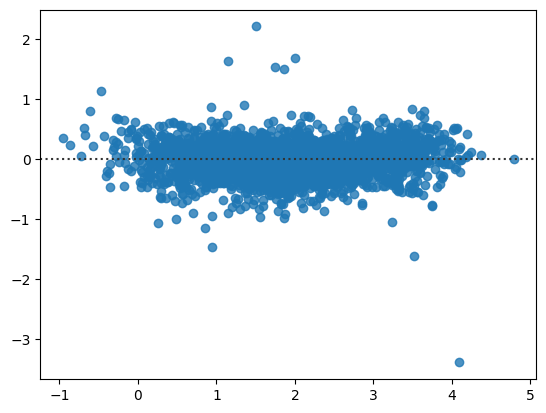

In [117]:
# Linearity of variables, i.e. residuals should be randomly distributed
# Predicted values
x = ols_model2.fittedvalues
# Residual plot
sns.residplot(x = x, y = resa)
plt.show()

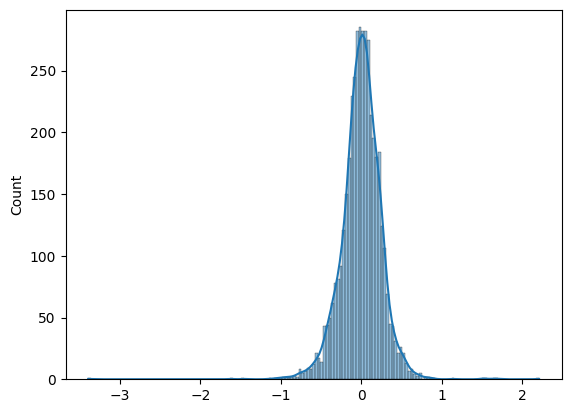

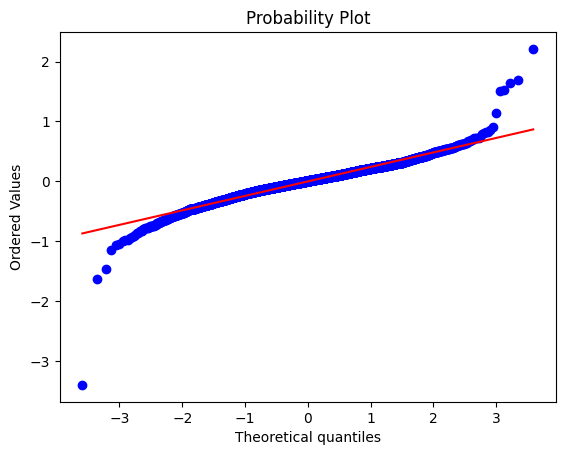

In [118]:
# Check for normality of error terms
# Residuals histogram
sns.histplot(resa, kde = True)
plt.show()

# q-q plot of residuals to check for normality (plot must follow linear path)
import pylab
import scipy.stats as stats

stats.probplot(resa, dist = "norm", plot = pylab)
plt.show()

**Observations**
- We fail to reject the Null Hypothesis for the Goldfeld-Quandt test, so we cannot say with certainty that this model satisfies the linear regression assumptions
- We won't consider this model further

### **Ridge / Lasso Regression**
We have found that many of the independent variables have a moderately significant to very significant effect on the dependent variable. Therefore, we will use Ridge Regression instead of Lasso



In [119]:
# import Ridge model library
from sklearn.linear_model import Ridge
# Build model
ridgemod1 = Ridge()
# Fit Ridge model
ridgemod1.fit(X_train, y_train['price_log'])
# Check performance metrics
ridgeper1=performance(ridgemod1,ls=True)
ridgeper1

{'r^2 train': 0.890310819649026,
 'r^2 test': 0.8918923560258172,
 'RMSE train': 3.7002678627264007,
 'RMSE test': 3.6644401983859543,
 'MAE train': 1.6241861276709826,
 'MAE test': 1.675601342556319,
 'MAPE train': 0.1809957108620235,
 'MAPE test': 0.1725307154752447}

In [120]:
# Build model
ridgemod2 = Ridge()
# Fit Ridge model
ridgemod2.fit(X2_train, y2_train['price_log'])
# Check performance metrics
ridgeper2=performance(ridgemod2,X_train=X2_train,X_test=X2_test,ls=True)
ridgeper2

{'r^2 train': 0.8908774508821465,
 'r^2 test': 0.8850534414911536,
 'RMSE train': 3.6906980851367317,
 'RMSE test': 3.7785695792992633,
 'MAE train': 1.6330230767488614,
 'MAE test': 1.689801627591195,
 'MAPE train': 0.18096380770856033,
 'MAPE test': 0.17313542321814465}

**Observations**
- Ridge model has very good R^2 values. We will tune the hyperparameters later

###  **Decision Tree**

In [121]:
dectreemod1 = DecisionTreeRegressor(random_state=1)
dectreemod1.fit(X_train, y_train['price_log'])
treeper1=performance(dectreemod1,ls=True)
treeper1

{'r^2 train': 0.9999965696959587,
 'r^2 test': 0.8129416504880371,
 'RMSE train': 0.020692719736775493,
 'RMSE test': 4.82023249704715,
 'MAE train': 0.0009472934472943435,
 'MAE test': 2.0157100118069042,
 'MAPE train': 0.00014019474974059603,
 'MAPE test': 0.21265430192026272}

In [122]:
dectreemod2 = DecisionTreeRegressor(random_state=1)
dectreemod2.fit(X2_train, y2_train['price_log'])
treeper2=performance(dectreemod2,X_train=X2_train,X_test=X2_test,ls=True)
treeper2

{'r^2 train': 0.9999965696959587,
 'r^2 test': 0.8038698006346671,
 'RMSE train': 0.020692719736775493,
 'RMSE test': 4.935733156947941,
 'MAE train': 0.0009472934472943435,
 'MAE test': 2.029588771321101,
 'MAPE train': 0.00014019474974059603,
 'MAPE test': 0.21403633468206928}

### **Random Forest**

In [123]:
from sklearn.ensemble import RandomForestRegressor
ranformod1 = RandomForestRegressor()
ranformod1.fit(X_train, y_train['price_log'])
forper1=performance(ranformod1,ls=True)
forper1

{'r^2 train': 0.9761922018191125,
 'r^2 test': 0.8607022125289363,
 'RMSE train': 1.7238952951147808,
 'RMSE test': 4.159599779126469,
 'MAE train': 0.581379650672455,
 'MAE test': 1.5134844708537847,
 'MAPE train': 0.05675166522715659,
 'MAPE test': 0.14771052416373043}

In [124]:
# Model when removing newprice_log column
ranformod2 = RandomForestRegressor()
ranformod2.fit(X2_train, y2_train['price_log'])
forper2=performance(ranformod2,X_train=X2_train,X_test=X2_test,ls=True)
forper2

{'r^2 train': 0.9741352036783257,
 'r^2 test': 0.8700003219714543,
 'RMSE train': 1.7968250749604775,
 'RMSE test': 4.0183760399285715,
 'MAE train': 0.5848569283956446,
 'MAE test': 1.5377098146064179,
 'MAPE train': 0.056711935387157075,
 'MAPE test': 0.14990501889896418}

### **Hyperparameter Tuning**

First, let's look and compare the various models we have built. For Ridge Regression, Decision Trees, and Random Forest, we will pick the best alternative according to our performance metrics and tune them individually.

In [125]:
# Hyperparameter tuning: Import Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn import tree

In [126]:
# Create function to be used later to show information about tuned model
def tunper(model1,model2):
  return print('Optimised Negative RMSE:\n',model1.best_score_,'\n','-'*100,'\n','Optimised regression parameters:\n',model1.best_params_,'\n','-'*100,'\n','Extra performance metrics:\n',performance(model2,ls=True),sep='')

In [127]:
# Print DataFrame with the performance of each model so far (Note: since the OLS2 model doesn't satisfy the linear regression assumptions, we don't include it in our dataframe)
perframe=pd.DataFrame([linper1,linper2,olsper1,ridgeper1,ridgeper2,treeper1,treeper2,forper1,forper2],index=['Linear 1','Linear 2','OLS','Ridge 1','Ridge 2','Decision Tree 1','Decision Tree 2','Random Forest 1','Random Forest 2'])
perframe

r^2 train  r^2 test  RMSE train  RMSE test  MAE train  \
Linear 1          0.895901  0.891820    3.604739   3.665666   1.613169   
Linear 2          0.896389  0.885570    3.596278   3.770073   1.622493   
OLS               0.867759  0.808904    4.062889   4.871973   1.780090   
Ridge 1           0.890311  0.891892    3.700268   3.664440   1.624186   
Ridge 2           0.890877  0.885053    3.690698   3.778570   1.633023   
Decision Tree 1   0.999997  0.812942    0.020693   4.820232   0.000947   
Decision Tree 2   0.999997  0.803870    0.020693   4.935733   0.000947   
Random Forest 1   0.976192  0.860702    1.723895   4.159600   0.581380   
Random Forest 2   0.974135  0.870000    1.796825   4.018376   0.584857   

                 MAE test  MAPE train  MAPE test  
Linear 1         1.679332    0.180956   0.172032  
Linear 2         1.693354    0.180931   0.172628  
OLS              2.314411    0.192296   0.241807  
Ridge 1          1.675601    0.180996   0.172531  
Ridge 2          1.689802    0.180964   0.173135  
Decision Tree 1  2.015710    0.000140   0.212654  
Decision Tree 2  2.029589    0.000140   0.214036  
Random Forest 1  1.513484    0.056752   0.147711  
Random Forest 2  1.537710    0.056712   0.149905

#### Decision Tree

Immediately, we see that both Decision Tree models are very ovefit to the training data; they perform much better on the trainig set than the test datase across all performance metrics. We will hopefully decrease this overfitting after the hyperparameter tuning. Again, there is little difference between the model with the newprice_log feature, and the one without. However, it seems Decision Tree 1 performs slightly better

In [128]:
# Check parameters for DecisionTreeRegressor from sklearn website
["criterion='squared_error'", "splitter='best'", 'max_depth=None', 'min_samples_split=2', 'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', 'max_features=None', 'random_state=None', 'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'ccp_alpha=0.0']

["criterion='squared_error'",
 "splitter='best'",
 'max_depth=None',
 'min_samples_split=2',
 'min_samples_leaf=1',
 'min_weight_fraction_leaf=0.0',
 'max_features=None',
 'random_state=None',
 'max_leaf_nodes=None',
 'min_impurity_decrease=0.0',
 'ccp_alpha=0.0']

**Interesting parameters to look at:**
- max_depth => See if there's a sweet spot where we minimise information loss, and also minimise overfitting
- min_samples_leaf => Restrict the number of endpoints in our tree - offset max_depth cutting our tree too soon

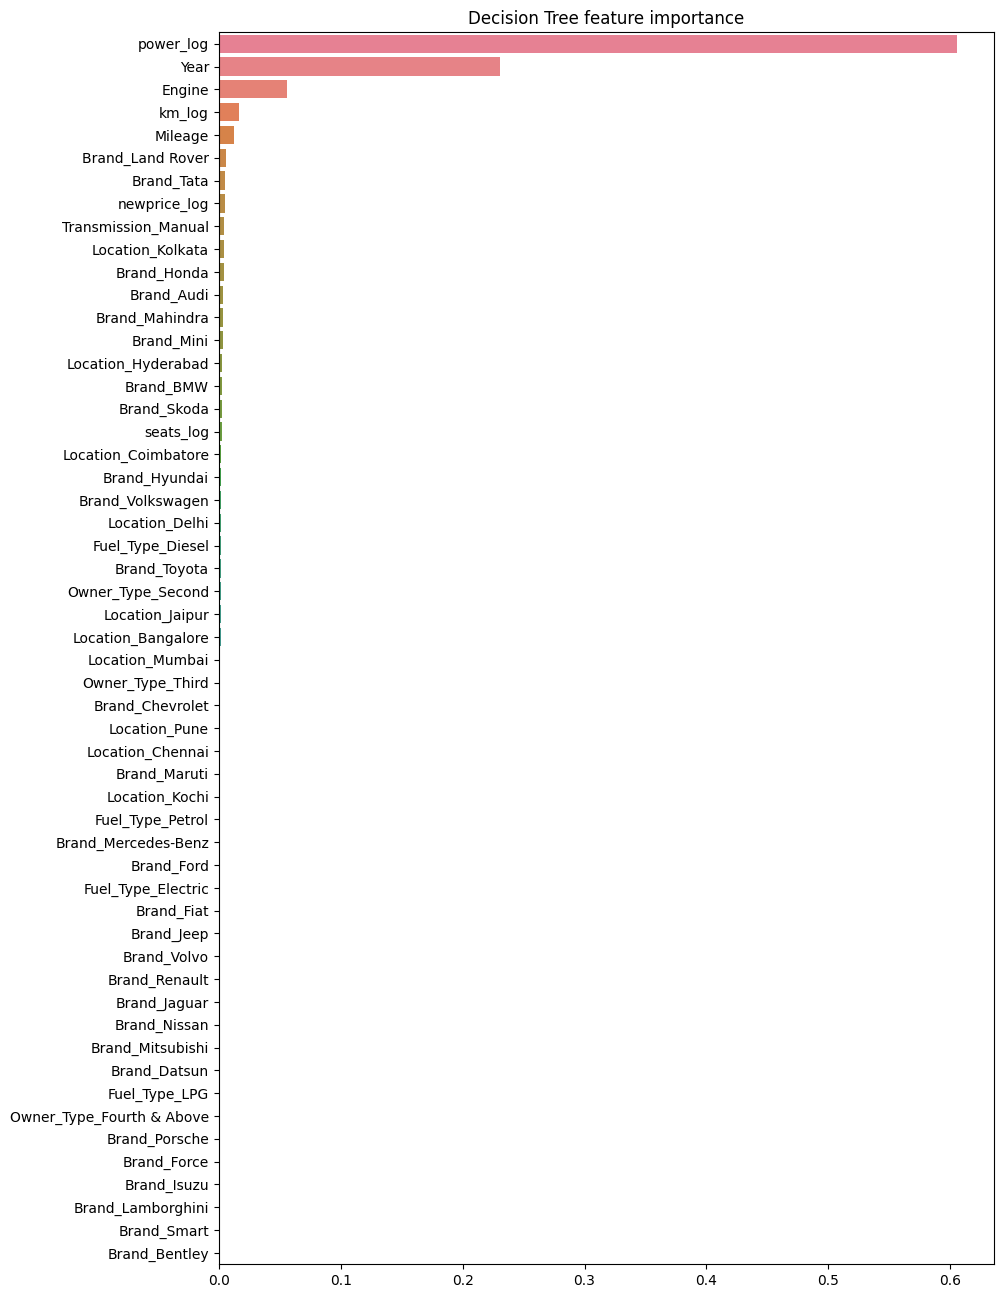

power_log      Year   Engine    km_log   Mileage  \
Importance   0.605544  0.230474  0.05603  0.016636  0.012824   

            Brand_Land Rover  Brand_Tata  newprice_log  Transmission_Manual  \
Importance          0.005818    0.005439      0.005219             0.004612   

            Location_Kolkata  ...  Brand_Mitsubishi  Brand_Datsun  \
Importance          0.004498  ...           0.00003      0.000022   

            Fuel_Type_LPG  Owner_Type_Fourth & Above  Brand_Porsche  \
Importance   2.890506e-07               5.267482e-08            0.0   

            Brand_Force  Brand_Isuzu  Brand_Lamborghini  Brand_Smart  \
Importance          0.0          0.0                0.0          0.0   

            Brand_Bentley  
Importance            0.0  

[1 rows x 54 columns]

In [129]:
# Look at feature importances pre-tuning to gather a better idea of what values to choose for our parameters
plt.figure(figsize=(10,16))
plt.title('Decision Tree feature importance')
sns.barplot(pd.DataFrame(data=dectreemod1.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).T,orient='h')
plt.show()
pd.DataFrame(data=dectreemod1.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).T

In [130]:
# Check the price column summary
y_train.describe().T

count      mean        std       min       25%       50%  \
price_log  4212.0  1.815175   0.871181 -0.820981  1.252763  1.713798   
Price      4212.0  9.386500  11.173850  0.440000  3.500000  5.550000   

                75%         max  
price_log  2.274956    4.787492  
Price      9.727500  120.000000

**Observations**
- We see that power_log is the most important feature by a large margin. The top three features have at least a 5% importance in our model. The categorical variables do not seem particularly important, even if we sum up each subfeature for each variable. We will try with depths of 3-10 and full
- There are 4212 records in the training dataset, so we can comfortably choose a wide variety of values for min_samples_leaf

In [131]:
# Model to be tuned
dectree_tuned=dectreemod1
# Define the parameters for Grid to choose from
parameters = {'max_depth' : np.arange(3,20),
              'min_samples_leaf' : np.arange(1,201,10),
              'max_features':[0.3,0.5,0.8,1],
              'min_samples_split':np.arange(2,30,7)
              }
# Grid Search
gscv = GridSearchCV(dectree_tuned, parameters, scoring = 'neg_root_mean_squared_error', cv = 10)
gscv = gscv.fit(X_train, y_train['price_log'])
# Set the model to the best combination of parameters
dectree_tuned=gscv.best_estimator_
# Fit the best algorithm to the data
dectree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=14, max_features=0.8, min_samples_split=23,
                      random_state=1)

In [132]:
# Check info and performance
tunper(gscv,dectree_tuned)

Optimised Negative RMSE:
-0.27918361131229347
----------------------------------------------------------------------------------------------------
Optimised regression parameters:
{'max_depth': 14, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 23}
----------------------------------------------------------------------------------------------------
Extra performance metrics:
{'r^2 train': 0.9212844725706231, 'r^2 test': 0.7712592233398539, 'RMSE train': 3.1345952639409846, 'RMSE test': 5.330294848614565, 'MAE train': 1.325063017566006, 'MAE test': 2.008326241613887, 'MAPE train': 0.14279587541696775, 'MAPE test': 0.20087974267214398}


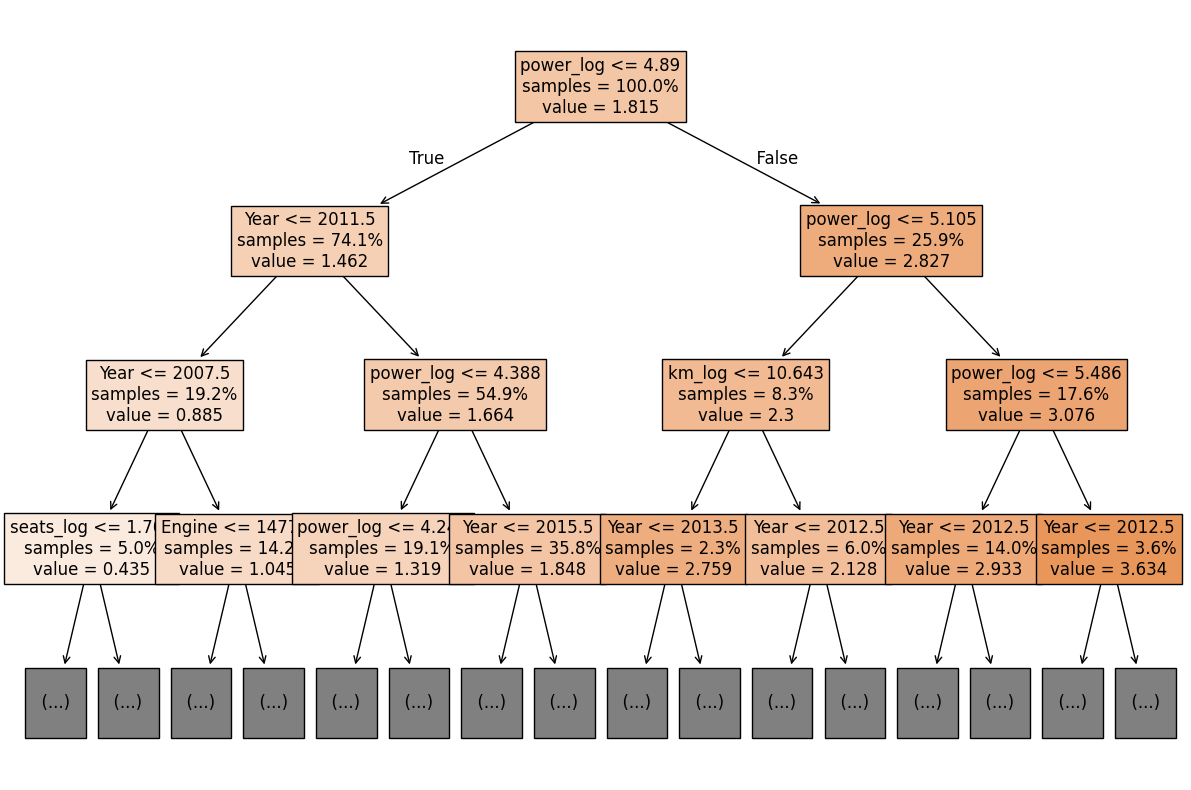

In [133]:
plt.figure(figsize = (15, 10))

tree.plot_tree(dectree_tuned, max_depth = 3, feature_names = list(X_train.columns), filled = True, fontsize = 12, node_ids = False,impurity=False,proportion=True)

plt.show()

**Observations**
Still have significant overfitting, but a shows a good RSME score

#### Random Forest

Like the Decision Trees, the random forest models are very overfit. We will use the Random Forest 1 model.

In [134]:
# Check parameters for RandomForestRegressor from sklearn website
['n_estimators=100', "criterion='squared_error'", 'max_depth=None', 'min_samples_split=2', 'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', 'max_features=1.0', 'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'bootstrap=True', 'oob_score=False', 'n_jobs=None', 'random_state=None', 'verbose=0', 'warm_start=False', 'ccp_alpha=0.0', 'max_samples=None']

['n_estimators=100',
 "criterion='squared_error'",
 'max_depth=None',
 'min_samples_split=2',
 'min_samples_leaf=1',
 'min_weight_fraction_leaf=0.0',
 'max_features=1.0',
 'max_leaf_nodes=None',
 'min_impurity_decrease=0.0',
 'bootstrap=True',
 'oob_score=False',
 'n_jobs=None',
 'random_state=None',
 'verbose=0',
 'warm_start=False',
 'ccp_alpha=0.0',
 'max_samples=None']

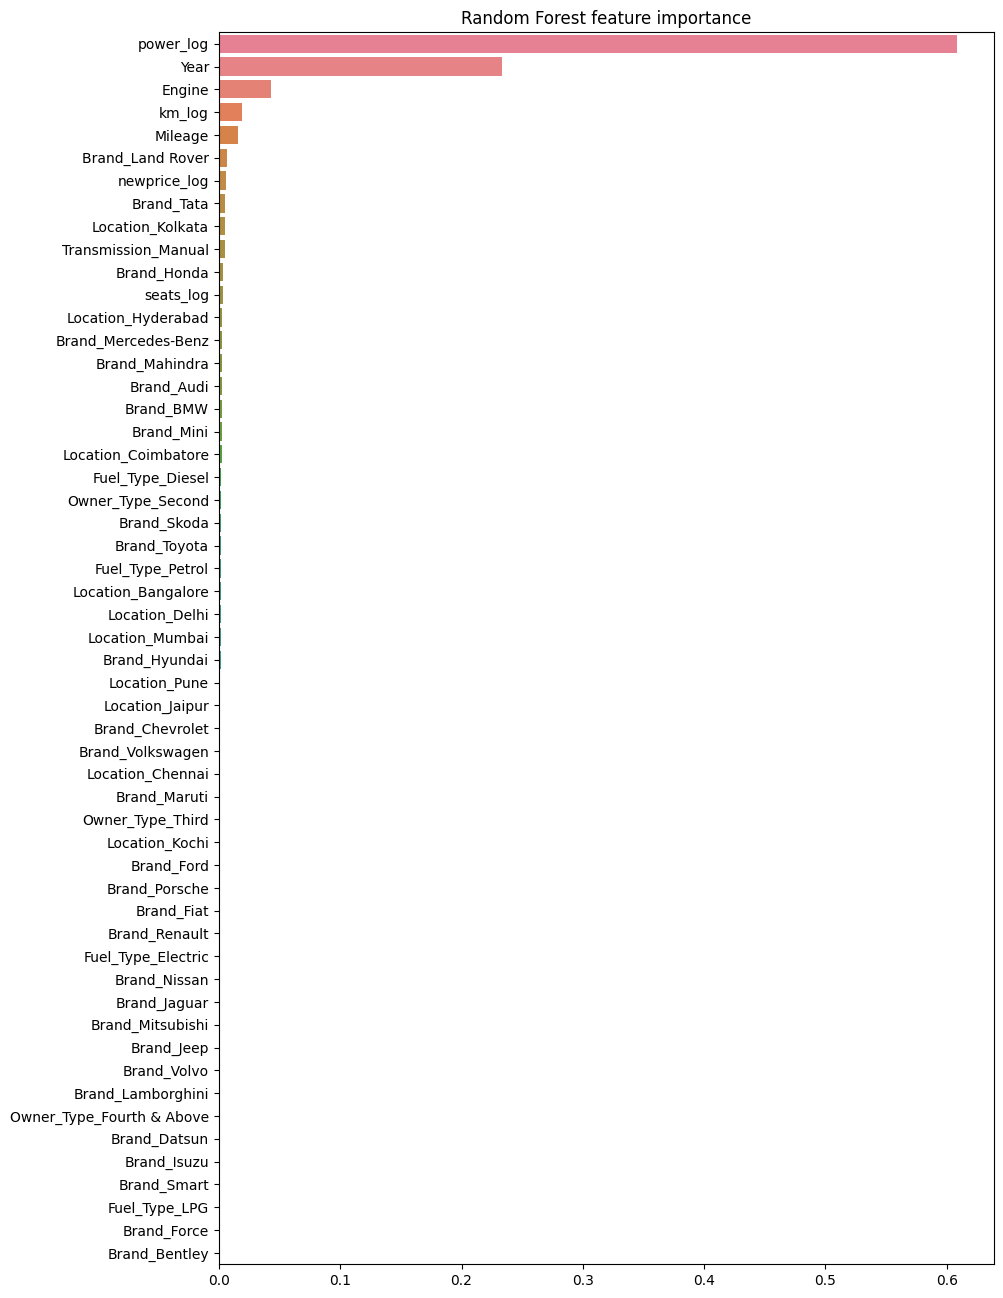

power_log      Year    Engine    km_log  Mileage  \
Importance   0.608342  0.233298  0.043345  0.018694  0.01602   

            Brand_Land Rover  newprice_log  Brand_Tata  Location_Kolkata  \
Importance          0.006795       0.00602    0.005297          0.005218   

            Transmission_Manual  ...  Brand_Jeep  Brand_Volvo  \
Importance             0.005159  ...    0.000112     0.000067   

            Brand_Lamborghini  Owner_Type_Fourth & Above  Brand_Datsun  \
Importance           0.000043                    0.00004       0.00002   

            Brand_Isuzu  Brand_Smart  Fuel_Type_LPG  Brand_Force  \
Importance     0.000015     0.000011        0.00001     0.000005   

            Brand_Bentley  
Importance       0.000002  

[1 rows x 54 columns]

In [135]:
# Check feature importance pre-tuning
plt.figure(figsize=(10,16))
plt.title('Random Forest feature importance')
sns.barplot(pd.DataFrame(data=ranformod1.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).T,orient='h')
plt.show()
pd.DataFrame(data=ranformod1.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).T

In [136]:
# Model to tune
ranfor_tuned = ranformod1

# Parameters
parameters = {"n_estimators": [100, 125, 150],
    "max_depth": np.arange(3,7,15),
    "min_samples_leaf": [1,15,30],
    "max_features": [0.7, 1.0],}

# Run the grid search
gscv2 = GridSearchCV(ranfor_tuned, parameters, scoring = 'neg_root_mean_squared_error', cv = 10)

gscv2 = gscv2.fit(X_train, y_train['price_log'])

# Set the classifier to the best combination of parameters
ranfor_tuned = gscv2.best_estimator_
# Fit best estimator
ranfor_tuned.fit(X_train,y_train['price_log'])

RandomForestRegressor(max_depth=3, max_features=0.7, min_samples_leaf=30,
                      n_estimators=150)

In [137]:
tunper(gscv2,ranfor_tuned)

Optimised Negative RMSE:
-0.39572208319293384
----------------------------------------------------------------------------------------------------
Optimised regression parameters:
{'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 30, 'n_estimators': 150}
----------------------------------------------------------------------------------------------------
Extra performance metrics:
{'r^2 train': 0.6726944643423941, 'r^2 test': 0.6751486641258999, 'RMSE train': 6.3918701455270766, 'RMSE test': 6.352164930713315, 'MAE train': 2.861976887599615, 'MAE test': 2.889714346727868, 'MAPE train': 0.316521586449825, 'MAPE test': 0.31115888954320264}


### **Feature Importance**

In [138]:
# Create function to store the feature importance values for the decision tree and random forest models
def featimp(model,X_train=X_train):
  impor=pd.DataFrame(data=model.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values(by='Importance',ascending=False).T
  return impor

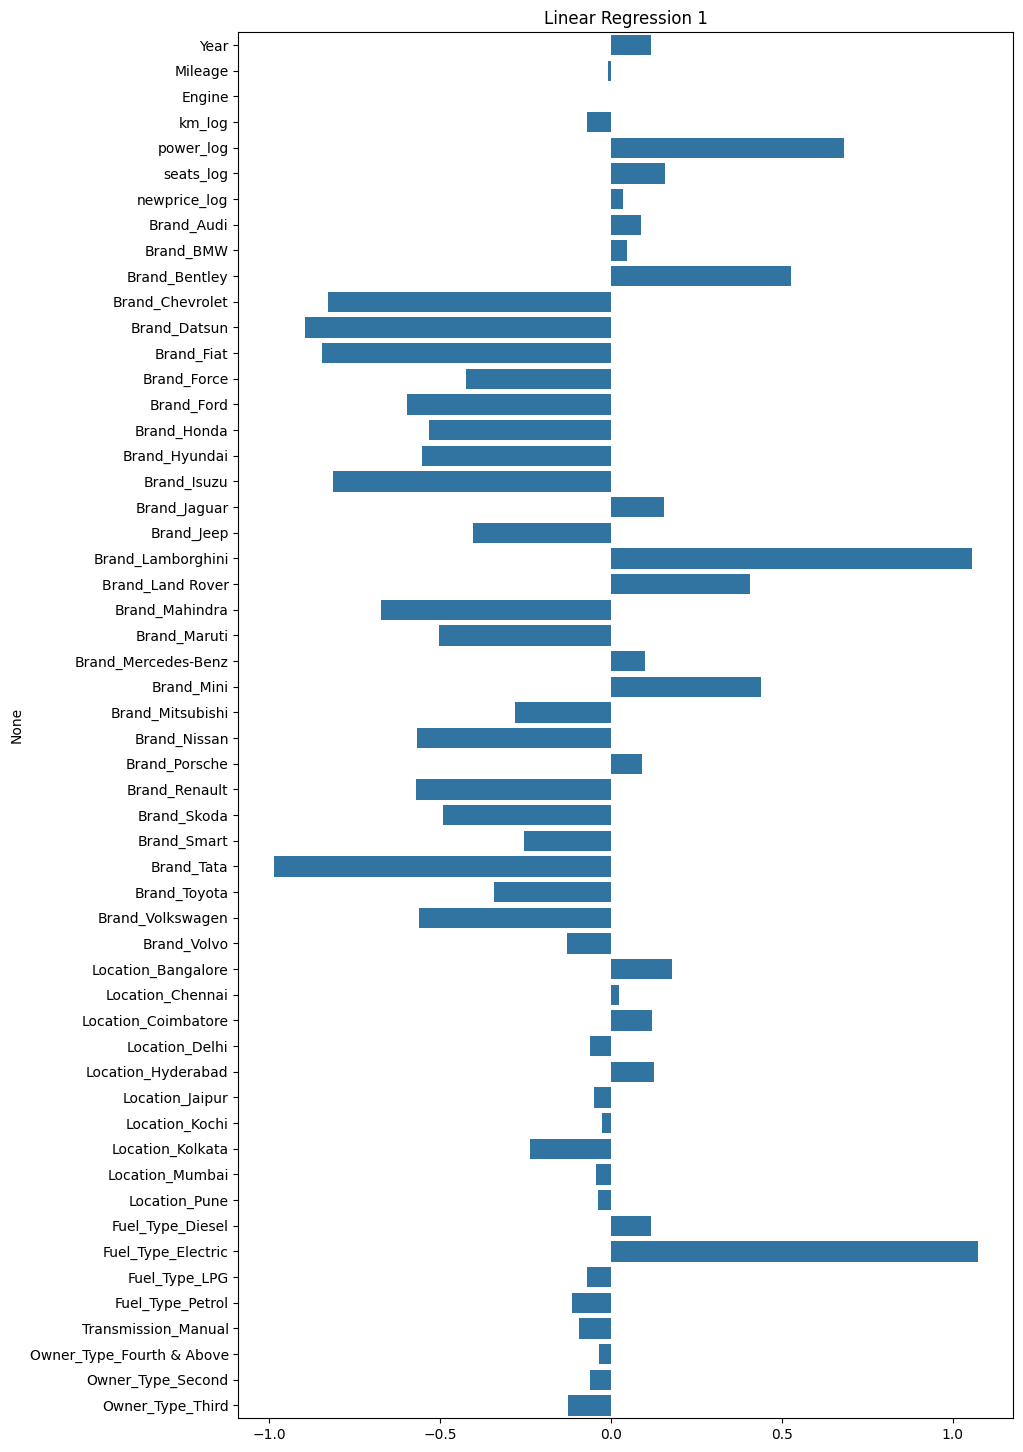

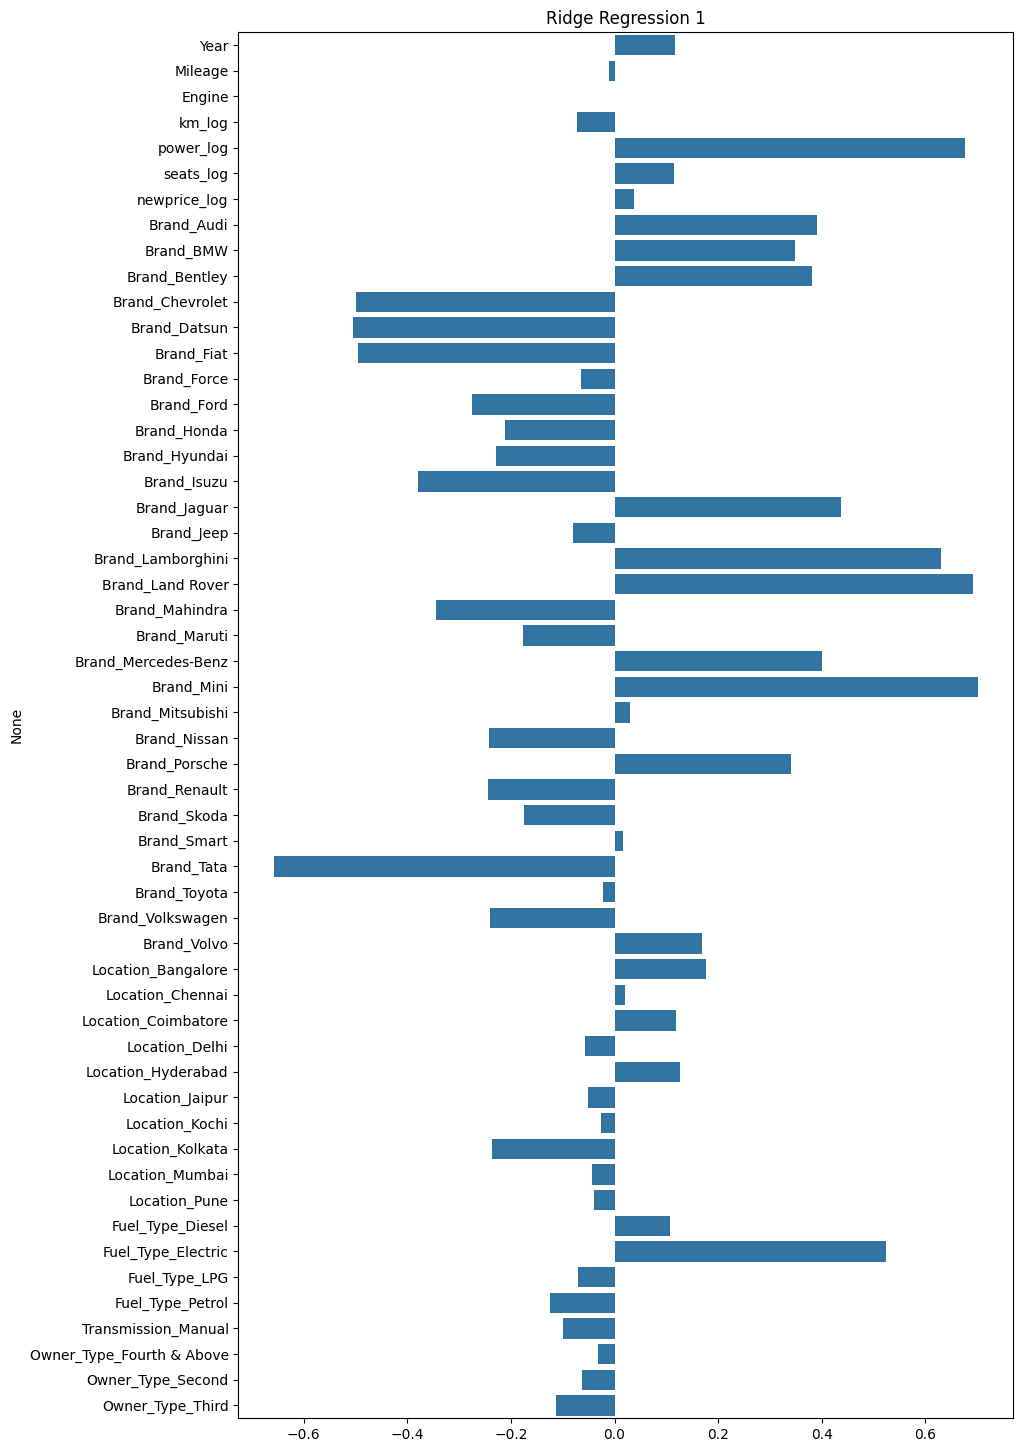

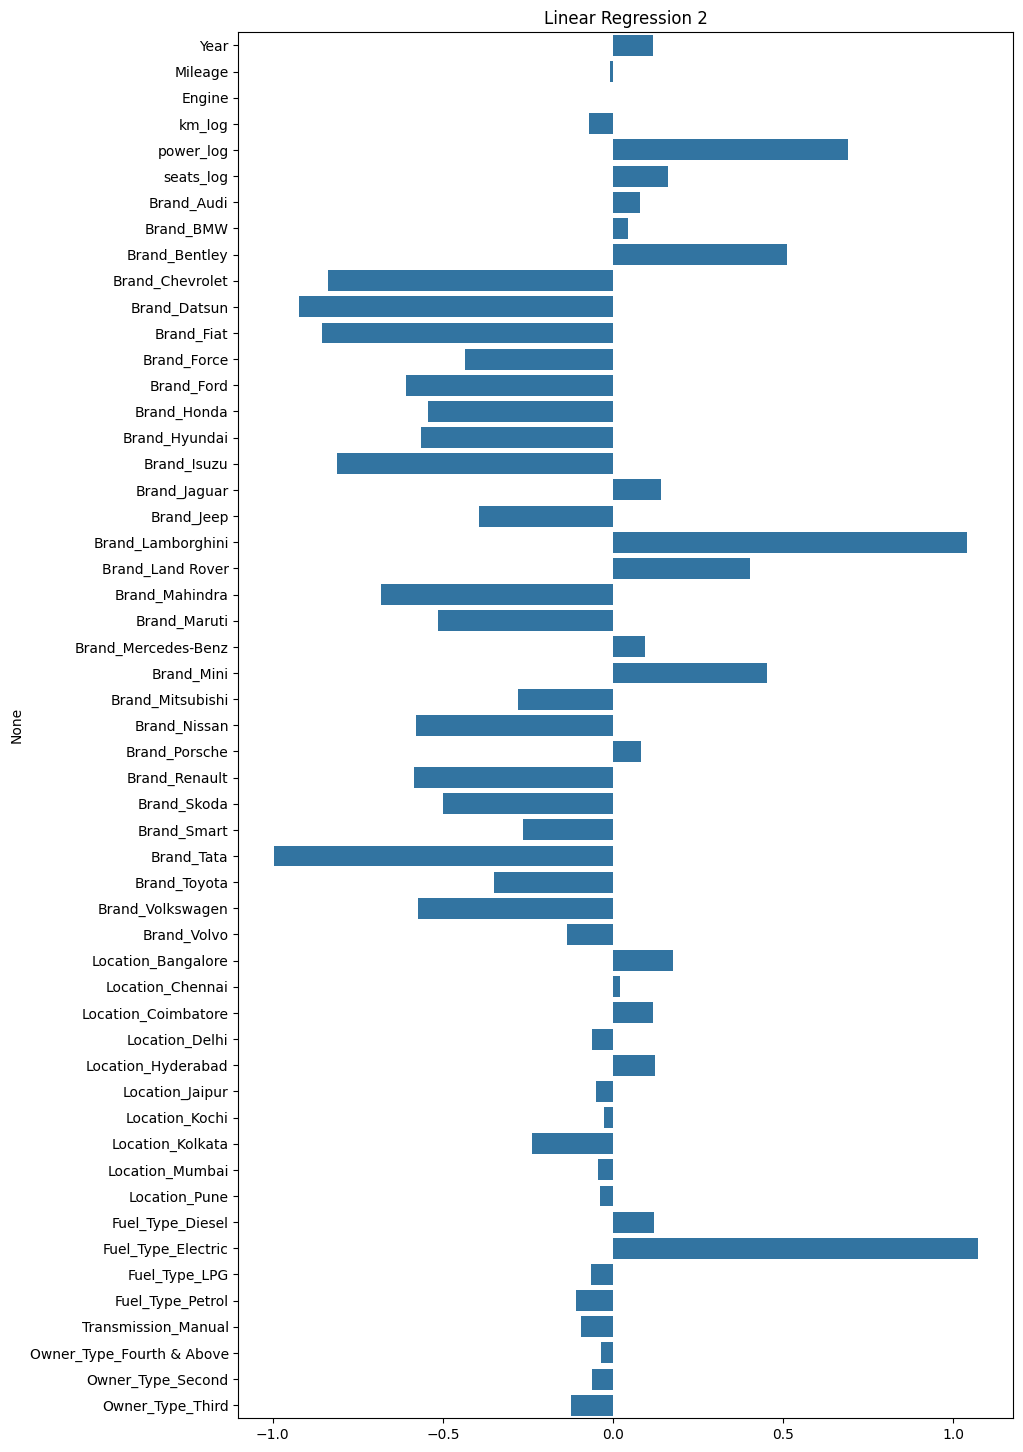

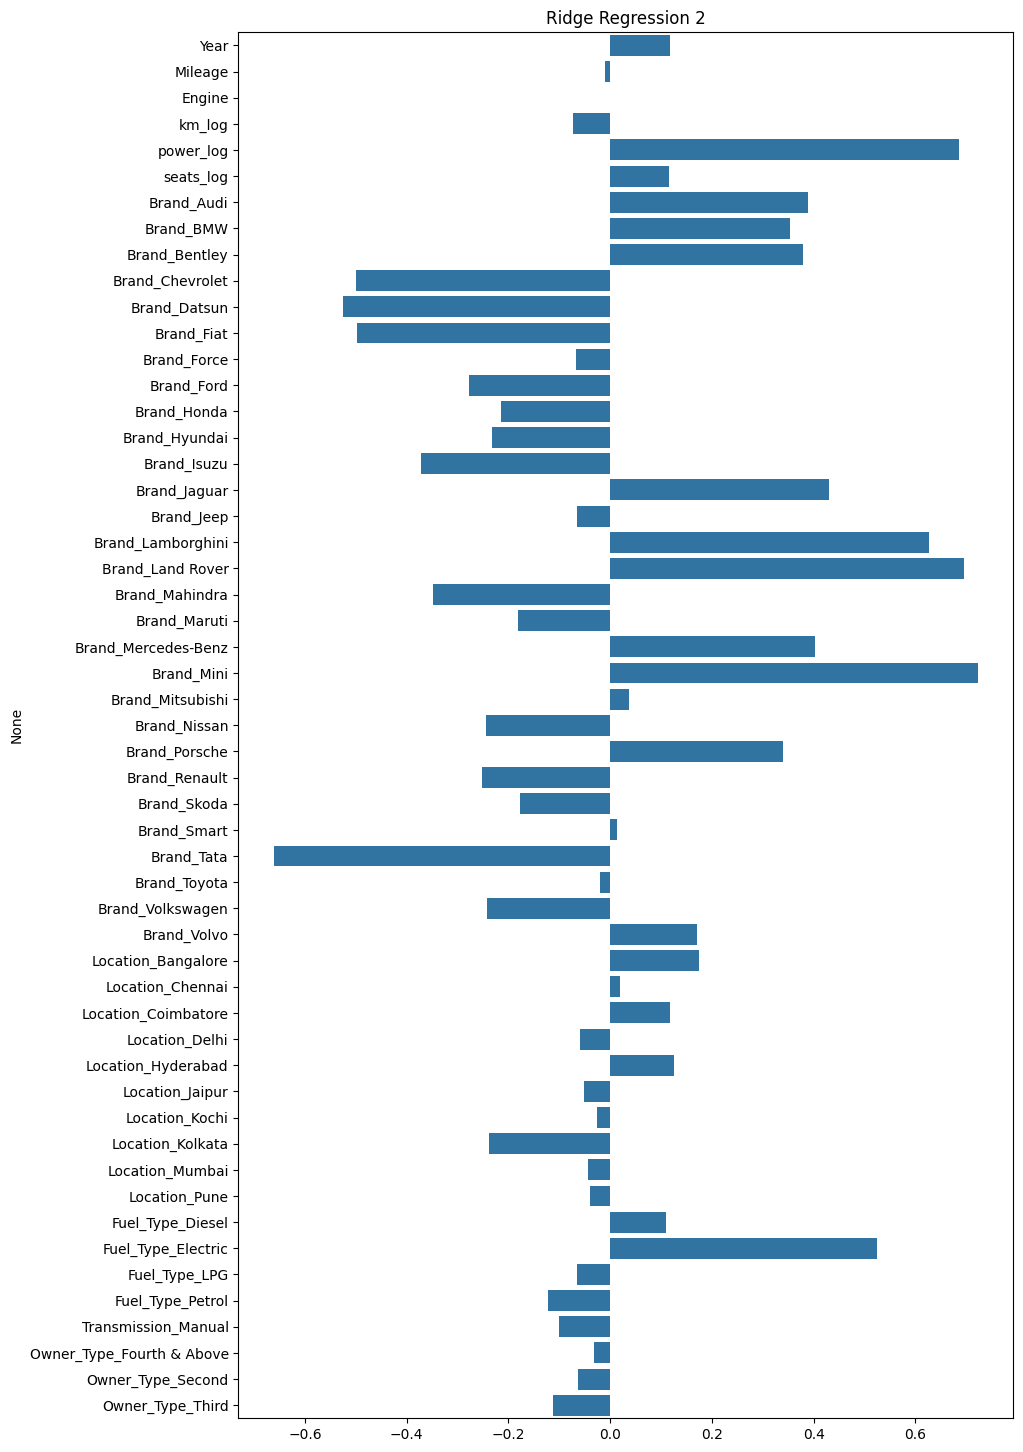

In [139]:
# Feature importances
for i,j in zip([lreg,ridgemod1],['Linear Regression 1','Ridge Regression 1']):
  plt.figure(figsize=(10,18))
  sns.barplot(x=i.coef_,y=X_train.columns,orient='h')
  plt.title(j)
  plt.show()
for i,j in zip([lreg2,ridgemod2],['Linear Regression 2','Ridge Regression 2']):
  plt.figure(figsize=(10,18))
  sns.barplot(x=i.coef_,y=X2_train.columns,orient='h')
  plt.title(j)
  plt.show()

**Observations**
- The Linear Regression and Ridge Regression model are very sensitive to outliers. This is why we see high dependences on the Electric fuel type, even though it only appears twice in our data. It may have been more prudent to remove electric cars from our data given there are so few of its entries
- Overall, we see that the 4 most significant numerical features are power_log, setas_log, year of manufacture, and kilometres driven

In [140]:
featimps=pd.DataFrame({})
for i in [dectreemod1,ranformod1,dectree_tuned,ranfor_tuned]:
  featimps=pd.concat([featimps,featimp(i)])
featimps.index=['Decision Tree 1','Random Forest 1','Decision Tree Tuned','Random Forest Tuned']
featimps

power_log      Year    Engine    km_log   Mileage  \
Decision Tree 1       0.605544  0.230474  0.056030  0.016636  0.012824   
Random Forest 1       0.608342  0.233298  0.043345  0.018694  0.016020   
Decision Tree Tuned   0.634363  0.224652  0.043179  0.020591  0.012091   
Random Forest Tuned   0.537951  0.203130  0.185809  0.007834  0.000978   

                     Brand_Land Rover  Brand_Tata  newprice_log  \
Decision Tree 1              0.005818    0.005439      0.005219   
Random Forest 1              0.006795    0.005297      0.006020   
Decision Tree Tuned          0.006071    0.004796      0.004593   
Random Forest Tuned          0.000000    0.000000      0.000254   

                     Transmission_Manual  Location_Kolkata  ...  \
Decision Tree 1                 0.004612          0.004498  ...   
Random Forest 1                 0.005159          0.005218  ...   
Decision Tree Tuned             0.003572          0.004009  ...   
Random Forest Tuned             0.055807          0.000000  ...   

                     Brand_Mitsubishi  Brand_Datsun  Fuel_Type_LPG  \
Decision Tree 1              0.000030      0.000022   2.890506e-07   
Random Forest 1              0.000143      0.000020   9.912609e-06   
Decision Tree Tuned          0.000169      0.000000   2.707615e-05   
Random Forest Tuned          0.000000      0.000000   0.000000e+00   

                     Owner_Type_Fourth & Above  Brand_Porsche  Brand_Force  \
Decision Tree 1                   5.267482e-08        0.00000     0.000000   
Random Forest 1                   3.989244e-05        0.00045     0.000005   
Decision Tree Tuned               0.000000e+00        0.00000     0.000000   
Random Forest Tuned               0.000000e+00        0.00000     0.000000   

                     Brand_Isuzu  Brand_Lamborghini  Brand_Smart  \
Decision Tree 1         0.000000           0.000000     0.000000   
Random Forest 1         0.000015           0.000043     0.000011   
Decision Tree Tuned     0.000000           0.000000     0.000000   
Random Forest Tuned     0.000000           0.000000     0.000000   

                     Brand_Bentley  
Decision Tree 1           0.000000  
Random Forest 1           0.000002  
Decision Tree Tuned       0.000000  
Random Forest Tuned       0.000000  

[4 rows x 54 columns]

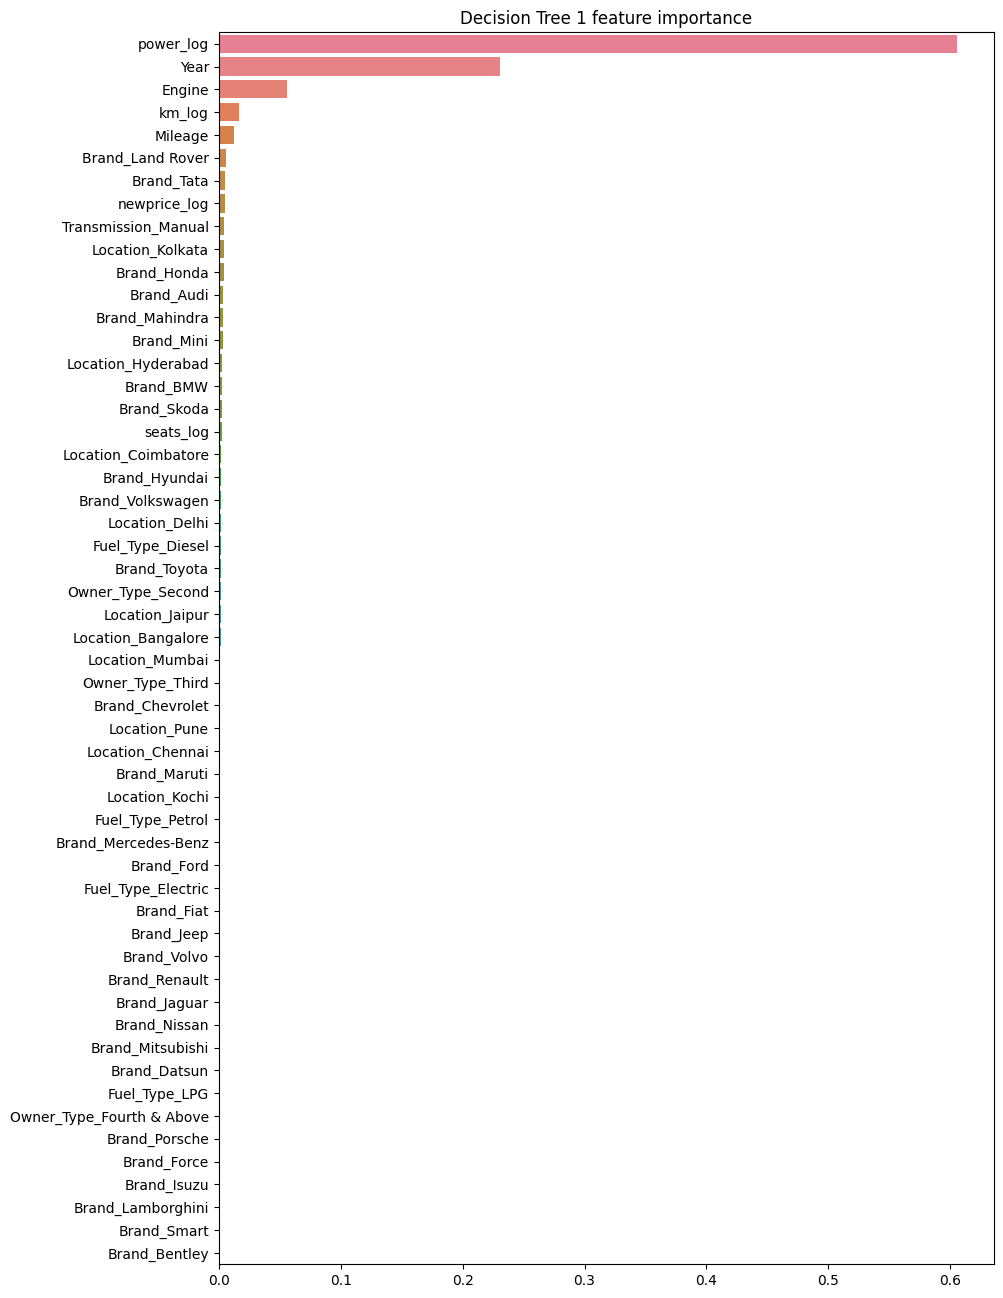

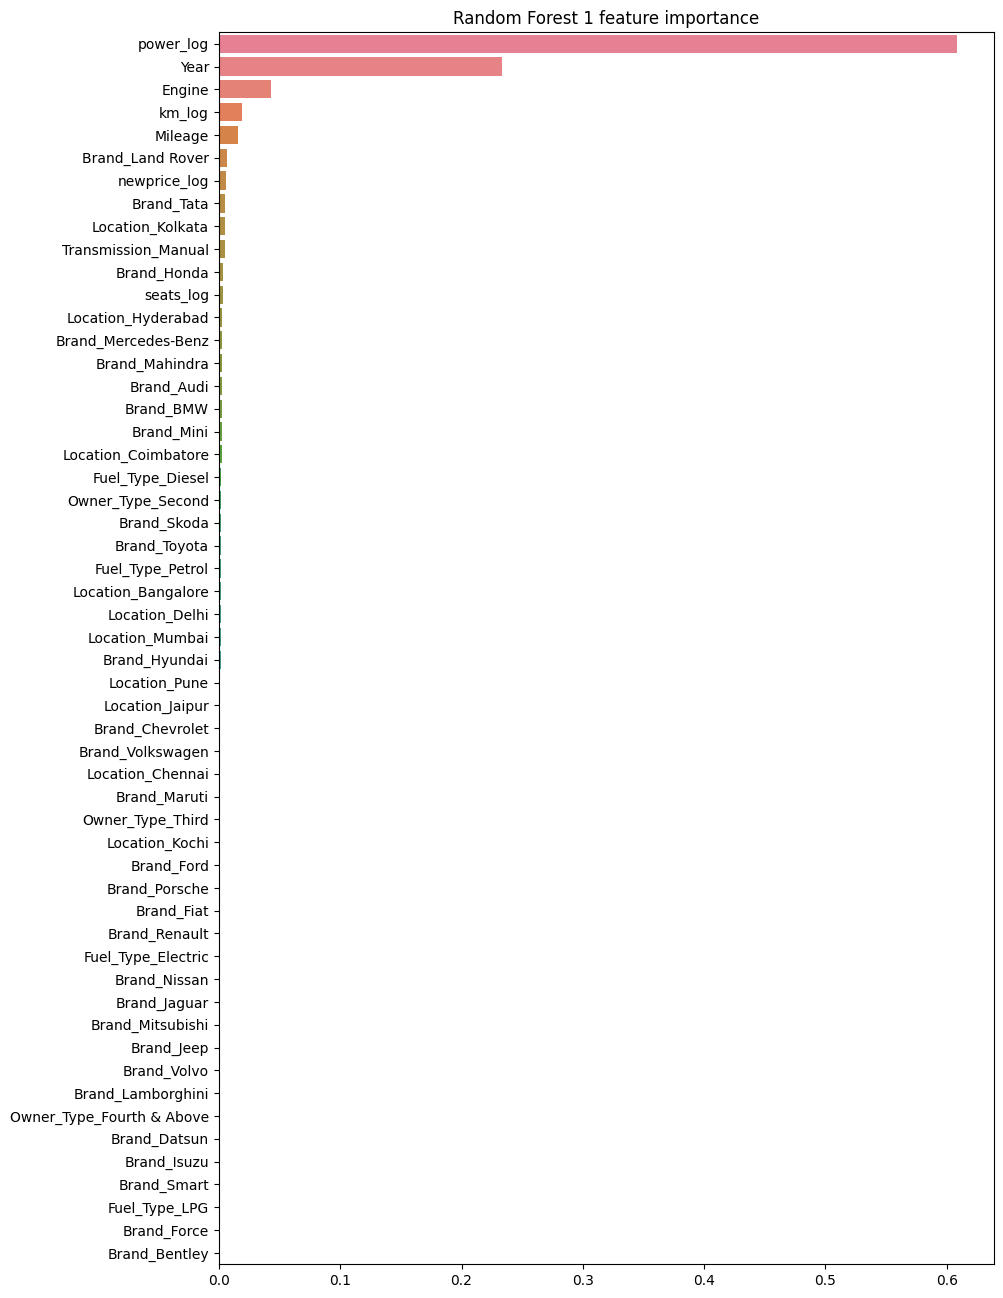

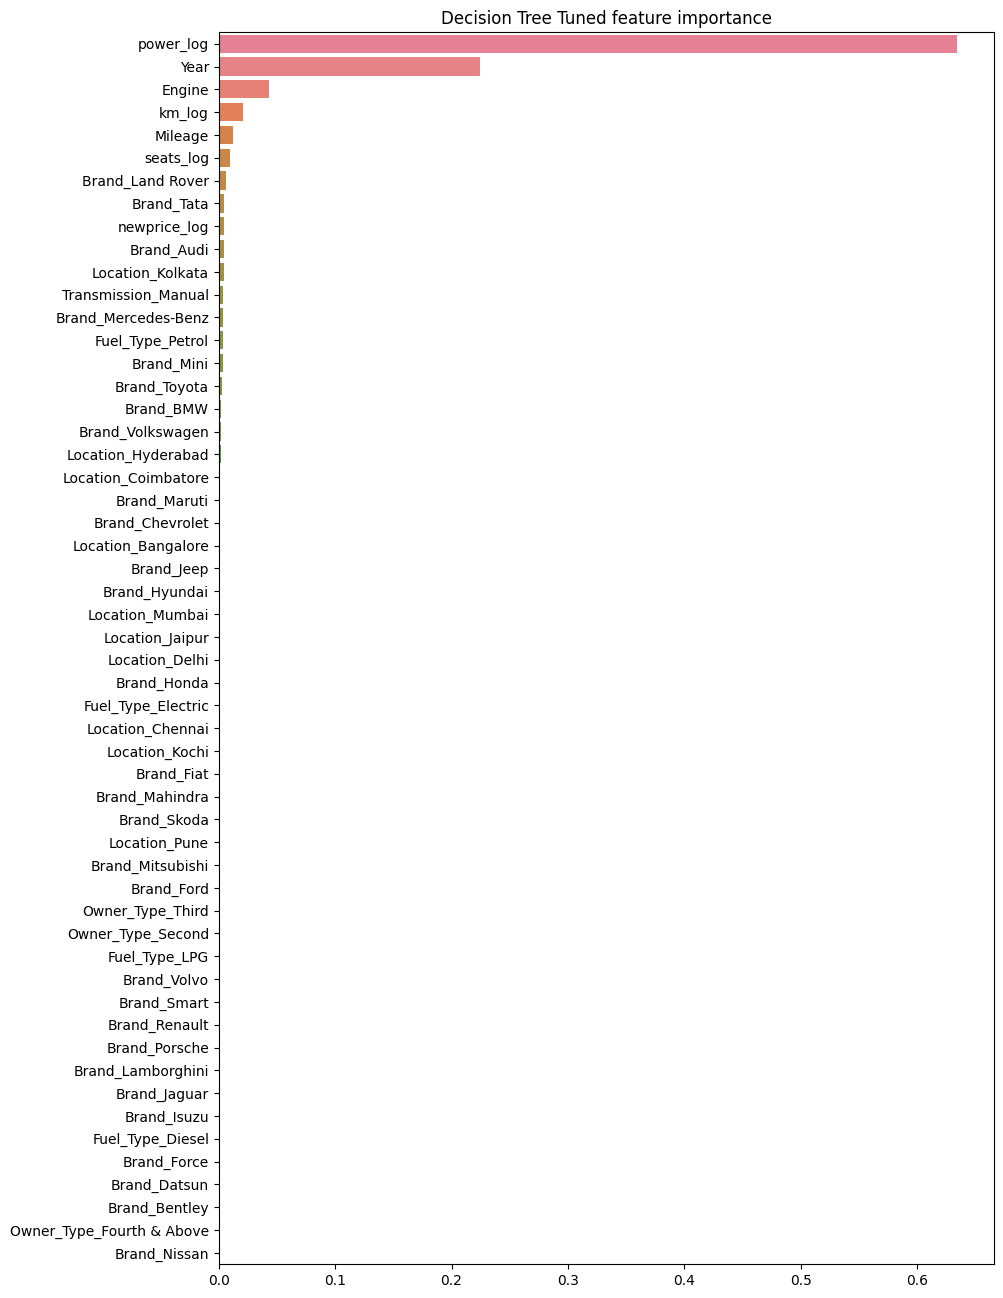

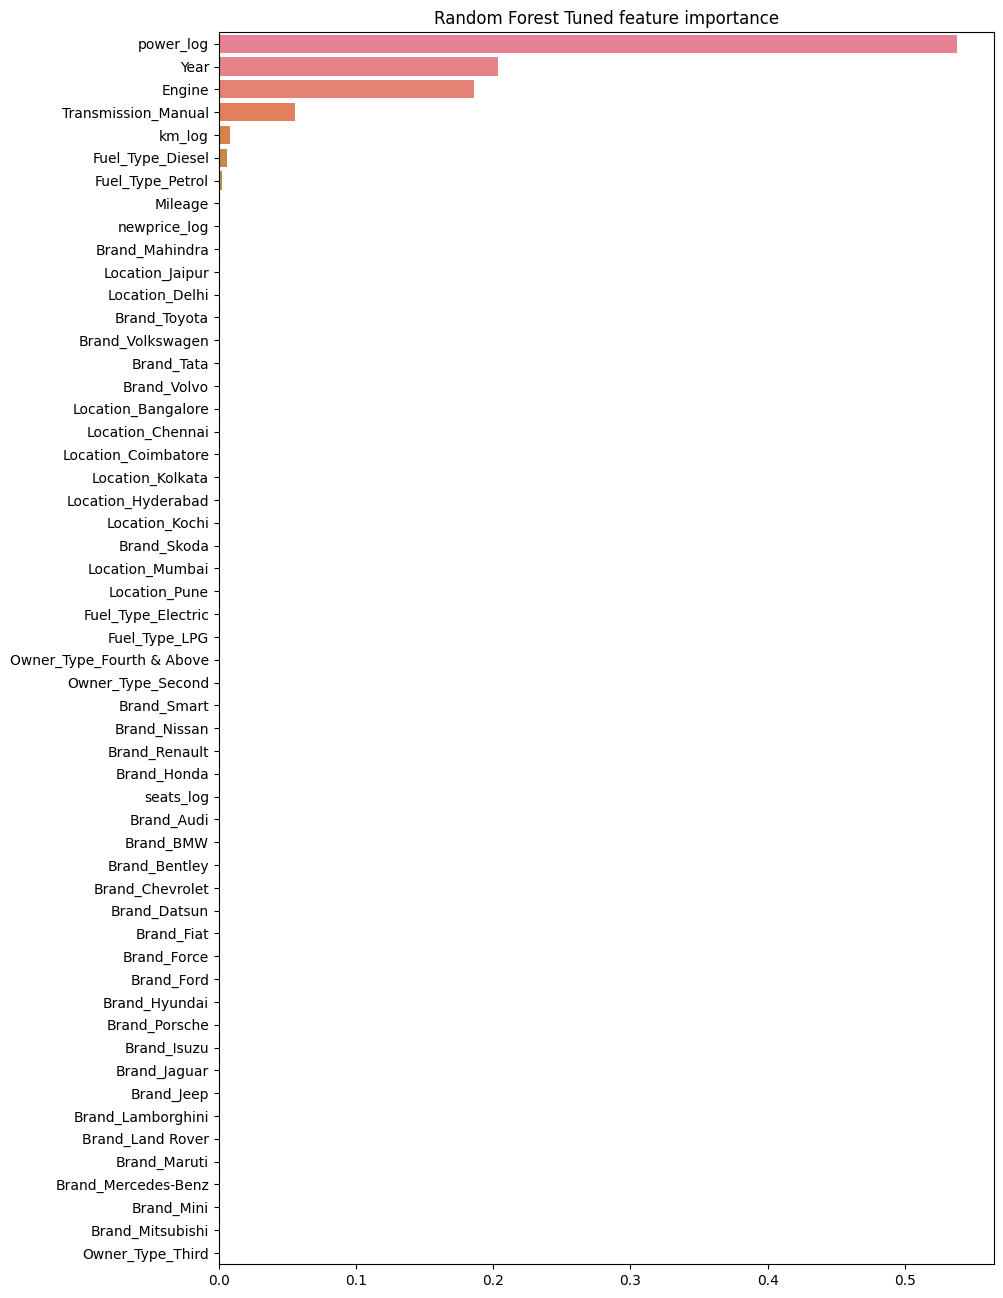

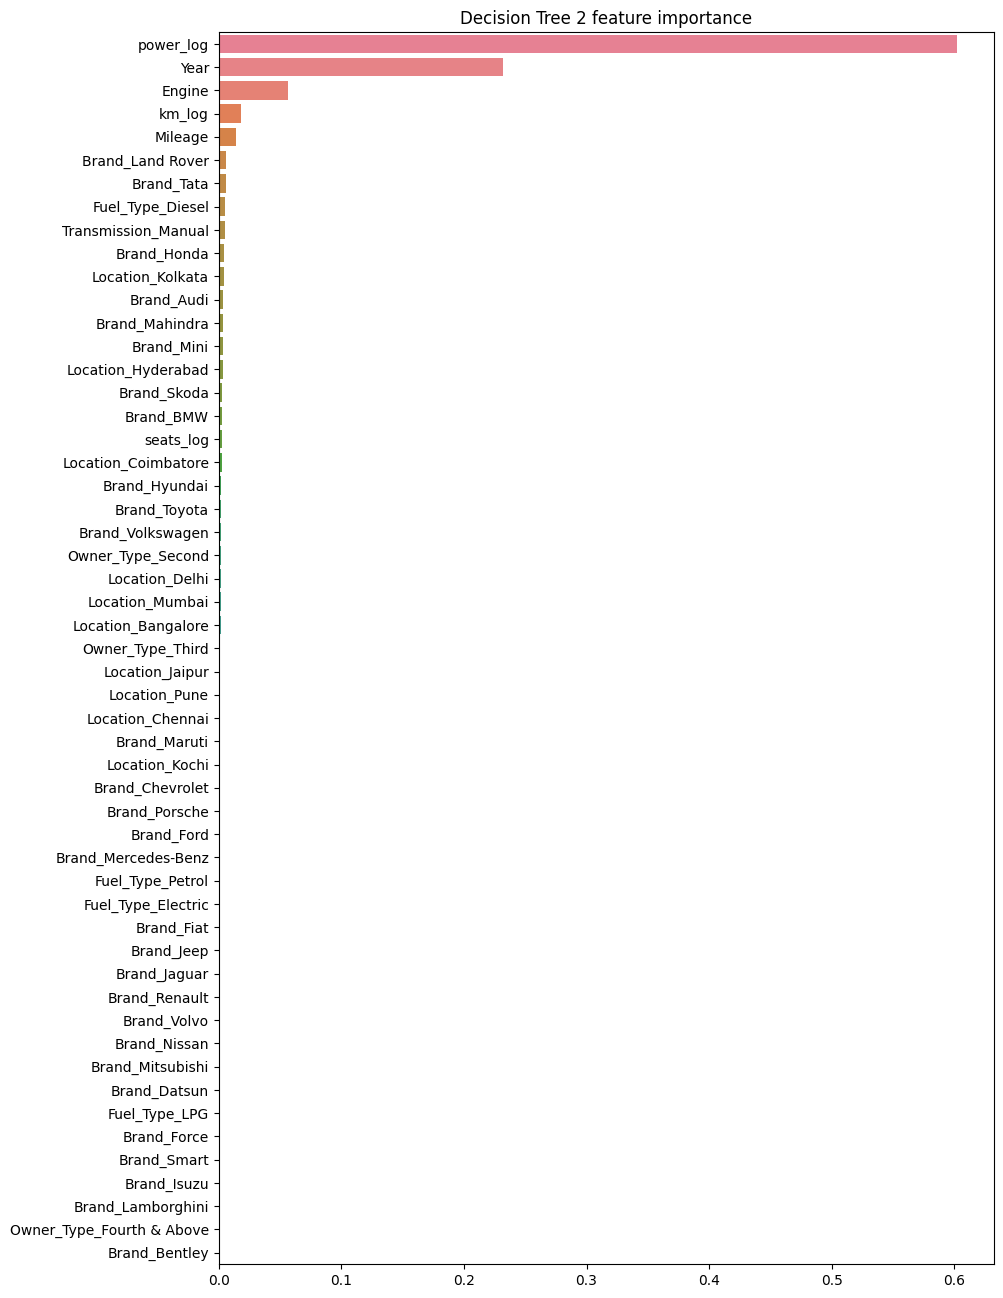

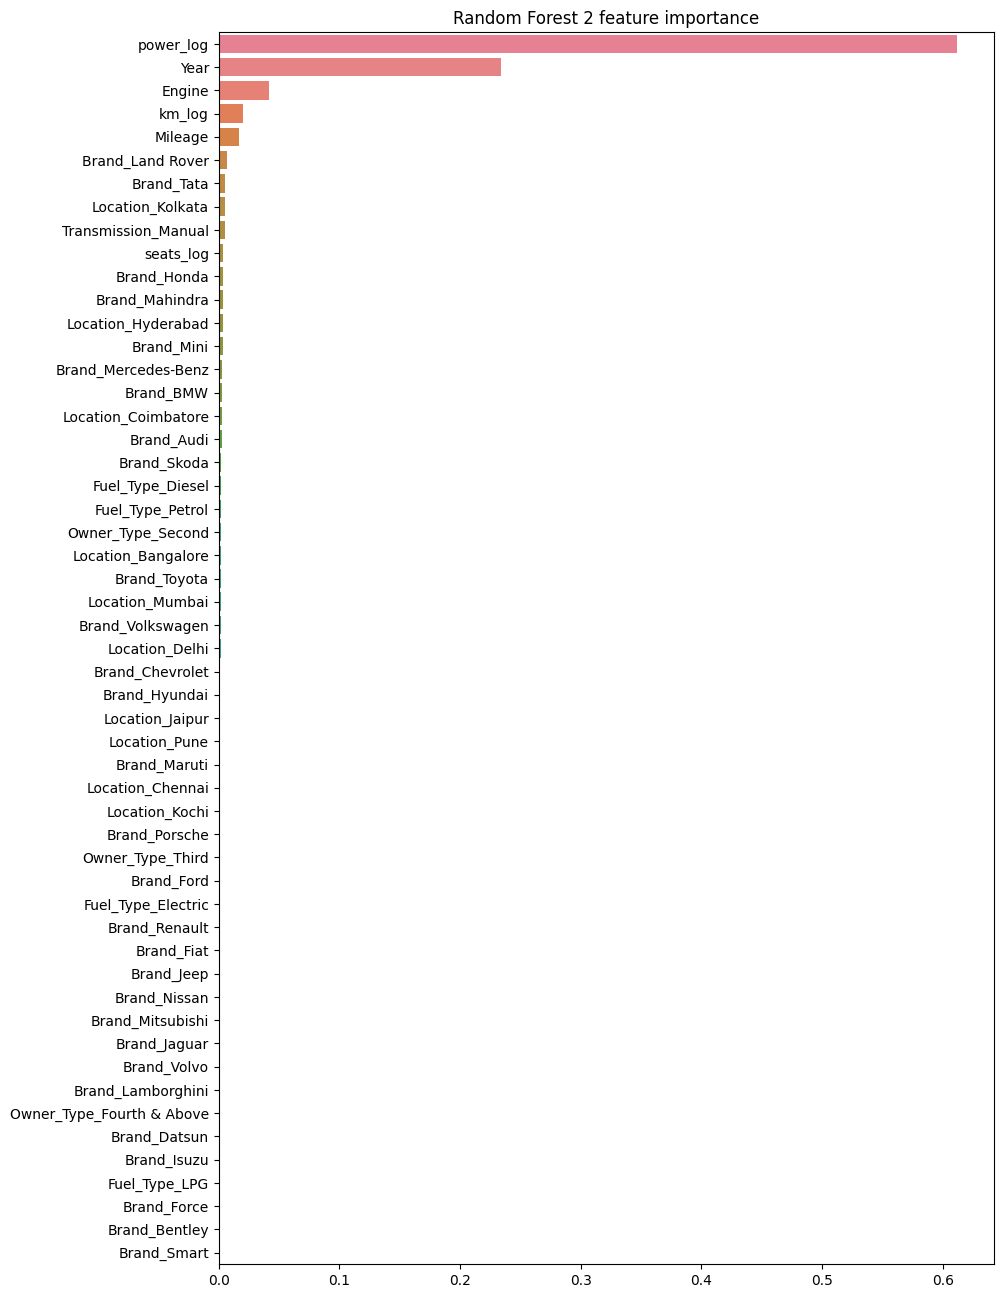

In [141]:
for i,j in zip([dectreemod1,ranformod1,dectree_tuned,ranfor_tuned],['Decision Tree 1','Random Forest 1','Decision Tree Tuned','Random Forest Tuned']):
  plt.figure(figsize=(10,16))
  plt.title(j+' feature importance')
  sns.barplot(featimp(i),orient='h')
  plt.show()
#
for i,j in zip([dectreemod2,ranformod2],['Decision Tree 2','Random Forest 2']):
  plt.figure(figsize=(10,16))
  plt.title(j+' feature importance')
  sns.barplot(featimp(i,X_train=X2_train),orient='h')
  plt.show()

**Observations**
- Similar to the other models, power_log, year, and engine are the most important features
- Interestingly, the hyperparameter tuned random forest has manual transmission as a relatively important feature too

## **Conclusions**

**1. Comparison of various techniques and their relative performance based on chosen Metric, Negative Root Mean Squaured Error:**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [142]:
# Look at performances of the models
pd.concat([perframe,pd.DataFrame([performance(dectree_tuned,ls=True),performance(ranfor_tuned,ls=True)],index=['Decision Tree Tuned','Random Forest Tuned'])])

r^2 train  r^2 test  RMSE train  RMSE test  MAE train  \
Linear 1              0.895901  0.891820    3.604739   3.665666   1.613169   
Linear 2              0.896389  0.885570    3.596278   3.770073   1.622493   
OLS                   0.867759  0.808904    4.062889   4.871973   1.780090   
Ridge 1               0.890311  0.891892    3.700268   3.664440   1.624186   
Ridge 2               0.890877  0.885053    3.690698   3.778570   1.633023   
Decision Tree 1       0.999997  0.812942    0.020693   4.820232   0.000947   
Decision Tree 2       0.999997  0.803870    0.020693   4.935733   0.000947   
Random Forest 1       0.976192  0.860702    1.723895   4.159600   0.581380   
Random Forest 2       0.974135  0.870000    1.796825   4.018376   0.584857   
Decision Tree Tuned   0.921284  0.771259    3.134595   5.330295   1.325063   
Random Forest Tuned   0.672694  0.675149    6.391870   6.352165   2.861977   

                     MAE test  MAPE train  MAPE test  
Linear 1             1.679332    0.180956   0.172032  
Linear 2             1.693354    0.180931   0.172628  
OLS                  2.314411    0.192296   0.241807  
Ridge 1              1.675601    0.180996   0.172531  
Ridge 2              1.689802    0.180964   0.173135  
Decision Tree 1      2.015710    0.000140   0.212654  
Decision Tree 2      2.029589    0.000140   0.214036  
Random Forest 1      1.513484    0.056752   0.147711  
Random Forest 2      1.537710    0.056712   0.149905  
Decision Tree Tuned  2.008326    0.142796   0.200880  
Random Forest Tuned  2.889714    0.316522   0.311159

In [143]:
# Performance based on chosen Matric (negative mean squared error)
print(tunper(gscv,dectree_tuned))
print('*'*100)
tunper(gscv2,ranfor_tuned)

Optimised Negative RMSE:
-0.27918361131229347
----------------------------------------------------------------------------------------------------
Optimised regression parameters:
{'max_depth': 14, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 23}
----------------------------------------------------------------------------------------------------
Extra performance metrics:
{'r^2 train': 0.9212844725706231, 'r^2 test': 0.7712592233398539, 'RMSE train': 3.1345952639409846, 'RMSE test': 5.330294848614565, 'MAE train': 1.325063017566006, 'MAE test': 2.008326241613887, 'MAPE train': 0.14279587541696775, 'MAPE test': 0.20087974267214398}
None
****************************************************************************************************
Optimised Negative RMSE:
-0.39572208319293384
----------------------------------------------------------------------------------------------------
Optimised regression parameters:
{'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf

**Observations**

In our analysis, we looked at a wide variety of regression techniques, and looked at two different forms of our dataset.
- Our first observation pertains to the two kinds of datasets we have analysed. In one we removed the New Price feature from our data due to too many missing values (denoted as version 2 of the model). In the other we left the feature in and imputed missing values with the median value for the existent newprice_log entries (denoted as version 1 of the model). We found that there is little difference between the two datasets, but the set where we filled in the missing values performed marginally better in the metrics we used. Our OLS model 2 failed to satisfy the linear regression assumptions, and we decided to tune the hyperparameters for Decition Tree 1 and Random Forest 1.
- Our best performing models on the training dataset were the Decision Trees, followed by the Random Forests. Both of these see much better performance on the training dataset than with the test set, revealing heavy overfitting.
- The linear regression models and Ordinary Least Square model all do not overfit the training data much, and have good performances. This is also seen with the Ridge Regression models. We cannot ascertain how trustworthy these results are however as usually these models are heavily affected by extreme values, and we only trained them on one training and testing datasets each.

**Tuned Models**
- Tuning the Decision Tree 1 model reduced its performance on the training set, but did so even more on the test set - worsening the overfitting according to our extra performance metrics. However, we see a pretty good performance based on the chosen metric of Negative Mean Squared Error.
- The random forest tuning significantly reduced its performance. However, it also significantly reduced its overfitting according to the R^2 values of the training and test set. We do see it perform worse than the tuned Decision Tree according to the chosen metric.

**2. Refined insights:**
- From the bivariate analysis, we see that the most important features that affect the sale price of a used car are the car's power, the engine displacement, and the price of the car when brand new.
- This is mostly agreed upon by the feature importance analytics of our decision tree and random forest models. These all agree that power_log is by far the most important feature, followed by the year of manufacture.
- It is good to note that a car's Power and Engine displacement are highly correlated, and mildly correlated to the Mileage.
- A few of our categorical data's subcategories (such as individual brands and fuel type) don't have enough instances to be considered relevant, and pose potential issues in our modelling. One example of this is Electric Cars, which only appear twice in our entire dataset. In our linear regression models, a significant importance is given to the Electric fuel type, despite this importance not being verifiable given the lack of data.
- In our bivariate analysis, we saw that most of the feature pairs we investigated have no significant unexpected trends (the year of manufacture and owner type trend is fully expected). The only exception to this comes in the boxplots which include power_log, Engine, and Mileage against car brands. Here we see clear trends with the top three car brands. These have lower power and engine stats than other brands, and higher mileage stats. This corresponds to each of the numerical features' correlations with resale price. We can then pose the question of from where these brands' popularity stem: the lower prices or the feature values?  It is hard to say whether increasing their resale prices would maintain or damage their sales.

**Model specific comments**
- The Linear Regression, OLS, and Ridge Regression models do not provide particularly useful feature importance statistics as they are heavily affected by extreme values and outliers. Hence, we see a disproportionate emphasis on feature subcategories with few instances in our data, such as the Electric fuel type and the brand Lamborghini.
- These models have an advantage when it comes to computational needs, as they are less demanding.
- Random Forests and Decision Trees, on the other hand, are more consistent and useful when it comes to feature importance, but they sacrifice efficiency for this.

**3. Proposal for the final solution design:**

The model we will want will depend on what we want to focus on:
- If we want to focus on **quick market estimates**, either of our Ridge Regression models are useful. They require little computational power and performed well on our test set. The tradeoff is that heavy importance is granted to outliers, so there is less certainty on how the model will perform on more unseen data
- If the focus is **minimising error while maintaining predictive power**, the tuned Decision Tree model is ideal. Although it displays overfitting, its results on our test dataset is still remarkable, and it provides good predictive analysis on where companies can invest in order to maximise profits
- Compared to the tuned decision tree, the tuned random forest displays much less overfitting. However, it proves to have a worse performance overall. Additionally, the best set of parameters for it stop at a tree depth of 3. As such, it may not be able to accurately sort and predict on larger datasets

**Overall**
- We recommend the use of the tuned Decision Tree model, and take the risk of overfitting, as its advantages over the other models are desirable.

**4. Improvements and suggestions**

**Model specific comments**
- It may be useful to look at the Decision Tree model and tune the hyperparameters in an attempt at reducing the overfitting more significantly, since it is the model's biggest limitation
- The best fit for our random forest was found to reduce its overfitting, but sacrified performance. It would be useful to increase the scope of the cross validation and include bootstrapping in our model building to train our models on more diverse datasets.
- Overall more testing with bootstrapping should be pursued to analyse the data better
- Since we compared models on two datasets, each with a different number of features, it may have been pertinent to also use the Adjusted R^2 metric to measure model performance.

**General comments on dataset**
- It may be useful to look at populations / pop. densitites for the various locations
  - Compare market share to population & density. Do bigger cities always sell more?
  - Would this affect our model?
- Could we look at the economic significance of the locations? Do locations with higher percentage of urbanisation have different trends in the pre-owned car market?
- There is a need for more complete datasets. Features with more than 50% missing values aren't very useful
- Since this is a fledgling market, the trends and important features may rapidly change. This risks that the current models become blind to important factors in prices, and fail to identify new confounding variables. Returning to the models and running frequent tests as the market evolves is highly recommended. Adding more features to the starting dataset as the market evolves is also valuable to pick up on possible growth in the market.


# **Bibliography**
1. Bank, World. “India’s Growth to Remain Resilient despite Global Challenges.” World Bank, The World Bank, 3 Oct. 2023, www.worldbank.org/en/news/press-release/2023/10/03/india-s-growth-to-remain-resilient-despite-global-challenges#:~:text=The%20IDU%2C%20the%20Bank’s%20flagship,average%20for%20emerging%20market%20economies.
2. “India Population (Live).” Worldometer, 16 July 2023, www.worldometers.info/world-population/india-population/